### Creating classes
Create classes and complete the blanks with proper implementation of 'grad' and 'value' functions

In [537]:
from collections import defaultdict
from math import sqrt
import numpy as np
from scipy.stats import norm
from tqdm import tqdm

In [538]:
class Derivative:
    """ Enabling the usage of +, *, -, etc. """
    def __add__(self, other):
        return Add(self, other)
    
    def __radd__(self, other):
        return rAdd(self, other)
    
    def __sub__(self, other):
        return Sub(self, other)

    def __rsub__(self, other):
        return rSub(self, other)
    
    def __mul__(self, other):
        return Mul(self, other)
    
    def __rmul__(self, other):
        return rMul(self, other)
    
    def __truediv__(self, other):
        return Div(self, other)

    def __rtruediv__(self, other):
        return rDiv(self, other)
   
    def Sin(self):
        return Sin(self)
    
    def __pow__(self, power):
        return Pow(self, power)
    
    def Exp(self):
        return Exp(self)
    
    def Cdf(self):
        return Cdf(self)
    
    def __ge__(self, other):
        return Ge(self, other)
    
    def __le__(self, other):
        return Le(self, other)
    
    def __hash__(self):                 # we need this for creating the dictionary with keys as Derivatives object
        return hash(str(self))

Leaf nodes

In [539]:
class Var(Derivative):
    """ A leaf node (a node which doesn't have any child) """
    
    def __init__(self, value):
        self.value = value      # the scalar value of the node

In [540]:
class Ge(Derivative):
    """ >= """
            
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a >= node_b.value
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value >= node_b
        else:      
            self.value = node_a.value >= node_b.value

In [541]:
class Le(Derivative):
    """ <= """

    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a <= node_b.value
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value <= node_b
        else:      
            self.value = node_a.value <= node_b.value

Adding the nodes

In [542]:
class Add(Derivative):
    """ The node that results from adding two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a + node_b.value
            self.grad = [(node_b, 1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value + node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value + node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, 1)]      # partial derivatives of nodes - value 1 for derivative in respect to node_a and 1 for node_b

In [543]:
class rAdd(Derivative):
    """ The node that results from adding two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a + node_b.value
            self.grad = [(node_b, 1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value + node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value + node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, 1)]      # partial derivatives of nodes - value 1 for derivative in respect to node_a and 1 for node_b

Substract the nodes

In [544]:
class Sub(Derivative):
    """ The node that results from subtracting two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a - node_b.value
            self.grad = [(node_b, -1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value - node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value - node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, -1)]     # partial derivatives of nodes - should have again the structure as [(node_a, value), (node_b, value)]

In [545]:
class rSub(Derivative):
    """ The node that results from subtracting two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a - node_b.value
            self.grad = [(node_b, -1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value - node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value - node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, -1)]     # partial derivatives of nodes - should have again the structure as [(node_a, value), (node_b, value)]

Multiplication of nodes

In [546]:
class Mul(Derivative):
    """ The node that results from multiplying two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float, np.ndarray)): 
            self.value = node_a * node_b.value
            self.grad = [(node_b, node_a)]
        elif isinstance(node_b, (int, float, np.ndarray)): 
            self.value = node_a.value * node_b
            self.grad = [(node_a, node_b)]
        else:      
            self.value = node_a.value * node_b.value
            self.grad = [(node_a, node_b.value), (node_b, node_a.value)]        # f = x*y   df / dx = y   df / dy = x

In [547]:
class rMul(Derivative):
    """ The node that results from multiplying two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float, np.ndarray)): 
            self.value = node_a * node_b.value
            self.grad = [(node_b, node_a)]
        elif isinstance(node_b, (int, float, np.ndarray)): 
            self.value = node_a.value * node_b
            self.grad = [(node_a, node_b)]
        else:      
            self.value = node_a.value * node_b.value
            self.grad = [(node_a, node_b.value), (node_b, node_a.value)]                                # f = x*y   df / dx = y   df / dy = x

Dividing nodes

In [548]:
class Div(Derivative):
    """ The node that results from dividing one node by another """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a / node_b.value
            self.grad = [(node_b, -node_a/(node_b.value**2))]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value / node_b
            self.grad = [(node_a, 1/node_b)]
        else:      
            self.value = node_a.value / node_b.value
            self.grad = [(node_a, 1/node_b.value), (node_b, -node_a.value/(node_b.value**2))]           # f = x/y   df / dx = 1/y    df / dy = -x / (y^2)

In [549]:
class rDiv(Derivative):
    """ The node that results from dividing one node by another """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a / node_b.value
            self.grad = [(node_b, -node_a/(node_b.value**2))]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value / node_b
            self.grad = [(node_a, 1/node_b)]
        else:      
            self.value = node_a.value / node_b.value
            self.grad = [(node_a, 1/node_b.value), (node_b, -node_a.value/(node_b.value**2))]           # f = x/y   df / dx = 1/y    df / dy = -x / (y^2)

Logarithm of one mode

In [550]:
class Log(Derivative):
    """ The node that results from sin(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.log(node) 
            self.grad = [(node, 0)]
        else:
            self.value = np.log(node.value)                          
            self.grad = [(node, 1/node.value)]                 

Sinus of one node

In [551]:
class Sin(Derivative):
    """ The node that results from sin(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.sin(node) 
            self.grad = [(node, 0)]
        else:
            self.value = np.sin(node.value)                          # use np.sin() function
            self.grad = [(node, np.cos(node.value))]                 # only one derivative, since it takes only one node - use np.cos() function

Cosinus of one node

In [552]:
class Cos(Derivative):
    """ The node that results from cos(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.cos(node)
            self.grad = [(node, 0)]
        else:
            self.value = np.cos(node.value)                          
            self.grad = [(node, -np.sin(node.value))]                

Powers

In [553]:
class Pow(Derivative):
    """ The node that results as node ^ power """
    
    def __init__(self, node, power):
        if isinstance(node, (int, float)): 
            self.value = node**power  
            self.grad = [(node, 0)]
        else:
            self.value = node.value**power                                         # reminder of power operation in python: **
            self.grad = [(node, power*node.value**(power-1))]                      # (one derivative)    f = x^n   df/dx = n * x ^ (n-1)

Exponential

In [554]:
class Exp(Derivative):
    """ The node that results from exp(node) """

    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.exp(node)  
            self.grad = [(node, 0)]
        else:
            self.value = np.exp(node.value)                         
            self.grad = [(node, np.exp(node.value))]   

In [555]:
class ExpK(Derivative):
    """ The node that results from exp(k*node) """
    
    def __init__(self, node, k):
        if isinstance(node, (int, float)): 
            self.value = np.exp(k * node)  
            self.grad = [(node, 0)]
        else:
            self.value = np.exp(k*node.value)                          
            self.grad = [(node, k*np.exp(k*node.value))]                

Squareroot

In [556]:
class Sqrt(Derivative):
    """ The node that results from sqrt(node) """
 
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.sqrt(node)
            self.grad = [(node, 0)]
        else:
            self.value = np.sqrt(node.value)                  
            self.grad = [(node, 1/(2*np.sqrt(node.value)))]  

$ a^x $

In [557]:
class Pot(Derivative):
    """ The node that results from a ^ node """   
    def __init__(self, a, node):
        self.value = a**node.value                          
        self.grad = [(node, a**node.value * np.log(a))]                

Cdf

In [558]:
class Cdf(Derivative):
    """ The node that results from cdf(node) """

    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = norm.cdf(node) 
            self.grad = [(node, 0)]
        else:
            self.value = norm.cdf(node.value)            
            self.grad = [(node, norm.pdf(node.value))]

### Create a function for getting the gradients values
The algorithm will return a dictionary 'gradients' which will have the nodes as keys and partial derivatives in respect to that nodes as values
so the structure will be e.g.:

gradients = {x1: 1, w1: 14}

We will go through the variable 'stack'. Stack will be a list of tuples (node, deriative).

Let's assume we have such a graph:

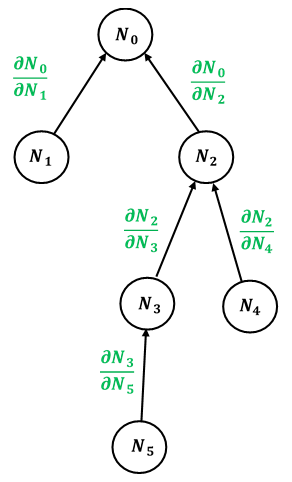

1. First, stack will be assigned with child nodes of the parent node

        stack = N0.grad

        stack = [ (N1,  dN0 / dN1),  (N2,  dN0 / dN2) ]
        

2. We will take the last element from the stack 

        stack = [ (N1,  dN0 / dN1) ]
        
        
    and save it in variables 'node' and 'node_derivative'

        node = N2

        node_derivative = dN0 / dN2
        
    
    then add the node_derivative to the gradients[node]

        gradients[node] = gradients[node] + node_derivative
        
        gradients[N2] = dN0 / dN2
        

3. If 'node' has children nodes, iterate through them AND append them onto a stack with their derivative multiplied by 'node_derivative'

    * child_node = N3,    child_node_derivative = dN2 / dN3

            stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2) ]
            
            
    * child_node = N4,    child_node_derivative = dN2 / dN4

            stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2), (N4, dN2 / dN4 * dN0 / dN2) ]
            
            
4. Take again last element from the stack and save in 'node' and 'node_derivative' and add 'node_derivative' to gradients[node]

        stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2) ]

        node = N4

        node_derivative = dN2 / dN4 * dN0 / dN2

        gradients[N4] = dN2 / dN4 * dN0 / dN2
            

5. N4 has no children, so do nothing

6. Take again last element from the stack - repeat step 4 (fill in the blanks - you'll get better understanding):

        stack = [ (N1,  dN0 / dN1) ]

        node = N3

        node_derivative = dN2 / dN3 * dN0 / dN2

        gradients[N3] = dN2 / dN3 * dN0 / dN2
            

7. Iterate through children of node N3 - repeat step 3:

        * child_node = N5,    child_node_derivative = dN3 / dN5

            stack = [ (N1,  dN0 / dN1), (N5, dN3 / dN5 * dN2 / dN3 * dN0 / dN2) ]
            

8. What will be the next step?

        stack = [ (N1,  dN0 / dN1) ]

        node = N5

        node_derivative = dN3 / dN5 * dN2 / dN3 * dN0 / dN2

        gradients[N5] = dN3 / dN5 * dN2 / dN3 * dN0 / dN2
        
        
9. Does N5 have children? 

        * No

10. What is the next step?

        stack = []

        node = N1

        node_derivative = dN0 / dN1

        gradients[N1] = dN0 / dN1
        
        
11. What is the next step? When do we end?

In [362]:
def Get_Gradient(parent_node):
    """ Go down the graph, and compute derivative of `parent_node` with respect to each node """
    
    # we will create a dictionary 'gradient' which will have the nodes as keys and its derivatives as values
    gradients = defaultdict(lambda: 0)    # initialize the dictionary so when calling a non-existing key the value of 0 is assigned
    
    # stack will represent the list of tuples (node, node_derivative) 
    stack = parent_node.grad.copy()     
    
    while stack:                             # loop for each different branch
        # get node and node_derivative from the top of the stack - function pop()
        temp = stack.pop()                   
        node = temp[0]
        node_derivative = temp[1]            
        # add to the value of derivative of the node (gradients[node]) value node_derivative
        gradients[node] = gradients[node] + node_derivative  
        
        if not isinstance(node, Var):        # if the node has children, put them onto the stack
            # loop for each node in one branch
            for child_node, child_node_derivative in node.grad:                   
                # append child_node and child_node_derivative * node_derivative to the stack
                stack.append((child_node, child_node_derivative * node_derivative))
                
    return dict(gradients)

In [363]:
# ## Printtest

# def Get_Gradient_Print(parent_node):
#     """ Go down the graph, and compute derivative of `parent_node` with respect to each node """
    
#     # we will create a dictionary 'gradient' which will have the nodes as keys and its derivatives as values
#     gradients = defaultdict(lambda: 0)    # initialize the dictionary so when calling a non-existing key the value of 0 is assigned
    
#     # stack will represent the list of tuples (node, node_derivative) 
#     stack = parent_node.grad.copy()     
#     print("Parent: ", parent_node,", Grad: ", parent_node.grad)
    
#     while stack:                             # loop for each different branch
#         # get node and node_derivative from the top of the stack - function pop()
#         temp = stack.pop()                   
#         node = temp[0]
#         node_derivative = temp[1]  
#         print("Type: ", node,", Grad: ", node_derivative)
#         # add to the value of derivative of the node (gradients[node]) value node_derivative
#         gradients[node] = gradients[node] + node_derivative  
        
#         if not isinstance(node, Var):        # if the node has children, put them onto the stack
#             # loop for each node in one branch
#             for child_node, child_node_derivative in node.grad:                   
#                 # append child_node and child_node_derivative * node_derivative to the stack
#                 stack.append((child_node, child_node_derivative * node_derivative))
#                 print("Child-type: ", child_node,", Grad: ", child_node_derivative)
                
#     return dict(gradients)

### Test the function
#### 1. Example

$$ f(x_1, x_2, x_3) = \sin(x_2 + {x_1}^2) \frac{x_3 - x_1}{x_2} $$

$$ \frac{\partial f}{\partial x_1} = \sin(x_2 + {x_1}^2) (- \frac{1}{x_2}) + \frac{x_3-x_1}{x_2} \cos(x_2 + {x_1}^2) 2x_1 $$

In [364]:
def f(x1, x2, x3):
    if type(x1) == int:                                           # check if type of arguments (any argument) is int - then return the equation with np.sin, otherwise Sin
        return np.sin(x2 + x1**2) * ((x3 - x1) / x2)
    return Sin(x2 + x1**2) * ((x3 - x1) / x2)

def part_f_x1(x1, x2, x3):
    return np.sin(x2 + x1**2) * (-1 / x2) + ((x3 - x1)/x2 * np.cos(x2 + x1**2) * 2 * x1)

def part_f_x2(x1, x2, x3):
    return (1/x2)*(x3-x1)*np.cos(x2+x1**2)-(1/x2**2)*(x3-x1)*np.sin(x2+x1**2)

def part_f_x3(x1, x2, x3):
    return (1/x2)*np.sin(x2+x1**2)

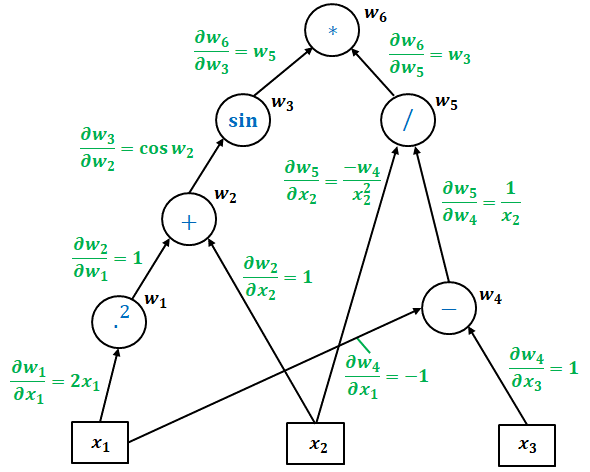

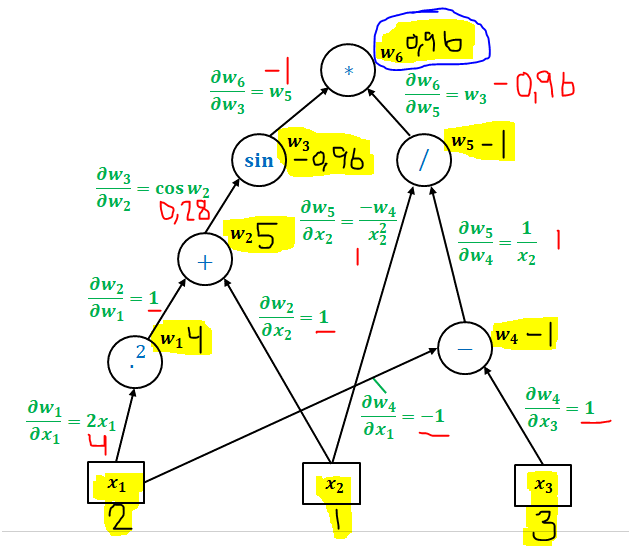

In [365]:
# assign the values
x1_val = 2
x2_val = 1
x3_val = 3

In [366]:
x1 = Var(x1_val)
x2 = Var(x2_val)
x3 = Var(x3_val)

y = f(x1, x2, x3)
gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to x1 =', gradients[x1])
print('The partial derivative of y with respect to x2 =', gradients[x2])
print('The partial derivative of y with respect to x3 =', gradients[x3])

Value of f equals -0.9589242746631385
The partial derivative of y with respect to x1 = 2.0935730165160438
The partial derivative of y with respect to x2 = 1.2425864601263648
The partial derivative of y with respect to x3 = -0.9589242746631385


In [367]:
print('[Manual way] Value of f equals', f(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x1 equals', part_f_x1(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x2 equals', part_f_x2(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x3 equals', part_f_x3(x1_val, x2_val, x3_val))

[Manual way] Value of f equals -0.9589242746631385
[Manual way] Value of partial derivative of f with respect to x1 equals 2.0935730165160438
[Manual way] Value of partial derivative of f with respect to x2 equals 1.2425864601263648
[Manual way] Value of partial derivative of f with respect to x3 equals -0.9589242746631385


## Test: Black-Scholes

In [368]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
from scipy.stats import norm
import scipy

In [436]:
def euro_call(S0, K, T, r, sigma):
    d1 = (Log(S0/K)+(r+1/2*(sigma**2))*T)/(sigma*Sqrt(T))
    d2 = d1 - sigma*Sqrt(T)
    return S0 * Cdf(d1)  - K * Exp((-1)*r * T) * Cdf(d2)

In [495]:
S0_val = 100
K_val = 100
T_val = 1
r_val = 0.07
sigma_val = 0.2
n_simulations = 1000
n_steps = 252

In [496]:
S0 = Var(S0_val)
K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
sigma = Var(sigma_val)

y = euro_call(S0, K, T, r, sigma)
gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', gradients[S0])
print('The partial derivative of y with respect to K =', gradients[K])
print('The partial derivative of y with respect to T =', gradients[T])
print('The partial derivative of y with respect to r =', gradients[r])
print('The partial derivative of y with respect to sigma =', gradients[sigma])

Value of f equals 11.541470170672412
The partial derivative of y with respect to S0 = 0.6736447797120796
The partial derivative of y with respect to K = -0.5582300780053555
The partial derivative of y with respect to T = 7.512880170653974
The partial derivative of y with respect to r = 55.82300780053558
The partial derivative of y with respect to sigma = 36.05269624616482


In [559]:
K_val = 100
T_val = 1
r_val = 0.07
n_simulations = 1000
n_steps = 252
S0_val = 100
sigma_val = 0.2

K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
S0 = Var(S0_val)
sigma = Var(sigma_val)

In [560]:
#S0 = 100
#K = 90
#mu = 0.09
#sigma = 0.5
#n_simulations = 1000
timeline = np.array([1])
dt = np.diff(timeline,prepend =0)
Z = np.random.normal (0 , 1 , size = (n_simulations , len(timeline)))
len(Z[0,:])
#d1 = mu - (sigma **2) / 2
#d2 = d1 * dt + sigma * np.sqrt (dt) * Z

#S = np.hstack ([S0 * np.ones(( n_simulations , 1) ) , np.exp ( d2 ) ]).cumprod ( axis = 1)

1

In [561]:
def Price_European_Option(S0, K, T, r, sigma, Z):
    d1 = r - (sigma**2) / 2
    d2 = d1 * T + sigma * Sqrt(T) * Z 
    S0 = S0 * Exp(d2)
    if ((S0 - K).value >=0) == True:
        
        return (S0 - K) * Exp( -(1)* r * T )
    else:
        
        return (S0 - K) * 0 * Exp( -(1)* r * T )


In [530]:
gs = []
gk = []
gt = []
gr = []
gsigma=[]
for i in tqdm(Z[:,0]):
    y = Price_European_Option(S0, K, T, r,sigma, i)
    gradients = Get_Gradient(y)
    gs.append(gradients[S0])
    gk.append(gradients[K])
    gt.append(gradients[T]) 
    gr.append(gradients[r])
    gsigma.append(gradients[sigma])

#print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', (0.6736537927736208-np.mean(gs)))
print('The partial derivative of y with respect to K =', (-0.5582210648285013-np.mean(gk)))
print('The partial derivative of y with respect to T =', (7.511817785889718-np.mean(gt)))
print('The partial derivative of y with respect to r =', (55.88513957093966-np.mean(gr)))
print('The partial derivative of y with respect to sigma =', (36.06278151150377 - np.mean(gsigma)))






  0%|          | 0/1000 [00:00<?, ?it/s]




100%|██████████| 1000/1000 [00:00<00:00, 7239.35it/s][A

The partial derivative of y with respect to S0 = 0.020041177518113518
The partial derivative of y with respect to K = -0.016500255463145264
The partial derivative of y with respect to T = 0.25160270026442966
The partial derivative of y with respect to r = 1.7130586344040708
The partial derivative of y with respect to sigma = 1.3810873108258122


### Asiatisk AAD Test

In [565]:
K_val = 100
T_val = 1
r_val = 0.07
n_simulations = 10
n_steps = 252
S0_val = 100
sigma_val = 0.2

K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
S0 = Var(S0_val)
sigma = Var(sigma_val)

In [569]:
timeline = np.arange(0, 1, 1/252)      
Z = np.random.normal (0 , 1 , size = (n_simulations , len(timeline)))

In [588]:

def Price_Asian_Option(S0, K, T, r, sigma, Z,j):
    dt = T/n_steps
    d1 = r - (sigma**2) / 2
    F = S0
    temp = 0
    p = 0
    temp1= 0
    
    for i in range(0,n_steps):
        p += F
        print(p.value)
        d2 = d1 * dt + sigma * Sqrt(dt) * Z[j,i]
        temp = F * Exp(d2)
        F = temp
    S0 = p / n_steps
    
    if ((S0 - K).value >=0) == True: 

        return (S0 - K) * Exp( -(1)* r * T )
    else:

        return (S0 - K) * 0 * Exp( -(1)* r * T )
   

In [589]:
gs = []
gk = []
gt = []
gr = []
gsigma=[]
v=[]

for j in tqdm(range(0,n_simulations)):
    S0_val = 100
    S0 = Var(S0_val)
    y = Price_Asian_Option(S0, K, T, r, sigma, Z, j)
    v.append(y.value)
    gradients = Get_Gradient(y)
    gs.append(gradients[S0])
    gk.append(gradients[K])
    gt.append(gradients[T]) 
    gr.append(gradients[r])
    gsigma.append(gradients[sigma])

print('Value of f equals', np.mean(v))
print('The partial derivative of y with respect to S0 =', np.mean(gs))
print('The partial derivative of y with respect to K =', np.mean(gk))
print('The partial derivative of y with respect to T =', np.mean(gt))
print('The partial derivative of y with respect to r =', np.mean(gr))
print('The partial derivative of y with respect to sigma =', np.mean(gsigma))







  0%|          | 0/10 [00:00<?, ?it/s]

100
202.73313323399753
304.21806559176594
406.0571813203736
509.68827412558653
613.2510619528493
716.0599084313752
815.2899002744654
914.7265700098772
1014.5330749972363
1115.0253433726762
1215.9129987365627
1315.8604627292436
1415.2812865166823
1514.1114691939617
1611.9560813425705
1708.301298462217
1803.3217352272918
1898.558156304989
1993.8276203398395
2088.95155065477
2183.075818981794
2277.7580800626138
2371.753288022567
2466.2668788555566
2559.0852128564106
2651.851457863375
2745.1280767573307
2837.8404438266434
2928.668544729106
3019.3935329175715
3108.8108080495845
3197.244742590791
3288.598679412195
3379.0731247875547
3469.515875877077
3560.023956784793
3652.653653333837
3745.160161368034
3838.8518310761924
3932.228017796431
4025.2622080043147
4119.776330675317
4215.178358723914
4310.165414741672
4405.060908763121
4501.1433972397635
4597.50004442684
4692.346768662097
4786.0464729374
4881.65835666973
4977.6512829802205
5074.588295795524
5172.4519094418965
5270.489668044548
5368







 10%|█         | 1/10 [00:01<00:11,  1.26s/it]

100
201.31837581341114
301.99845258586873
404.894882820191
510.41206773344175
615.4432326169609
718.6747473278925
822.3630507742238
924.9287661842313
1026.6978725798197
1129.6351383183737
1233.0698326984461
1333.025533400977
1431.6987957545434
1527.4871725818398
1624.9677700747068
1723.7335167909894
1822.1242120003803
1920.7987296288668
2020.24446377013
2119.5155481017505
2217.974970605526
2313.610789246093
2408.233939457045
2504.2897941227557
2599.3796874838567
2694.6519412770776
2788.731130472792
2882.178301841116
2973.471878965854
3064.9669880997017
3155.7369837071024
3245.486962069919
3334.3901637781396
3423.383706796944
3513.2489143808343
3602.7247862589456
3694.029021602443
3786.7819006189857
3880.048099672181
3972.5860256592982
4065.4426713745115
4157.92791583239
4250.280207814198
4344.2150072072
4438.334811443029
4533.353501334521
4628.596285117771
4722.952339167121
4817.287951000001
4909.661315337813
5004.386740588152
5099.178344649677
5196.062202433913
5291.837708479657
5390.







 20%|██        | 2/10 [00:02<00:10,  1.30s/it]

100
200.6383329221621
300.53236851711034
400.8063013679869
503.4688253166492
606.4651963214262
710.8172269165384
814.8208568052513
920.4679274292022
1026.1025446672743
1131.467589471071
1236.818095757018
1344.9499704724205
1452.0899625568652
1558.0259143181725
1662.683838490565
1768.074961016223
1874.0575470373492
1981.853916639975
2090.2530446220867
2198.745173436717
2307.3731528197272
2415.5012779513454
2524.1064985790317
2633.7441857385284
2743.3937836817204
2850.968596537541
2959.7873166840363
3068.431251433238
3177.712450543565
3288.9305240372514
3399.6476389668683
3510.000137207226
3619.7816589159024
3729.3581706290984
3835.759736151003
3943.1623091652764
4051.6138458405712
4161.172273126724
4270.719593955114
4381.894795625799
4491.916393011638
4600.806555987996
4710.989861650396
4822.707308608456
4935.3653803295
5047.500512228243
5159.990138462382
5272.676762486079
5387.632010553012
5503.137938275518
5619.404180603501
5734.549328043511
5849.578511936051
5964.575080425675
6079.54







 30%|███       | 3/10 [00:03<00:08,  1.28s/it]

100
198.81444971944586
298.7850656768728
398.36508126905176
496.8268006820493
597.5216436611539
697.8586457723916
798.3976783249155
897.601561134383
996.2190968365974
1093.4800261930604
1193.0764297693772
1292.1707337127327
1390.8888370141285
1488.7352047233794
1587.6825540915038
1686.8057069705028
1785.0091641063777
1884.8556812346346
1984.7707499701569
2086.5350036343657
2186.2431361822555
2284.6222120815073
2382.907588956237
2478.259217087641
2571.6946066704672
2664.50845286957
2756.69581721284
2848.133877316587
2940.5358350351667
3032.4850840105737
3123.2699811382427
3213.2861553605644
3302.779589566786
3391.582501757069
3481.333560316036
3570.963092483729
3660.0051068283606
3748.8253407384823
3838.8818177096528
3928.9465977351256
4019.179837818818
4109.128303301286
4200.250918879627
4292.0343334031695
4386.961104845763
4480.50493900797
4573.185083300896
4664.690022216983
4757.726547959292
4850.460682371552
4943.678241056452
5039.672315539518
5134.99137224691
5231.8630125663185
532







 40%|████      | 4/10 [00:05<00:07,  1.24s/it]

100
199.69094432387274
299.25646563151463
397.0967925785121
494.4093285198353
594.6046439310378
693.6531617350417
790.8940775304784
886.250876712323
981.4558728833902
1074.8905129268699
1167.9515116920086
1260.849182316019
1356.1539706019128
1449.8101558421604
1544.1545290874933
1636.531986018697
1729.24390359492
1823.048229680973
1918.7009295239095
2013.4509321233263
2108.204863507973
2202.729646099426
2297.17446649729
2389.9913818035975
2482.7587424118733
2572.72880237982
2663.9451936958703
2755.2672477222923
2847.963468557247
2941.3149799019807
3034.470869239279
3128.7104310554823
3221.347889815852
3314.5248319151415
3404.4650147582
3495.1793537600715
3585.6487016311353
3675.1836172857525
3763.483391799842
3852.8878533957654
3943.5417354047636
4034.448983575343
4124.403844112524
4213.391186931958
4303.814728950573
4394.166054749612
4485.312685924905
4575.486137500354
4664.238684430521
4752.50047920439
4841.665866795212
4928.626663276241
5015.690365091358
5101.988387850818
5188.30619







 50%|█████     | 5/10 [00:06<00:06,  1.26s/it]

100
200.74339996857913
300.7056015933256
398.5571617665643
496.14541017884017
595.6555881207306
693.4275374723849
790.7878675041869
889.8710250903973
989.4082275488436
1089.1537817502617
1191.2171226294492
1294.3378651634246
1397.1105738294712
1499.3216046040284
1598.7719348860214
1697.2073401779146
1796.388801815079
1895.850536890102
1997.6469699595557
2099.233508168113
2203.0980584533318
2308.7627355233253
2412.281317793923
2514.4172627009366
2617.612531385095
2721.4185693321674
2823.551217899842
2927.2563162160764
3031.7346541042525
3138.940517133079
3247.3836132023744
3354.7059395005804
3459.9349331701987
3565.812667703021
3670.6078596389484
3777.091103109772
3884.952700421758
3990.9919140642405
4096.399392129217
4201.401379848451
4305.515801520932
4409.8839872676135
4515.347041880815
4620.376617854556
4725.829861079821
4832.246945122849
4938.132536971912
5043.669672745949
5148.136904721062
5252.191657764454
5357.065214739462
5461.30834797916
5566.024276970898
5671.733955228273
577







 60%|██████    | 6/10 [00:07<00:04,  1.24s/it]

100
202.80946001074597
306.03279251092806
406.3021615348746
507.1012707899802
608.4264039749312
709.9391034857792
809.5594090937483
909.5844146313962
1011.2167977021585
1112.7228617864707
1213.466745472641
1314.647983637823
1416.2841549382356
1517.5553160837694
1619.8641408185806
1721.5720695985729
1822.932664811775
1925.2206940711706
2028.3424762343618
2132.2484552264104
2235.953786470307
2339.2933985786876
2443.373379300991
2548.2201590502095
2654.4539219913786
2760.7347590977656
2864.963076259387
2968.4065748456196
3073.035461527218
3176.765862294001
3281.075919599391
3385.469666105238
3490.7445835933527
3596.377752711907
3704.226961939269
3812.173427667222
3921.3642088439597
4032.4160813712206
4143.935688659769
4254.604469504768
4365.087085988833
4474.593123062819
4588.023066415223
4699.955502941604
4810.573200874223
4920.210405926481
5028.227021081211
5135.261186193656
5243.73700440314
5350.708967806852
5458.7151405312525
5567.050301997442
5675.040979914521
5783.364461512727
5893.







 70%|███████   | 7/10 [00:08<00:03,  1.21s/it]

100
198.7803335027406
297.6269406564295
395.209140397589
494.56905169159165
592.3729916333575
691.578083429939
788.996687852304
885.4619573334462
983.3872084262508
1080.4582805955304
1178.0423617211427
1275.3619804629855
1370.7462612496695
1464.9316500415357
1556.5612959426608
1646.714322604899
1734.3946679619926
1823.0982509569317
1912.2306691605045
1999.32622348556
2086.087733370571
2172.7333365398763
2258.229099253332
2341.662399707974
2425.410057274393
2509.4429505057105
2593.321410974618
2678.030299794503
2760.981961039169
2845.054420832346
2930.9462646990055
3017.5041345550526
3104.497951899559
3192.670392549411
3280.474363156812
3369.81653418815
3460.1119262181146
3549.695969651592
3638.3632808849884
3726.643755336894
3816.104069560735
3903.8080314119393
3991.944259291716
4080.0391458350973
4169.640587257477
4257.295502447586
4343.992969974078
4430.808297270265
4517.990532202652
4604.109615225864
4689.6803689189655
4774.698525526151
4859.138923364631
4943.490519402682
5027.95638







 80%|████████  | 8/10 [00:09<00:02,  1.19s/it]

100
200.69543834561273
302.9169214214059
403.482960666399
507.2683056024173
610.5190745421581
713.9530641106971
818.0318949262731
922.1577066285008
1028.8150319808303
1137.1300845842898
1247.387810670358
1354.9317240461646
1460.6518064468835
1567.3821087533945
1672.118385597549
1778.4809938560657
1886.8003995095892
1995.3580822674458
2104.0976495277578
2212.4603041172245
2321.8698941027887
2432.974697778828
2545.475691496547
2655.512796224465
2764.4228119850463
2871.3219595943146
2977.0220107967107
3081.6193408810545
3187.9321467589925
3293.640149993616
3398.8073583663127
3503.4893500451403
3608.560093640627
3714.040795837378
3817.98875985408
3919.364609022588
4022.0049037247795
4126.067249515519
4228.383873970055
4330.849394103195
4435.830507487145
4541.696867528023
4646.013427538992
4751.982433643747
4859.58303352615
4965.036859036993
5072.218451190988
5180.037866271086
5288.393567019558
5396.408257390268
5505.845721229436
5613.9677810761905
5721.811321578075
5827.458405027075
5930.0







 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]

100
199.7045376116968
297.73256769230386
395.4341864169527
493.8614163871159
591.3456551020279
690.3812315264726
791.1823308207184
889.9193247556271
988.1715161874945
1085.4570720462175
1181.7965682555619
1279.8884826584588
1377.6943574304748
1473.1248907710917
1567.669435311369
1662.4131483374256
1758.5284768271822
1853.3187849036012
1948.8760645991072
2043.1114088766371
2137.319621621869
2230.9485848036848
2324.9286942498425
2418.8712600464582
2514.0089439968856
2609.0647006970808
2702.353491250128
2796.0023435849967
2891.107034776522
2985.8628512641653
3080.120183004114
3174.5974451043185
3269.514202693047
3364.5162190225537
3459.5521849215943
3554.3045008644667
3649.5200076626006
3743.6662007969608
3837.5947818201525
3929.984114493458
4023.838822530291
4117.53518383299
4211.547333858966
4305.526230502675
4398.705431549389
4492.612287917812
4590.10115893261
4691.356646900977
4792.249777969929
4893.016316169467
4993.544306256026
5092.725196427463
5193.155586586634
5291.95596193626
53







100%|██████████| 10/10 [00:12<00:00,  1.24s/it]

Value of f equals 7.538739564367086
The partial derivative of y with respect to S0 = 0.728063069577835
The partial derivative of y with respect to K = -0.6526756739341639
The partial derivative of y with respect to T = 4.633221428590938
The partial derivative of y with respect to r = 30.24765651267764
The partial derivative of y with respect to sigma = 25.158854727033763


In [481]:
def BS_Price_Asian_Options(S0, K, T, r, sigma): 
    sigma_G = sigma / Sqrt(3)
    b = (0.5) * (r - (0.5)*(sigma_G**2))
    d1 = (Log(S0 / K) + (b + 0.5 * (sigma_G**2) ) * T)/ (sigma_G * Sqrt(T))
    d2 = d1 - sigma_G*Sqrt(T)

    asian_call = S0 * Exp( (b - r) * T) * Cdf(d1) - K * Exp (-(1) * r * T) * Cdf(d2)
    
    return asian_call

$C_G = S_0 e^{(b-r)T} \Phi(d_1) - K e^{-rT}\Phi(d_2)$

$\sigma_G = \frac{\sigma}{\sqrt{3}}$

$b = \frac{1}{2}(r-\frac{1}{2} \sigma_G^2)$

$d_1 = \frac{log(\frac{S_0}{K})+(b+\frac{1}{2}\sigma_G^2)T}{\sigma_G\sqrt{T}}$

$d_2 = d_1 - \sigma_G \sqrt{T}$

In [536]:
a = 3

In [465]:
def BS_Price_Asian_Options(S0, K, T, r, sigma):
    
    b = (1/2) * (r - (1/2) * ((sigma / S)**2))
    
    d1 = (Log(S0 / K) + (b + (1/2) * ((sigma / Sqrt(3))**2) ) * T)/ ((sigma / 1.7320508075688772) * Sqrt(T))
    
    d2 = d1 - (sigma / 1.7320508075688772)*Sqrt(T)
    
    return S0 * Exp((b - r) * T) * Cdf(d1) - K * Exp(-(1) * r * T) * Cdf(d2)

In [466]:
S0_val = 100
K_val = 100
T_val = 1
r_val = 0.07
sigma_val = 0.2

In [467]:
S0 = Var(S0_val)
K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
sigma = Var(sigma_val)

y = BS_Price_Asian_Options(S0, K, T, r, sigma)

gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', gradients[S0])
print('The partial derivative of y with respect to K =', gradients[K])
print('The partial derivative of y with respect to T =', gradients[T])
print('The partial derivative of y with respect to r =', gradients[r])
print('The partial derivative of y with respect to sigma =', gradients[sigma])

Value of f equals 6.024544283554853
The partial derivative of y with respect to S0 = 0.6063517314661314
The partial derivative of y with respect to K = -0.546106288630583
The partial derivative of y with respect to T = 3.596224538143864
The partial derivative of y with respect to r = 24.29304228975174
The partial derivative of y with respect to sigma = 18.95711577861243


### Barriere option

#### Simpel up-and-in

In [818]:
S0_val = 12.418
K_val = 13.55
T_val = 1/12
r_val = 0.01606
sigma_val = 0.4075
B = 17
n_simulations = 10000000


S0 = Var(S0_val)
K = Var(K_val)
T = Var(T_val)
r = Var(r_val)
sigma = Var(sigma_val)
timeline = np.array([T])
n_steps=1

In [819]:
    if not simple_mode:
        def Down_And_Out_Price(S0, K, T, r, sigma, B, Z, j):
            dt = T/n_steps
            d1 = r - (sigma**2) / 2
            F = S0
            temp = 0
            F1 = []
            ST = 0
            st = []
            stp = []
            for i in range(0, len(timeline)):
                ST+=F
                d2 = d1 * dt + sigma * Sqrt(dt) * Z[j,i]
                temp = F * Exp(d2)
                F = temp
                
                if i < len(timeline):   
                    if (Log(F/B)).value >= 0 == True:
                        st.append(Log(F/B))
                    else:
                        st.append(0)
            
                if i != 0:
                    if (Log(F/B)).value >= 0 == True:
                        stp.append(Log(F/B))
                        
                    else:
                        stp.append(0)
                
            S_T = ST / n_steps
            
            q = 1

            for i in range(0,n_steps-1): 
                p = Exp( -(2) * st[i] * stp[i] / ( sigma ** 2 * dt))            
            
                q *= 1 - p
            
            if ((S_T - K).value >= 0) == True:
                print(1)
                return (S_T - K) * q * Exp((-1) * r * T)
            else:
                print(2)
                return (S_T - K) * 0 * q * Exp((-1) * r * T)
        price = []
        adjoints = defaultdict(int)

        for j in tqdm(range(0, n_simulations)):
            y = Down_And_Out_Price(S0, K, T, r, sigma,B, Z, j)
            price.append(y.value)
            #gradients = Get_Gradient(y)
            #adjoints["S_"] += gradients[S0]/n_simulations
            #adjoints["K_"] += gradients[K]/n_simulations
            #adjoints["T_"] += gradients[T]/n_simulations
            #adjoints["r_"] += gradients[r]/n_simulations
            #adjoints["sigma_"] += gradients[sigma]/n_simulations

NameError: name 'simple_mode' is not defined

In [820]:
def Barrier_Option_Price_Adjoints_(S0, K, T, r, sigma, B, n_simulations,n_steps, simple_mode = True):
    
    timeline = np.arange(0, T.value, T.value/n_steps)
    Z = np.random.normal (0, 1, size = (n_simulations , len(timeline)))
    
    if simple_mode:
        def Simple_Up_And_In_Price(S0, K, T, r, sigma, B, Z):
            dt = T/n_steps
            d1 = r - (sigma**2) / 2
            d2 = d1 * dt + sigma * Sqrt(dt) * Z 
            S0 = S0 * Exp(d2)        

            if ((S0 - K).value >=0) == True:
        
                return (S0 - K) / (1 + Exp( -(1)* K *(S0 - B))) * Exp(-(1) * r * T)
            else:
        
                return (S0 - K) * 0 * 1/(1+Exp( -(1)* K *(S0-B))) * Exp(-(1)*r*T)
   
        price = []
        adjoints = defaultdict(int)

        for i in tqdm(Z[:,-1]):
            y = Simple_Up_And_In_Price(S0, K, T, r, sigma, B, i)
            gradients = Get_Gradient(y)
            price.append(y.value)
            adjoints["S_"] += gradients[S0]/n_simulations
            adjoints["K_"] += gradients[K]/n_simulations
            adjoints["T_"] += gradients[T]/n_simulations
            adjoints["r_"] += gradients[r]/n_simulations
            adjoints["sigma_"] += gradients[sigma]/n_simulations

    
    price = np.mean(price)
    
    return price, adjoints


In [821]:
Barrier_Option_Price_Adjoints_(S0, K, T, r, sigma, B, n_simulations,n_steps,simple_mode = True)







  0%|          | 0/10000000 [00:00<?, ?it/s]





  0%|          | 449/10000000 [00:00<37:10, 4482.60it/s]





  0%|          | 935/10000000 [00:00<36:19, 4587.35it/s]





  0%|          | 1434/10000000 [00:00<35:27, 4700.40it/s]





  0%|          | 1979/10000000 [00:00<34:00, 4900.82it/s]





  0%|          | 2468/10000000 [00:00<34:01, 4896.74it/s]





  0%|          | 2970/10000000 [00:00<33:47, 4930.91it/s]





  0%|          | 3438/10000000 [00:00<34:20, 4851.46it/s]





  0%|          | 3946/10000000 [00:00<33:52, 4917.16it/s]





  0%|          | 4452/10000000 [00:00<33:37, 4954.33it/s]





  0%|          | 4931/10000000 [00:01<34:28, 4832.84it/s]





  0%|          | 5435/10000000 [00:01<34:04, 4887.47it/s]





  0%|          | 5935/10000000 [00:01<33:51, 4918.79it/s]





  0%|          | 6422/10000000 [00:01<35:51, 4645.89it/s]





  0%|          | 6901/10000000 [00:01<35:31, 4687.74it/s]





  0%|          | 7426/10000000 [00:01<34:23, 4842.06it/s]





 

  1%|          | 51408/10000000 [00:10<32:02, 5174.03it/s]





  1%|          | 51947/10000000 [00:10<31:40, 5235.65it/s]





  1%|          | 52489/10000000 [00:10<31:21, 5287.66it/s]





  1%|          | 53019/10000000 [00:10<31:31, 5258.02it/s]





  1%|          | 53567/10000000 [00:10<31:09, 5320.47it/s]





  1%|          | 54113/10000000 [00:10<30:55, 5359.90it/s]





  1%|          | 54650/10000000 [00:10<31:02, 5339.46it/s]





  1%|          | 55202/10000000 [00:11<30:44, 5392.24it/s]





  1%|          | 55742/10000000 [00:11<30:59, 5349.23it/s]





  1%|          | 56284/10000000 [00:11<30:52, 5368.16it/s]





  1%|          | 56828/10000000 [00:11<30:44, 5389.43it/s]





  1%|          | 57368/10000000 [00:11<30:44, 5389.06it/s]





  1%|          | 57908/10000000 [00:11<30:53, 5364.38it/s]





  1%|          | 58463/10000000 [00:11<30:34, 5418.41it/s]





  1%|          | 59006/10000000 [00:11<30:51, 5369.83it/s]





  1%|          | 59544/10000000 [00:11<3

  1%|          | 103594/10000000 [00:20<30:40, 5377.24it/s]





  1%|          | 104133/10000000 [00:20<30:44, 5366.27it/s]





  1%|          | 104678/10000000 [00:20<30:35, 5390.69it/s]





  1%|          | 105226/10000000 [00:20<30:26, 5416.52it/s]





  1%|          | 105769/10000000 [00:20<30:46, 5357.83it/s]





  1%|          | 106306/10000000 [00:21<30:45, 5360.82it/s]





  1%|          | 106843/10000000 [00:21<30:44, 5362.59it/s]





  1%|          | 107390/10000000 [00:21<30:34, 5393.98it/s]





  1%|          | 107942/10000000 [00:21<30:21, 5429.62it/s]





  1%|          | 108495/10000000 [00:21<30:12, 5457.58it/s]





  1%|          | 109047/10000000 [00:21<30:06, 5473.97it/s]





  1%|          | 109597/10000000 [00:21<30:05, 5479.38it/s]





  1%|          | 110146/10000000 [00:21<30:15, 5446.12it/s]





  1%|          | 110696/10000000 [00:21<30:10, 5461.74it/s]





  1%|          | 111264/10000000 [00:21<29:50, 5524.35it/s]





  1%|          | 111817/1

  2%|▏         | 157258/10000000 [00:30<31:21, 5231.29it/s]





  2%|▏         | 157798/10000000 [00:30<31:04, 5279.22it/s]





  2%|▏         | 158328/10000000 [00:30<32:16, 5083.35it/s]





  2%|▏         | 158839/10000000 [00:30<33:07, 4951.40it/s]





  2%|▏         | 159380/10000000 [00:30<32:17, 5079.48it/s]





  2%|▏         | 159922/10000000 [00:31<31:41, 5175.64it/s]





  2%|▏         | 160472/10000000 [00:31<31:07, 5268.10it/s]





  2%|▏         | 161021/10000000 [00:31<30:45, 5332.72it/s]





  2%|▏         | 161563/10000000 [00:31<30:37, 5355.33it/s]





  2%|▏         | 162103/10000000 [00:31<30:32, 5368.42it/s]





  2%|▏         | 162647/10000000 [00:31<30:25, 5389.47it/s]





  2%|▏         | 163189/10000000 [00:31<30:24, 5392.80it/s]





  2%|▏         | 163729/10000000 [00:31<33:28, 4897.32it/s]





  2%|▏         | 164238/10000000 [00:31<33:06, 4952.23it/s]





  2%|▏         | 164788/10000000 [00:32<32:06, 5104.16it/s]





  2%|▏         | 165322/1

  2%|▏         | 210613/10000000 [00:40<30:13, 5398.04it/s]





  2%|▏         | 211180/10000000 [00:40<29:47, 5476.09it/s]





  2%|▏         | 211734/10000000 [00:40<29:42, 5491.04it/s]





  2%|▏         | 212284/10000000 [00:40<29:57, 5446.23it/s]





  2%|▏         | 212850/10000000 [00:41<29:37, 5506.89it/s]





  2%|▏         | 213402/10000000 [00:41<29:42, 5491.82it/s]





  2%|▏         | 213961/10000000 [00:41<29:33, 5519.13it/s]





  2%|▏         | 214514/10000000 [00:41<29:38, 5502.75it/s]





  2%|▏         | 215081/10000000 [00:41<29:22, 5551.13it/s]





  2%|▏         | 215637/10000000 [00:41<30:01, 5430.80it/s]





  2%|▏         | 216182/10000000 [00:41<30:00, 5434.61it/s]





  2%|▏         | 216726/10000000 [00:41<30:34, 5332.84it/s]





  2%|▏         | 217261/10000000 [00:41<31:34, 5164.32it/s]





  2%|▏         | 217801/10000000 [00:41<31:10, 5231.09it/s]





  2%|▏         | 218326/10000000 [00:42<31:31, 5171.28it/s]





  2%|▏         | 218875/1

  3%|▎         | 264197/10000000 [00:50<29:55, 5423.50it/s]





  3%|▎         | 264740/10000000 [00:50<30:10, 5378.31it/s]





  3%|▎         | 265295/10000000 [00:50<29:53, 5426.29it/s]





  3%|▎         | 265838/10000000 [00:50<30:11, 5373.06it/s]





  3%|▎         | 266394/10000000 [00:51<29:53, 5426.30it/s]





  3%|▎         | 266937/10000000 [00:51<30:22, 5339.22it/s]





  3%|▎         | 267503/10000000 [00:51<29:52, 5429.64it/s]





  3%|▎         | 268051/10000000 [00:51<29:47, 5443.36it/s]





  3%|▎         | 268599/10000000 [00:51<29:44, 5452.88it/s]





  3%|▎         | 269145/10000000 [00:51<31:04, 5218.42it/s]





  3%|▎         | 269680/10000000 [00:51<30:51, 5254.62it/s]





  3%|▎         | 270223/10000000 [00:51<30:34, 5303.73it/s]





  3%|▎         | 270786/10000000 [00:51<30:02, 5397.28it/s]





  3%|▎         | 271343/10000000 [00:51<29:46, 5446.49it/s]





  3%|▎         | 271895/10000000 [00:52<29:39, 5467.95it/s]





  3%|▎         | 272443/1

  3%|▎         | 318163/10000000 [01:00<29:54, 5395.35it/s]





  3%|▎         | 318703/10000000 [01:00<30:24, 5307.41it/s]





  3%|▎         | 319235/10000000 [01:00<31:14, 5165.81it/s]





  3%|▎         | 319790/10000000 [01:00<30:35, 5274.75it/s]





  3%|▎         | 320338/10000000 [01:00<30:14, 5333.86it/s]





  3%|▎         | 320873/10000000 [01:01<30:37, 5268.79it/s]





  3%|▎         | 321423/10000000 [01:01<30:14, 5334.44it/s]





  3%|▎         | 321969/10000000 [01:01<30:03, 5365.81it/s]





  3%|▎         | 322511/10000000 [01:01<29:58, 5381.31it/s]





  3%|▎         | 323054/10000000 [01:01<29:54, 5393.16it/s]





  3%|▎         | 323594/10000000 [01:01<30:52, 5222.91it/s]





  3%|▎         | 324134/10000000 [01:01<30:35, 5272.44it/s]





  3%|▎         | 324674/10000000 [01:01<30:22, 5309.98it/s]





  3%|▎         | 325219/10000000 [01:01<30:08, 5350.97it/s]





  3%|▎         | 325768/10000000 [01:01<29:55, 5389.44it/s]





  3%|▎         | 326308/1

  4%|▎         | 371754/10000000 [01:10<29:22, 5462.43it/s]





  4%|▎         | 372301/10000000 [01:10<29:27, 5446.85it/s]





  4%|▎         | 372859/10000000 [01:10<29:14, 5485.87it/s]





  4%|▎         | 373410/10000000 [01:10<29:13, 5491.36it/s]





  4%|▎         | 373960/10000000 [01:10<29:17, 5476.11it/s]





  4%|▎         | 374508/10000000 [01:11<29:35, 5421.10it/s]





  4%|▍         | 375062/10000000 [01:11<29:24, 5456.07it/s]





  4%|▍         | 375624/10000000 [01:11<29:09, 5502.20it/s]





  4%|▍         | 376176/10000000 [01:11<29:07, 5505.67it/s]





  4%|▍         | 376727/10000000 [01:11<29:10, 5498.67it/s]





  4%|▍         | 377284/10000000 [01:11<29:03, 5517.91it/s]





  4%|▍         | 377837/10000000 [01:11<29:02, 5521.53it/s]





  4%|▍         | 378390/10000000 [01:11<29:03, 5517.46it/s]





  4%|▍         | 378942/10000000 [01:11<29:13, 5485.88it/s]





  4%|▍         | 379491/10000000 [01:11<30:08, 5318.72it/s]





  4%|▍         | 380031/1

  4%|▍         | 425565/10000000 [01:20<29:59, 5319.87it/s]





  4%|▍         | 426098/10000000 [01:20<31:21, 5089.36it/s]





  4%|▍         | 426610/10000000 [01:20<31:25, 5076.93it/s]





  4%|▍         | 427163/10000000 [01:20<30:40, 5202.63it/s]





  4%|▍         | 427701/10000000 [01:20<30:22, 5251.18it/s]





  4%|▍         | 428251/10000000 [01:20<29:58, 5322.03it/s]





  4%|▍         | 428785/10000000 [01:21<30:04, 5304.70it/s]





  4%|▍         | 429348/10000000 [01:21<29:33, 5397.74it/s]





  4%|▍         | 429889/10000000 [01:21<29:39, 5379.04it/s]





  4%|▍         | 430428/10000000 [01:21<30:17, 5263.99it/s]





  4%|▍         | 430978/10000000 [01:21<29:54, 5331.97it/s]





  4%|▍         | 431513/10000000 [01:21<29:54, 5331.36it/s]





  4%|▍         | 432066/10000000 [01:21<29:35, 5387.52it/s]





  4%|▍         | 432620/10000000 [01:21<29:21, 5431.62it/s]





  4%|▍         | 433170/10000000 [01:21<29:15, 5450.45it/s]





  4%|▍         | 433717/1

  5%|▍         | 475858/10000000 [01:30<34:18, 4626.14it/s]





  5%|▍         | 476331/10000000 [01:30<34:29, 4602.68it/s]





  5%|▍         | 476799/10000000 [01:30<39:36, 4008.07it/s]





  5%|▍         | 477323/10000000 [01:31<36:48, 4312.19it/s]





  5%|▍         | 477849/10000000 [01:31<34:49, 4557.74it/s]





  5%|▍         | 478358/10000000 [01:31<33:44, 4703.13it/s]





  5%|▍         | 478891/10000000 [01:31<32:33, 4873.21it/s]





  5%|▍         | 479390/10000000 [01:31<32:24, 4895.93it/s]





  5%|▍         | 479918/10000000 [01:31<31:42, 5003.73it/s]





  5%|▍         | 480461/10000000 [01:31<30:58, 5122.32it/s]





  5%|▍         | 480992/10000000 [01:31<30:39, 5175.96it/s]





  5%|▍         | 481535/10000000 [01:31<30:13, 5249.14it/s]





  5%|▍         | 482064/10000000 [01:31<30:09, 5260.25it/s]





  5%|▍         | 482607/10000000 [01:32<29:53, 5307.90it/s]





  5%|▍         | 483140/10000000 [01:32<29:54, 5304.47it/s]





  5%|▍         | 483682/1

  5%|▌         | 528279/10000000 [01:40<29:12, 5403.49it/s]





  5%|▌         | 528820/10000000 [01:40<29:51, 5286.83it/s]





  5%|▌         | 529350/10000000 [01:40<29:59, 5263.44it/s]





  5%|▌         | 529907/10000000 [01:41<29:30, 5350.26it/s]





  5%|▌         | 530460/10000000 [01:41<29:12, 5402.50it/s]





  5%|▌         | 531017/10000000 [01:41<28:56, 5451.51it/s]





  5%|▌         | 531567/10000000 [01:41<28:52, 5465.46it/s]





  5%|▌         | 532114/10000000 [01:41<29:40, 5316.88it/s]





  5%|▌         | 532647/10000000 [01:41<30:15, 5213.44it/s]





  5%|▌         | 533181/10000000 [01:41<30:02, 5250.73it/s]





  5%|▌         | 533708/10000000 [01:41<30:45, 5129.33it/s]





  5%|▌         | 534251/10000000 [01:41<30:15, 5214.19it/s]





  5%|▌         | 534780/10000000 [01:42<30:08, 5234.22it/s]





  5%|▌         | 535305/10000000 [01:42<30:26, 5181.68it/s]





  5%|▌         | 535857/10000000 [01:42<29:53, 5278.20it/s]





  5%|▌         | 536427/1

  6%|▌         | 581377/10000000 [01:50<29:13, 5371.93it/s]





  6%|▌         | 581916/10000000 [01:51<29:43, 5281.51it/s]





  6%|▌         | 582469/10000000 [01:51<29:19, 5352.91it/s]





  6%|▌         | 583023/10000000 [01:51<29:01, 5407.40it/s]





  6%|▌         | 583578/10000000 [01:51<28:48, 5447.82it/s]





  6%|▌         | 584124/10000000 [01:51<28:57, 5417.66it/s]





  6%|▌         | 584671/10000000 [01:51<28:53, 5431.82it/s]





  6%|▌         | 585224/10000000 [01:51<28:44, 5459.35it/s]





  6%|▌         | 585771/10000000 [01:51<29:41, 5284.97it/s]





  6%|▌         | 586317/10000000 [01:51<29:24, 5335.84it/s]





  6%|▌         | 586863/10000000 [01:51<29:12, 5372.27it/s]





  6%|▌         | 587402/10000000 [01:52<29:28, 5322.71it/s]





  6%|▌         | 587960/10000000 [01:52<29:04, 5396.63it/s]





  6%|▌         | 588501/10000000 [01:52<29:07, 5384.69it/s]





  6%|▌         | 589059/10000000 [01:52<28:49, 5440.35it/s]





  6%|▌         | 589606/1

  6%|▋         | 634926/10000000 [02:00<29:07, 5357.94it/s]





  6%|▋         | 635466/10000000 [02:00<29:04, 5369.00it/s]





  6%|▋         | 636010/10000000 [02:01<28:57, 5389.88it/s]





  6%|▋         | 636550/10000000 [02:01<29:24, 5306.30it/s]





  6%|▋         | 637082/10000000 [02:01<30:37, 5095.11it/s]





  6%|▋         | 637629/10000000 [02:01<29:59, 5202.04it/s]





  6%|▋         | 638171/10000000 [02:01<29:38, 5263.64it/s]





  6%|▋         | 638700/10000000 [02:01<29:47, 5236.69it/s]





  6%|▋         | 639254/10000000 [02:01<29:18, 5323.45it/s]





  6%|▋         | 639806/10000000 [02:01<28:59, 5380.33it/s]





  6%|▋         | 640346/10000000 [02:01<29:10, 5348.37it/s]





  6%|▋         | 640890/10000000 [02:02<29:01, 5373.44it/s]





  6%|▋         | 641428/10000000 [02:02<29:19, 5318.38it/s]





  6%|▋         | 641961/10000000 [02:02<30:56, 5040.85it/s]





  6%|▋         | 642491/10000000 [02:02<30:30, 5112.21it/s]





  6%|▋         | 643009/1

  7%|▋         | 688474/10000000 [02:10<28:50, 5379.51it/s]





  7%|▋         | 689013/10000000 [02:10<29:42, 5224.49it/s]





  7%|▋         | 689538/10000000 [02:11<30:19, 5117.62it/s]





  7%|▋         | 690054/10000000 [02:11<30:16, 5126.58it/s]





  7%|▋         | 690569/10000000 [02:11<30:13, 5132.97it/s]





  7%|▋         | 691115/10000000 [02:11<29:41, 5224.85it/s]





  7%|▋         | 691651/10000000 [02:11<29:28, 5262.16it/s]





  7%|▋         | 692217/10000000 [02:11<28:51, 5375.35it/s]





  7%|▋         | 692756/10000000 [02:11<29:08, 5323.74it/s]





  7%|▋         | 693318/10000000 [02:11<28:40, 5407.82it/s]





  7%|▋         | 693864/10000000 [02:11<28:35, 5423.25it/s]





  7%|▋         | 694407/10000000 [02:11<28:35, 5423.24it/s]





  7%|▋         | 694963/10000000 [02:12<28:23, 5462.04it/s]





  7%|▋         | 695513/10000000 [02:12<28:20, 5472.90it/s]





  7%|▋         | 696061/10000000 [02:12<28:31, 5436.10it/s]





  7%|▋         | 696605/1

  7%|▋         | 741957/10000000 [02:20<29:58, 5147.23it/s]





  7%|▋         | 742476/10000000 [02:20<29:58, 5146.13it/s]





  7%|▋         | 743022/10000000 [02:21<29:28, 5233.81it/s]





  7%|▋         | 743571/10000000 [02:21<29:04, 5305.66it/s]





  7%|▋         | 744123/10000000 [02:21<28:44, 5367.27it/s]





  7%|▋         | 744662/10000000 [02:21<28:45, 5364.27it/s]





  7%|▋         | 745200/10000000 [02:21<29:06, 5299.40it/s]





  7%|▋         | 745731/10000000 [02:21<29:41, 5196.07it/s]





  7%|▋         | 746252/10000000 [02:21<29:58, 5146.42it/s]





  7%|▋         | 746768/10000000 [02:21<30:16, 5094.24it/s]





  7%|▋         | 747314/10000000 [02:21<29:40, 5196.70it/s]





  7%|▋         | 747841/10000000 [02:21<29:33, 5217.34it/s]





  7%|▋         | 748395/10000000 [02:22<29:02, 5309.28it/s]





  7%|▋         | 748929/10000000 [02:22<28:59, 5318.35it/s]





  7%|▋         | 749462/10000000 [02:22<29:01, 5312.05it/s]





  8%|▊         | 750023/1

  8%|▊         | 795465/10000000 [02:30<28:38, 5355.39it/s]





  8%|▊         | 796002/10000000 [02:30<28:39, 5353.80it/s]





  8%|▊         | 796538/10000000 [02:31<29:02, 5280.83it/s]





  8%|▊         | 797067/10000000 [02:31<29:11, 5253.15it/s]





  8%|▊         | 797622/10000000 [02:31<28:43, 5338.64it/s]





  8%|▊         | 798172/10000000 [02:31<28:29, 5383.89it/s]





  8%|▊         | 798711/10000000 [02:31<28:38, 5352.99it/s]





  8%|▊         | 799273/10000000 [02:31<28:14, 5428.95it/s]





  8%|▊         | 799817/10000000 [02:31<28:16, 5423.99it/s]





  8%|▊         | 800360/10000000 [02:31<28:15, 5425.28it/s]





  8%|▊         | 800923/10000000 [02:31<27:57, 5485.01it/s]





  8%|▊         | 801472/10000000 [02:31<28:04, 5461.21it/s]





  8%|▊         | 802034/10000000 [02:32<27:50, 5507.74it/s]





  8%|▊         | 802586/10000000 [02:32<27:50, 5504.72it/s]





  8%|▊         | 803138/10000000 [02:32<27:50, 5503.89it/s]





  8%|▊         | 803689/1

  8%|▊         | 847857/10000000 [02:40<28:14, 5401.15it/s]





  8%|▊         | 848398/10000000 [02:41<28:46, 5301.84it/s]





  8%|▊         | 848929/10000000 [02:41<29:00, 5258.61it/s]





  8%|▊         | 849456/10000000 [02:41<29:06, 5238.38it/s]





  8%|▊         | 849981/10000000 [02:41<30:04, 5071.99it/s]





  9%|▊         | 850490/10000000 [02:41<30:18, 5032.73it/s]





  9%|▊         | 850998/10000000 [02:41<30:13, 5045.91it/s]





  9%|▊         | 851515/10000000 [02:41<30:00, 5080.00it/s]





  9%|▊         | 852044/10000000 [02:41<29:40, 5138.60it/s]





  9%|▊         | 852573/10000000 [02:41<29:25, 5182.33it/s]





  9%|▊         | 853092/10000000 [02:42<29:50, 5109.06it/s]





  9%|▊         | 853604/10000000 [02:42<31:14, 4878.64it/s]





  9%|▊         | 854104/10000000 [02:42<31:01, 4912.23it/s]





  9%|▊         | 854623/10000000 [02:42<30:32, 4991.05it/s]





  9%|▊         | 855151/10000000 [02:42<30:02, 5072.78it/s]





  9%|▊         | 855675/1

  9%|▉         | 898414/10000000 [02:51<32:54, 4610.21it/s]





  9%|▉         | 898950/10000000 [02:51<31:31, 4811.61it/s]





  9%|▉         | 899444/10000000 [02:51<31:16, 4849.17it/s]





  9%|▉         | 899933/10000000 [02:51<32:01, 4735.58it/s]





  9%|▉         | 900410/10000000 [02:51<32:19, 4692.59it/s]





  9%|▉         | 900882/10000000 [02:51<38:59, 3888.70it/s]





  9%|▉         | 901357/10000000 [02:51<36:52, 4112.36it/s]





  9%|▉         | 901872/10000000 [02:52<34:38, 4376.30it/s]





  9%|▉         | 902368/10000000 [02:52<33:26, 4534.45it/s]





  9%|▉         | 902837/10000000 [02:52<33:12, 4566.56it/s]





  9%|▉         | 903313/10000000 [02:52<32:49, 4619.55it/s]





  9%|▉         | 903814/10000000 [02:52<32:03, 4729.35it/s]





  9%|▉         | 904298/10000000 [02:52<31:50, 4761.61it/s]





  9%|▉         | 904779/10000000 [02:52<32:05, 4724.06it/s]





  9%|▉         | 905295/10000000 [02:52<31:17, 4844.90it/s]





  9%|▉         | 905824/1

  9%|▉         | 948803/10000000 [03:01<32:09, 4691.66it/s]





  9%|▉         | 949338/10000000 [03:01<30:58, 4869.43it/s]





  9%|▉         | 949849/10000000 [03:01<30:32, 4939.14it/s]





 10%|▉         | 950347/10000000 [03:01<30:45, 4904.53it/s]





 10%|▉         | 950863/10000000 [03:01<30:18, 4976.90it/s]





 10%|▉         | 951403/10000000 [03:01<29:35, 5095.19it/s]





 10%|▉         | 951945/10000000 [03:02<29:04, 5186.14it/s]





 10%|▉         | 952487/10000000 [03:02<28:42, 5252.87it/s]





 10%|▉         | 953016/10000000 [03:02<28:39, 5261.39it/s]





 10%|▉         | 953544/10000000 [03:02<29:18, 5144.63it/s]





 10%|▉         | 954060/10000000 [03:02<29:37, 5090.15it/s]





 10%|▉         | 954571/10000000 [03:02<29:42, 5073.53it/s]





 10%|▉         | 955080/10000000 [03:02<29:49, 5053.70it/s]





 10%|▉         | 955586/10000000 [03:02<29:56, 5034.31it/s]





 10%|▉         | 956105/10000000 [03:02<29:40, 5079.40it/s]





 10%|▉         | 956614/1

 10%|▉         | 997603/10000000 [03:11<32:02, 4681.51it/s]





 10%|▉         | 998073/10000000 [03:11<32:26, 4624.18it/s]





 10%|▉         | 998537/10000000 [03:11<32:30, 4615.47it/s]





 10%|▉         | 999006/10000000 [03:11<32:20, 4637.54it/s]





 10%|▉         | 999471/10000000 [03:11<32:23, 4630.04it/s]





 10%|▉         | 999935/10000000 [03:12<32:31, 4612.70it/s]





 10%|█         | 1000413/10000000 [03:12<32:11, 4659.48it/s]





 10%|█         | 1000880/10000000 [03:12<32:20, 4636.36it/s]





 10%|█         | 1001344/10000000 [03:12<32:24, 4628.19it/s]





 10%|█         | 1001807/10000000 [03:12<32:36, 4599.37it/s]





 10%|█         | 1002274/10000000 [03:12<32:27, 4619.77it/s]





 10%|█         | 1002737/10000000 [03:12<33:15, 4509.16it/s]





 10%|█         | 1003189/10000000 [03:12<33:29, 4478.04it/s]





 10%|█         | 1003638/10000000 [03:12<33:30, 4475.22it/s]





 10%|█         | 1004102/10000000 [03:13<33:09, 4522.22it/s]





 10%|█         |

 10%|█         | 1042758/10000000 [03:21<34:12, 4363.26it/s]





 10%|█         | 1043195/10000000 [03:21<34:39, 4308.17it/s]





 10%|█         | 1043626/10000000 [03:21<34:39, 4306.50it/s]





 10%|█         | 1044057/10000000 [03:21<34:39, 4306.37it/s]





 10%|█         | 1044519/10000000 [03:21<33:58, 4393.72it/s]





 10%|█         | 1044981/10000000 [03:21<33:29, 4456.90it/s]





 10%|█         | 1045431/10000000 [03:22<33:23, 4468.35it/s]





 10%|█         | 1045879/10000000 [03:22<33:34, 4444.33it/s]





 10%|█         | 1046332/10000000 [03:22<33:23, 4468.40it/s]





 10%|█         | 1046780/10000000 [03:22<33:31, 4450.53it/s]





 10%|█         | 1047243/10000000 [03:22<33:09, 4500.80it/s]





 10%|█         | 1047694/10000000 [03:22<33:11, 4495.56it/s]





 10%|█         | 1048144/10000000 [03:22<33:17, 4482.33it/s]





 10%|█         | 1048607/10000000 [03:22<32:59, 4522.49it/s]





 10%|█         | 1049060/10000000 [03:22<33:03, 4512.13it/s]





 10%|█    

 11%|█         | 1086245/10000000 [03:31<35:21, 4202.20it/s]





 11%|█         | 1086680/10000000 [03:31<35:00, 4244.35it/s]





 11%|█         | 1087123/10000000 [03:31<34:34, 4296.46it/s]





 11%|█         | 1087568/10000000 [03:31<34:13, 4339.45it/s]





 11%|█         | 1088003/10000000 [03:31<34:22, 4321.70it/s]





 11%|█         | 1088436/10000000 [03:31<34:57, 4247.69it/s]





 11%|█         | 1088866/10000000 [03:31<34:51, 4261.44it/s]





 11%|█         | 1089297/10000000 [03:32<34:44, 4274.94it/s]





 11%|█         | 1089727/10000000 [03:32<34:41, 4280.42it/s]





 11%|█         | 1090166/10000000 [03:32<34:26, 4311.63it/s]





 11%|█         | 1090598/10000000 [03:32<34:29, 4306.06it/s]





 11%|█         | 1091030/10000000 [03:32<34:26, 4310.12it/s]





 11%|█         | 1091472/10000000 [03:32<34:11, 4342.01it/s]





 11%|█         | 1091909/10000000 [03:32<34:08, 4348.11it/s]





 11%|█         | 1092344/10000000 [03:32<34:30, 4301.46it/s]





 11%|█    

 11%|█▏        | 1129315/10000000 [03:41<39:12, 3770.11it/s]





 11%|█▏        | 1129696/10000000 [03:41<40:15, 3671.97it/s]





 11%|█▏        | 1130123/10000000 [03:41<38:34, 3832.54it/s]





 11%|█▏        | 1130533/10000000 [03:41<37:49, 3907.87it/s]





 11%|█▏        | 1130986/10000000 [03:41<36:17, 4073.68it/s]





 11%|█▏        | 1131449/10000000 [03:41<34:58, 4225.53it/s]





 11%|█▏        | 1131898/10000000 [03:41<34:22, 4300.51it/s]





 11%|█▏        | 1132332/10000000 [03:42<35:52, 4120.14it/s]





 11%|█▏        | 1132748/10000000 [03:42<38:11, 3870.13it/s]





 11%|█▏        | 1133144/10000000 [03:42<37:56, 3895.58it/s]





 11%|█▏        | 1133604/10000000 [03:42<36:11, 4082.63it/s]





 11%|█▏        | 1134059/10000000 [03:42<35:05, 4210.78it/s]





 11%|█▏        | 1134519/10000000 [03:42<34:12, 4319.08it/s]





 11%|█▏        | 1134991/10000000 [03:42<33:20, 4431.06it/s]





 11%|█▏        | 1135457/10000000 [03:42<32:51, 4497.32it/s]





 11%|█▏   

 12%|█▏        | 1174944/10000000 [03:51<35:14, 4172.87it/s]





 12%|█▏        | 1175446/10000000 [03:51<33:28, 4393.74it/s]





 12%|█▏        | 1175930/10000000 [03:51<32:33, 4517.66it/s]





 12%|█▏        | 1176414/10000000 [03:51<31:54, 4608.98it/s]





 12%|█▏        | 1176920/10000000 [03:51<31:03, 4733.98it/s]





 12%|█▏        | 1177398/10000000 [03:51<31:14, 4706.96it/s]





 12%|█▏        | 1177872/10000000 [03:51<34:13, 4295.43it/s]





 12%|█▏        | 1178311/10000000 [03:52<35:51, 4099.73it/s]





 12%|█▏        | 1178780/10000000 [03:52<34:30, 4260.37it/s]





 12%|█▏        | 1179276/10000000 [03:52<33:03, 4446.43it/s]





 12%|█▏        | 1179741/10000000 [03:52<32:38, 4504.52it/s]





 12%|█▏        | 1180233/10000000 [03:52<31:48, 4620.75it/s]





 12%|█▏        | 1180724/10000000 [03:52<31:15, 4701.44it/s]





 12%|█▏        | 1181202/10000000 [03:52<31:06, 4724.46it/s]





 12%|█▏        | 1181711/10000000 [03:52<30:26, 4827.87it/s]





 12%|█▏   

 12%|█▏        | 1225224/10000000 [04:01<27:42, 5278.13it/s]





 12%|█▏        | 1225766/10000000 [04:01<27:29, 5318.45it/s]





 12%|█▏        | 1226311/10000000 [04:01<27:18, 5354.88it/s]





 12%|█▏        | 1226856/10000000 [04:01<27:10, 5381.89it/s]





 12%|█▏        | 1227395/10000000 [04:01<27:12, 5374.45it/s]





 12%|█▏        | 1227933/10000000 [04:01<27:59, 5224.01it/s]





 12%|█▏        | 1228457/10000000 [04:01<28:15, 5171.93it/s]





 12%|█▏        | 1228976/10000000 [04:01<28:38, 5105.33it/s]





 12%|█▏        | 1229508/10000000 [04:02<28:17, 5166.08it/s]





 12%|█▏        | 1230046/10000000 [04:02<27:58, 5226.43it/s]





 12%|█▏        | 1230592/10000000 [04:02<27:36, 5292.86it/s]





 12%|█▏        | 1231144/10000000 [04:02<27:16, 5358.03it/s]





 12%|█▏        | 1231694/10000000 [04:02<27:04, 5397.41it/s]





 12%|█▏        | 1232251/10000000 [04:02<26:49, 5447.77it/s]





 12%|█▏        | 1232806/10000000 [04:02<26:40, 5476.40it/s]





 12%|█▏   

 13%|█▎        | 1278093/10000000 [04:11<27:35, 5269.36it/s]





 13%|█▎        | 1278637/10000000 [04:11<27:19, 5317.94it/s]





 13%|█▎        | 1279171/10000000 [04:11<27:48, 5226.06it/s]





 13%|█▎        | 1279696/10000000 [04:11<28:38, 5074.95it/s]





 13%|█▎        | 1280206/10000000 [04:11<29:04, 4998.91it/s]





 13%|█▎        | 1280708/10000000 [04:11<29:56, 4853.13it/s]





 13%|█▎        | 1281196/10000000 [04:11<30:14, 4804.94it/s]





 13%|█▎        | 1281716/10000000 [04:11<29:33, 4915.31it/s]





 13%|█▎        | 1282210/10000000 [04:11<29:40, 4896.31it/s]





 13%|█▎        | 1282733/10000000 [04:12<29:06, 4991.42it/s]





 13%|█▎        | 1283271/10000000 [04:12<28:28, 5101.59it/s]





 13%|█▎        | 1283796/10000000 [04:12<28:14, 5143.15it/s]





 13%|█▎        | 1284345/10000000 [04:12<27:43, 5240.59it/s]





 13%|█▎        | 1284894/10000000 [04:12<27:20, 5311.86it/s]





 13%|█▎        | 1285451/10000000 [04:12<26:58, 5384.89it/s]





 13%|█▎   

 13%|█▎        | 1329456/10000000 [04:21<32:17, 4475.42it/s]





 13%|█▎        | 1329917/10000000 [04:21<33:03, 4371.96it/s]





 13%|█▎        | 1330397/10000000 [04:21<32:10, 4491.24it/s]





 13%|█▎        | 1330922/10000000 [04:21<30:46, 4693.80it/s]





 13%|█▎        | 1331450/10000000 [04:21<29:45, 4854.41it/s]





 13%|█▎        | 1332012/10000000 [04:21<28:33, 5059.23it/s]





 13%|█▎        | 1332577/10000000 [04:21<27:39, 5221.82it/s]





 13%|█▎        | 1333126/10000000 [04:21<27:16, 5295.00it/s]





 13%|█▎        | 1333661/10000000 [04:22<29:04, 4967.15it/s]





 13%|█▎        | 1334166/10000000 [04:22<30:19, 4762.18it/s]





 13%|█▎        | 1334652/10000000 [04:22<30:08, 4790.69it/s]





 13%|█▎        | 1335143/10000000 [04:22<29:55, 4825.06it/s]





 13%|█▎        | 1335679/10000000 [04:22<29:02, 4971.92it/s]





 13%|█▎        | 1336229/10000000 [04:22<28:12, 5119.35it/s]





 13%|█▎        | 1336745/10000000 [04:22<29:50, 4839.10it/s]





 13%|█▎   

 14%|█▍        | 1381136/10000000 [04:31<27:39, 5194.82it/s]





 14%|█▍        | 1381660/10000000 [04:31<27:44, 5179.18it/s]





 14%|█▍        | 1382217/10000000 [04:31<27:09, 5289.14it/s]





 14%|█▍        | 1382779/10000000 [04:31<26:41, 5381.82it/s]





 14%|█▍        | 1383320/10000000 [04:31<27:11, 5280.33it/s]





 14%|█▍        | 1383850/10000000 [04:31<27:13, 5273.31it/s]





 14%|█▍        | 1384379/10000000 [04:31<27:42, 5181.55it/s]





 14%|█▍        | 1384899/10000000 [04:31<28:16, 5078.31it/s]





 14%|█▍        | 1385409/10000000 [04:32<29:19, 4895.96it/s]





 14%|█▍        | 1385955/10000000 [04:32<28:25, 5051.49it/s]





 14%|█▍        | 1386479/10000000 [04:32<28:07, 5104.81it/s]





 14%|█▍        | 1386992/10000000 [04:32<32:53, 4365.36it/s]





 14%|█▍        | 1387468/10000000 [04:32<32:04, 4476.36it/s]





 14%|█▍        | 1387931/10000000 [04:32<32:07, 4468.75it/s]





 14%|█▍        | 1388389/10000000 [04:32<33:36, 4270.32it/s]





 14%|█▍   

 14%|█▍        | 1432348/10000000 [04:41<28:50, 4949.59it/s]





 14%|█▍        | 1432845/10000000 [04:41<29:18, 4872.97it/s]





 14%|█▍        | 1433341/10000000 [04:41<29:09, 4896.86it/s]





 14%|█▍        | 1433879/10000000 [04:41<28:22, 5031.25it/s]





 14%|█▍        | 1434384/10000000 [04:41<29:10, 4893.23it/s]





 14%|█▍        | 1434876/10000000 [04:41<29:08, 4899.56it/s]





 14%|█▍        | 1435389/10000000 [04:41<28:45, 4962.80it/s]





 14%|█▍        | 1435917/10000000 [04:42<28:15, 5051.84it/s]





 14%|█▍        | 1436424/10000000 [04:42<29:58, 4760.59it/s]





 14%|█▍        | 1436905/10000000 [04:42<30:06, 4740.40it/s]





 14%|█▍        | 1437448/10000000 [04:42<28:57, 4927.33it/s]





 14%|█▍        | 1438003/10000000 [04:42<27:59, 5097.20it/s]





 14%|█▍        | 1438566/10000000 [04:42<27:12, 5245.23it/s]





 14%|█▍        | 1439128/10000000 [04:42<26:39, 5351.28it/s]





 14%|█▍        | 1439685/10000000 [04:42<26:21, 5411.46it/s]





 14%|█▍   

 15%|█▍        | 1484132/10000000 [04:51<27:37, 5139.07it/s]





 15%|█▍        | 1484680/10000000 [04:51<27:06, 5234.41it/s]





 15%|█▍        | 1485213/10000000 [04:51<26:58, 5261.68it/s]





 15%|█▍        | 1485741/10000000 [04:51<27:12, 5217.02it/s]





 15%|█▍        | 1486289/10000000 [04:51<26:49, 5290.43it/s]





 15%|█▍        | 1486842/10000000 [04:51<26:28, 5359.06it/s]





 15%|█▍        | 1487379/10000000 [04:52<26:28, 5358.62it/s]





 15%|█▍        | 1487916/10000000 [04:52<26:29, 5354.68it/s]





 15%|█▍        | 1488459/10000000 [04:52<26:23, 5375.79it/s]





 15%|█▍        | 1488997/10000000 [04:52<26:42, 5309.44it/s]





 15%|█▍        | 1489529/10000000 [04:52<27:00, 5251.58it/s]





 15%|█▍        | 1490055/10000000 [04:52<27:17, 5196.62it/s]





 15%|█▍        | 1490576/10000000 [04:52<27:23, 5177.02it/s]





 15%|█▍        | 1491095/10000000 [04:52<27:36, 5135.55it/s]





 15%|█▍        | 1491609/10000000 [04:52<27:43, 5114.22it/s]





 15%|█▍   

 15%|█▌        | 1536337/10000000 [05:01<27:09, 5195.17it/s]





 15%|█▌        | 1536858/10000000 [05:01<27:30, 5126.68it/s]





 15%|█▌        | 1537377/10000000 [05:01<27:25, 5142.52it/s]





 15%|█▌        | 1537892/10000000 [05:01<27:47, 5074.29it/s]





 15%|█▌        | 1538425/10000000 [05:01<27:23, 5147.92it/s]





 15%|█▌        | 1538976/10000000 [05:01<26:51, 5250.59it/s]





 15%|█▌        | 1539517/10000000 [05:01<26:37, 5294.96it/s]





 15%|█▌        | 1540063/10000000 [05:01<26:23, 5343.27it/s]





 15%|█▌        | 1540616/10000000 [05:02<26:07, 5397.05it/s]





 15%|█▌        | 1541157/10000000 [05:02<27:23, 5147.86it/s]





 15%|█▌        | 1541694/10000000 [05:02<27:02, 5211.81it/s]





 15%|█▌        | 1542239/10000000 [05:02<26:42, 5278.91it/s]





 15%|█▌        | 1542788/10000000 [05:02<26:23, 5339.97it/s]





 15%|█▌        | 1543324/10000000 [05:02<26:23, 5341.71it/s]





 15%|█▌        | 1543860/10000000 [05:02<27:10, 5187.42it/s]





 15%|█▌   

 16%|█▌        | 1588567/10000000 [05:11<25:46, 5438.46it/s]





 16%|█▌        | 1589117/10000000 [05:11<25:41, 5455.61it/s]





 16%|█▌        | 1589673/10000000 [05:11<25:33, 5484.66it/s]





 16%|█▌        | 1590222/10000000 [05:11<25:59, 5391.05it/s]





 16%|█▌        | 1590762/10000000 [05:11<26:39, 5256.34it/s]





 16%|█▌        | 1591289/10000000 [05:11<26:47, 5230.93it/s]





 16%|█▌        | 1591842/10000000 [05:11<26:21, 5315.99it/s]





 16%|█▌        | 1592375/10000000 [05:11<26:38, 5258.91it/s]





 16%|█▌        | 1592929/10000000 [05:12<26:14, 5339.04it/s]





 16%|█▌        | 1593464/10000000 [05:12<26:59, 5189.82it/s]





 16%|█▌        | 1594011/10000000 [05:12<26:35, 5268.39it/s]





 16%|█▌        | 1594540/10000000 [05:12<26:52, 5213.13it/s]





 16%|█▌        | 1595101/10000000 [05:12<26:18, 5325.63it/s]





 16%|█▌        | 1595642/10000000 [05:12<26:11, 5348.37it/s]





 16%|█▌        | 1596188/10000000 [05:12<26:01, 5380.65it/s]





 16%|█▌   

 16%|█▋        | 1640251/10000000 [05:21<26:09, 5326.01it/s]





 16%|█▋        | 1640804/10000000 [05:21<25:52, 5384.96it/s]





 16%|█▋        | 1641344/10000000 [05:21<27:04, 5146.73it/s]





 16%|█▋        | 1641862/10000000 [05:21<31:25, 4432.82it/s]





 16%|█▋        | 1642325/10000000 [05:21<33:26, 4166.31it/s]





 16%|█▋        | 1642763/10000000 [05:21<32:57, 4226.79it/s]





 16%|█▋        | 1643298/10000000 [05:21<30:53, 4509.24it/s]





 16%|█▋        | 1643847/10000000 [05:21<29:13, 4764.29it/s]





 16%|█▋        | 1644351/10000000 [05:22<28:45, 4843.66it/s]





 16%|█▋        | 1644846/10000000 [05:22<29:13, 4765.00it/s]





 16%|█▋        | 1645330/10000000 [05:22<29:21, 4743.26it/s]





 16%|█▋        | 1645870/10000000 [05:22<28:17, 4922.74it/s]





 16%|█▋        | 1646421/10000000 [05:22<27:23, 5084.33it/s]





 16%|█▋        | 1646963/10000000 [05:22<26:53, 5178.52it/s]





 16%|█▋        | 1647485/10000000 [05:22<26:57, 5163.29it/s]





 16%|█▋   

 17%|█▋        | 1690641/10000000 [05:31<25:47, 5368.52it/s]





 17%|█▋        | 1691179/10000000 [05:31<25:47, 5367.96it/s]





 17%|█▋        | 1691735/10000000 [05:31<25:32, 5422.42it/s]





 17%|█▋        | 1692278/10000000 [05:31<25:34, 5414.22it/s]





 17%|█▋        | 1692833/10000000 [05:31<25:23, 5452.84it/s]





 17%|█▋        | 1693381/10000000 [05:31<25:21, 5459.67it/s]





 17%|█▋        | 1693931/10000000 [05:31<25:18, 5469.71it/s]





 17%|█▋        | 1694479/10000000 [05:31<25:20, 5461.42it/s]





 17%|█▋        | 1695027/10000000 [05:32<25:19, 5466.94it/s]





 17%|█▋        | 1695574/10000000 [05:32<25:22, 5454.49it/s]





 17%|█▋        | 1696132/10000000 [05:32<25:12, 5490.01it/s]





 17%|█▋        | 1696682/10000000 [05:32<25:15, 5478.49it/s]





 17%|█▋        | 1697230/10000000 [05:32<25:25, 5441.66it/s]





 17%|█▋        | 1697775/10000000 [05:32<25:32, 5418.13it/s]





 17%|█▋        | 1698321/10000000 [05:32<25:28, 5429.70it/s]





 17%|█▋   

 17%|█▋        | 1741231/10000000 [05:41<26:49, 5129.83it/s]





 17%|█▋        | 1741745/10000000 [05:41<27:06, 5078.41it/s]





 17%|█▋        | 1742289/10000000 [05:41<26:34, 5178.05it/s]





 17%|█▋        | 1742808/10000000 [05:41<26:35, 5175.31it/s]





 17%|█▋        | 1743327/10000000 [05:41<26:47, 5135.24it/s]





 17%|█▋        | 1743842/10000000 [05:41<26:47, 5137.35it/s]





 17%|█▋        | 1744402/10000000 [05:41<26:07, 5267.53it/s]





 17%|█▋        | 1744930/10000000 [05:42<26:14, 5243.31it/s]





 17%|█▋        | 1745456/10000000 [05:42<26:18, 5229.44it/s]





 17%|█▋        | 1746003/10000000 [05:42<25:58, 5296.91it/s]





 17%|█▋        | 1746534/10000000 [05:42<26:26, 5202.83it/s]





 17%|█▋        | 1747056/10000000 [05:42<26:24, 5207.59it/s]





 17%|█▋        | 1747580/10000000 [05:42<26:22, 5214.75it/s]





 17%|█▋        | 1748102/10000000 [05:42<26:27, 5196.57it/s]





 17%|█▋        | 1748635/10000000 [05:42<26:16, 5234.41it/s]





 17%|█▋   

 18%|█▊        | 1792390/10000000 [05:51<31:24, 4356.11it/s]





 18%|█▊        | 1792882/10000000 [05:51<30:19, 4509.65it/s]





 18%|█▊        | 1793341/10000000 [05:51<30:20, 4508.63it/s]





 18%|█▊        | 1793798/10000000 [05:51<30:14, 4523.17it/s]





 18%|█▊        | 1794280/10000000 [05:51<29:41, 4606.49it/s]





 18%|█▊        | 1794744/10000000 [05:51<30:17, 4515.80it/s]





 18%|█▊        | 1795199/10000000 [05:51<30:37, 4465.85it/s]





 18%|█▊        | 1795674/10000000 [05:52<30:04, 4546.52it/s]





 18%|█▊        | 1796186/10000000 [05:52<29:03, 4704.52it/s]





 18%|█▊        | 1796705/10000000 [05:52<28:14, 4839.74it/s]





 18%|█▊        | 1797224/10000000 [05:52<27:40, 4939.02it/s]





 18%|█▊        | 1797746/10000000 [05:52<27:14, 5018.26it/s]





 18%|█▊        | 1798273/10000000 [05:52<26:51, 5090.41it/s]





 18%|█▊        | 1798803/10000000 [05:52<26:32, 5149.44it/s]





 18%|█▊        | 1799320/10000000 [05:52<26:32, 5149.24it/s]





 18%|█▊   

 18%|█▊        | 1843351/10000000 [06:01<26:22, 5154.28it/s]





 18%|█▊        | 1843887/10000000 [06:01<26:04, 5213.12it/s]





 18%|█▊        | 1844437/10000000 [06:01<25:40, 5295.15it/s]





 18%|█▊        | 1844981/10000000 [06:01<25:28, 5336.22it/s]





 18%|█▊        | 1845518/10000000 [06:01<26:09, 5194.97it/s]





 18%|█▊        | 1846041/10000000 [06:01<26:09, 5196.85it/s]





 18%|█▊        | 1846563/10000000 [06:01<26:56, 5043.83it/s]





 18%|█▊        | 1847107/10000000 [06:01<26:21, 5154.60it/s]





 18%|█▊        | 1847651/10000000 [06:02<25:56, 5236.87it/s]





 18%|█▊        | 1848177/10000000 [06:02<26:27, 5136.05it/s]





 18%|█▊        | 1848707/10000000 [06:02<26:12, 5183.18it/s]





 18%|█▊        | 1849247/10000000 [06:02<25:53, 5245.40it/s]





 18%|█▊        | 1849790/10000000 [06:02<25:37, 5299.29it/s]





 19%|█▊        | 1850337/10000000 [06:02<25:23, 5348.89it/s]





 19%|█▊        | 1850873/10000000 [06:02<26:09, 5191.63it/s]





 19%|█▊   

 19%|█▉        | 1894839/10000000 [06:11<26:33, 5085.55it/s]





 19%|█▉        | 1895350/10000000 [06:11<26:58, 5006.02it/s]





 19%|█▉        | 1895852/10000000 [06:11<27:45, 4864.81it/s]





 19%|█▉        | 1896359/10000000 [06:11<27:26, 4922.18it/s]





 19%|█▉        | 1896866/10000000 [06:11<27:11, 4965.35it/s]





 19%|█▉        | 1897364/10000000 [06:11<29:42, 4545.69it/s]





 19%|█▉        | 1897827/10000000 [06:11<30:19, 4452.82it/s]





 19%|█▉        | 1898368/10000000 [06:12<28:43, 4701.58it/s]





 19%|█▉        | 1898900/10000000 [06:12<27:43, 4870.13it/s]





 19%|█▉        | 1899395/10000000 [06:12<27:44, 4867.25it/s]





 19%|█▉        | 1899930/10000000 [06:12<26:59, 5000.60it/s]





 19%|█▉        | 1900445/10000000 [06:12<26:46, 5041.64it/s]





 19%|█▉        | 1900962/10000000 [06:12<26:35, 5077.07it/s]





 19%|█▉        | 1901506/10000000 [06:12<26:03, 5179.35it/s]





 19%|█▉        | 1902027/10000000 [06:12<26:13, 5147.45it/s]





 19%|█▉   

 19%|█▉        | 1946384/10000000 [06:21<25:14, 5319.17it/s]





 19%|█▉        | 1946921/10000000 [06:21<25:09, 5334.22it/s]





 19%|█▉        | 1947455/10000000 [06:21<25:31, 5257.24it/s]





 19%|█▉        | 1947987/10000000 [06:21<25:26, 5275.53it/s]





 19%|█▉        | 1948518/10000000 [06:21<25:23, 5283.79it/s]





 19%|█▉        | 1949047/10000000 [06:21<26:04, 5146.77it/s]





 19%|█▉        | 1949567/10000000 [06:21<25:59, 5162.01it/s]





 20%|█▉        | 1950102/10000000 [06:21<25:43, 5216.33it/s]





 20%|█▉        | 1950631/10000000 [06:22<25:37, 5234.63it/s]





 20%|█▉        | 1951155/10000000 [06:22<25:47, 5200.77it/s]





 20%|█▉        | 1951676/10000000 [06:22<26:05, 5140.83it/s]





 20%|█▉        | 1952203/10000000 [06:22<25:54, 5178.04it/s]





 20%|█▉        | 1952722/10000000 [06:22<26:02, 5151.38it/s]





 20%|█▉        | 1953238/10000000 [06:22<26:14, 5112.21it/s]





 20%|█▉        | 1953750/10000000 [06:22<26:14, 5111.55it/s]





 20%|█▉   

 20%|█▉        | 1995842/10000000 [06:31<28:22, 4701.80it/s]





 20%|█▉        | 1996340/10000000 [06:31<27:54, 4780.98it/s]





 20%|█▉        | 1996831/10000000 [06:31<27:41, 4817.20it/s]





 20%|█▉        | 1997315/10000000 [06:31<28:08, 4740.64it/s]





 20%|█▉        | 1997791/10000000 [06:31<28:10, 4733.36it/s]





 20%|█▉        | 1998266/10000000 [06:31<28:36, 4660.54it/s]





 20%|█▉        | 1998737/10000000 [06:31<28:33, 4670.68it/s]





 20%|█▉        | 1999216/10000000 [06:32<28:20, 4705.29it/s]





 20%|█▉        | 1999688/10000000 [06:32<28:42, 4644.11it/s]





 20%|██        | 2000153/10000000 [06:32<29:02, 4589.95it/s]





 20%|██        | 2000633/10000000 [06:32<28:40, 4648.66it/s]





 20%|██        | 2001163/10000000 [06:32<27:37, 4824.55it/s]





 20%|██        | 2001690/10000000 [06:32<26:55, 4949.64it/s]





 20%|██        | 2002233/10000000 [06:32<26:13, 5083.83it/s]





 20%|██        | 2002772/10000000 [06:32<25:46, 5169.57it/s]





 20%|██   

 20%|██        | 2045349/10000000 [06:41<25:15, 5248.57it/s]





 20%|██        | 2045874/10000000 [06:41<25:20, 5232.72it/s]





 20%|██        | 2046398/10000000 [06:41<26:31, 4996.37it/s]





 20%|██        | 2046918/10000000 [06:41<26:13, 5053.55it/s]





 20%|██        | 2047428/10000000 [06:41<26:09, 5066.99it/s]





 20%|██        | 2047949/10000000 [06:41<25:57, 5106.62it/s]





 20%|██        | 2048471/10000000 [06:41<25:47, 5139.32it/s]





 20%|██        | 2048993/10000000 [06:42<25:40, 5161.32it/s]





 20%|██        | 2049515/10000000 [06:42<25:35, 5178.15it/s]





 21%|██        | 2050035/10000000 [06:42<25:33, 5183.78it/s]





 21%|██        | 2050558/10000000 [06:42<25:29, 5195.74it/s]





 21%|██        | 2051078/10000000 [06:42<26:03, 5084.28it/s]





 21%|██        | 2051595/10000000 [06:42<25:55, 5108.53it/s]





 21%|██        | 2052113/10000000 [06:42<25:49, 5128.06it/s]





 21%|██        | 2052634/10000000 [06:42<25:42, 5151.16it/s]





 21%|██   

 21%|██        | 2095493/10000000 [06:51<26:30, 4970.53it/s]





 21%|██        | 2095993/10000000 [06:51<26:39, 4940.62it/s]





 21%|██        | 2096489/10000000 [06:51<26:42, 4933.22it/s]





 21%|██        | 2096984/10000000 [06:51<27:32, 4782.32it/s]





 21%|██        | 2097482/10000000 [06:51<27:12, 4839.48it/s]





 21%|██        | 2097994/10000000 [06:51<26:46, 4919.05it/s]





 21%|██        | 2098492/10000000 [06:51<26:41, 4935.18it/s]





 21%|██        | 2098987/10000000 [06:52<27:15, 4829.55it/s]





 21%|██        | 2099472/10000000 [06:52<27:55, 4715.97it/s]





 21%|██        | 2099946/10000000 [06:52<27:52, 4722.53it/s]





 21%|██        | 2100436/10000000 [06:52<27:35, 4772.41it/s]





 21%|██        | 2100915/10000000 [06:52<27:35, 4771.52it/s]





 21%|██        | 2101415/10000000 [06:52<27:12, 4837.21it/s]





 21%|██        | 2101932/10000000 [06:52<26:42, 4930.05it/s]





 21%|██        | 2102426/10000000 [06:52<27:48, 4731.96it/s]





 21%|██   

 21%|██▏       | 2143835/10000000 [07:01<26:25, 4954.76it/s]





 21%|██▏       | 2144339/10000000 [07:01<26:18, 4975.98it/s]





 21%|██▏       | 2144852/10000000 [07:01<26:04, 5020.40it/s]





 21%|██▏       | 2145372/10000000 [07:01<25:48, 5072.83it/s]





 21%|██▏       | 2145881/10000000 [07:01<25:49, 5069.66it/s]





 21%|██▏       | 2146389/10000000 [07:01<25:53, 5055.26it/s]





 21%|██▏       | 2146895/10000000 [07:02<26:45, 4890.23it/s]





 21%|██▏       | 2147386/10000000 [07:02<27:49, 4703.84it/s]





 21%|██▏       | 2147909/10000000 [07:02<27:00, 4844.58it/s]





 21%|██▏       | 2148397/10000000 [07:02<27:02, 4840.59it/s]





 21%|██▏       | 2148906/10000000 [07:02<26:38, 4912.35it/s]





 21%|██▏       | 2149424/10000000 [07:02<26:14, 4987.10it/s]





 21%|██▏       | 2149925/10000000 [07:02<28:31, 4587.91it/s]





 22%|██▏       | 2150392/10000000 [07:02<32:14, 4057.11it/s]





 22%|██▏       | 2150840/10000000 [07:02<31:20, 4173.69it/s]





 22%|██▏  

 22%|██▏       | 2192064/10000000 [07:11<25:44, 5056.59it/s]





 22%|██▏       | 2192572/10000000 [07:11<25:42, 5062.61it/s]





 22%|██▏       | 2193079/10000000 [07:11<25:55, 5019.00it/s]





 22%|██▏       | 2193587/10000000 [07:11<25:50, 5035.16it/s]





 22%|██▏       | 2194092/10000000 [07:11<25:48, 5039.57it/s]





 22%|██▏       | 2194597/10000000 [07:12<26:23, 4930.50it/s]





 22%|██▏       | 2195108/10000000 [07:12<26:06, 4982.71it/s]





 22%|██▏       | 2195617/10000000 [07:12<25:56, 5013.38it/s]





 22%|██▏       | 2196119/10000000 [07:12<26:03, 4990.38it/s]





 22%|██▏       | 2196619/10000000 [07:12<29:13, 4449.80it/s]





 22%|██▏       | 2197076/10000000 [07:12<29:32, 4401.63it/s]





 22%|██▏       | 2197572/10000000 [07:12<28:33, 4553.77it/s]





 22%|██▏       | 2198045/10000000 [07:12<28:14, 4603.33it/s]





 22%|██▏       | 2198566/10000000 [07:12<27:15, 4768.95it/s]





 22%|██▏       | 2199086/10000000 [07:13<26:35, 4888.46it/s]





 22%|██▏  

 22%|██▏       | 2239632/10000000 [07:21<26:51, 4816.02it/s]





 22%|██▏       | 2240114/10000000 [07:21<27:25, 4716.92it/s]





 22%|██▏       | 2240598/10000000 [07:21<27:12, 4753.08it/s]





 22%|██▏       | 2241094/10000000 [07:21<26:52, 4810.96it/s]





 22%|██▏       | 2241609/10000000 [07:21<26:21, 4906.13it/s]





 22%|██▏       | 2242132/10000000 [07:22<25:52, 4997.28it/s]





 22%|██▏       | 2242643/10000000 [07:22<25:42, 5030.14it/s]





 22%|██▏       | 2243158/10000000 [07:22<25:31, 5064.49it/s]





 22%|██▏       | 2243667/10000000 [07:22<25:29, 5072.04it/s]





 22%|██▏       | 2244175/10000000 [07:22<26:55, 4801.59it/s]





 22%|██▏       | 2244659/10000000 [07:22<30:25, 4247.84it/s]





 22%|██▏       | 2245098/10000000 [07:22<31:24, 4114.59it/s]





 22%|██▏       | 2245571/10000000 [07:22<30:11, 4281.06it/s]





 22%|██▏       | 2246020/10000000 [07:22<29:46, 4340.85it/s]





 22%|██▏       | 2246521/10000000 [07:23<28:35, 4520.41it/s]





 22%|██▏  

 23%|██▎       | 2289305/10000000 [07:31<24:22, 5272.78it/s]





 23%|██▎       | 2289833/10000000 [07:31<24:32, 5234.45it/s]





 23%|██▎       | 2290357/10000000 [07:31<24:58, 5144.21it/s]





 23%|██▎       | 2290873/10000000 [07:31<25:16, 5083.46it/s]





 23%|██▎       | 2291390/10000000 [07:31<25:09, 5107.71it/s]





 23%|██▎       | 2291908/10000000 [07:32<25:03, 5127.40it/s]





 23%|██▎       | 2292431/10000000 [07:32<24:55, 5155.13it/s]





 23%|██▎       | 2292947/10000000 [07:32<25:02, 5128.90it/s]





 23%|██▎       | 2293461/10000000 [07:32<25:16, 5081.00it/s]





 23%|██▎       | 2293970/10000000 [07:32<25:49, 4972.30it/s]





 23%|██▎       | 2294468/10000000 [07:32<25:49, 4971.46it/s]





 23%|██▎       | 2295004/10000000 [07:32<25:16, 5081.96it/s]





 23%|██▎       | 2295533/10000000 [07:32<24:58, 5142.04it/s]





 23%|██▎       | 2296049/10000000 [07:32<28:04, 4572.36it/s]





 23%|██▎       | 2296519/10000000 [07:33<31:06, 4126.39it/s]





 23%|██▎  

 23%|██▎       | 2338933/10000000 [07:41<25:04, 5091.64it/s]





 23%|██▎       | 2339443/10000000 [07:41<25:32, 4999.93it/s]





 23%|██▎       | 2339944/10000000 [07:41<25:54, 4928.30it/s]





 23%|██▎       | 2340438/10000000 [07:41<26:18, 4853.64it/s]





 23%|██▎       | 2340942/10000000 [07:41<26:00, 4907.17it/s]





 23%|██▎       | 2341474/10000000 [07:42<25:24, 5022.16it/s]





 23%|██▎       | 2342010/10000000 [07:42<24:56, 5117.46it/s]





 23%|██▎       | 2342541/10000000 [07:42<24:40, 5172.46it/s]





 23%|██▎       | 2343078/10000000 [07:42<24:24, 5228.27it/s]





 23%|██▎       | 2343602/10000000 [07:42<25:06, 5082.56it/s]





 23%|██▎       | 2344112/10000000 [07:42<25:09, 5070.52it/s]





 23%|██▎       | 2344647/10000000 [07:42<24:46, 5149.57it/s]





 23%|██▎       | 2345185/10000000 [07:42<24:28, 5213.49it/s]





 23%|██▎       | 2345728/10000000 [07:42<24:11, 5274.78it/s]





 23%|██▎       | 2346257/10000000 [07:43<25:19, 5037.49it/s]





 23%|██▎  

 24%|██▍       | 2388531/10000000 [07:51<25:01, 5069.83it/s]





 24%|██▍       | 2389040/10000000 [07:51<25:05, 5056.58it/s]





 24%|██▍       | 2389565/10000000 [07:51<24:48, 5111.69it/s]





 24%|██▍       | 2390093/10000000 [07:51<24:34, 5160.88it/s]





 24%|██▍       | 2390610/10000000 [07:51<24:50, 5104.89it/s]





 24%|██▍       | 2391139/10000000 [07:51<24:35, 5156.83it/s]





 24%|██▍       | 2391675/10000000 [07:52<24:18, 5215.40it/s]





 24%|██▍       | 2392198/10000000 [07:52<24:54, 5089.21it/s]





 24%|██▍       | 2392708/10000000 [07:52<25:28, 4978.46it/s]





 24%|██▍       | 2393208/10000000 [07:52<25:49, 4907.64it/s]





 24%|██▍       | 2393701/10000000 [07:52<25:48, 4912.82it/s]





 24%|██▍       | 2394202/10000000 [07:52<25:39, 4940.59it/s]





 24%|██▍       | 2394697/10000000 [07:52<26:18, 4816.84it/s]





 24%|██▍       | 2395180/10000000 [07:52<26:22, 4805.83it/s]





 24%|██▍       | 2395683/10000000 [07:52<26:02, 4865.53it/s]





 24%|██▍  

 24%|██▍       | 2437940/10000000 [08:01<26:29, 4756.25it/s]





 24%|██▍       | 2438419/10000000 [08:01<27:08, 4643.40it/s]





 24%|██▍       | 2438886/10000000 [08:01<27:23, 4600.71it/s]





 24%|██▍       | 2439358/10000000 [08:01<27:11, 4634.99it/s]





 24%|██▍       | 2439851/10000000 [08:01<26:41, 4719.62it/s]





 24%|██▍       | 2440354/10000000 [08:02<26:13, 4803.64it/s]





 24%|██▍       | 2440837/10000000 [08:02<26:11, 4811.44it/s]





 24%|██▍       | 2441349/10000000 [08:02<25:43, 4898.36it/s]





 24%|██▍       | 2441861/10000000 [08:02<25:23, 4961.41it/s]





 24%|██▍       | 2442359/10000000 [08:02<26:00, 4843.09it/s]





 24%|██▍       | 2442845/10000000 [08:02<26:11, 4809.56it/s]





 24%|██▍       | 2443373/10000000 [08:02<25:29, 4940.98it/s]





 24%|██▍       | 2443889/10000000 [08:02<25:09, 5004.59it/s]





 24%|██▍       | 2444423/10000000 [08:02<24:42, 5098.17it/s]





 24%|██▍       | 2444935/10000000 [08:02<24:50, 5068.66it/s]





 24%|██▍  

 25%|██▍       | 2487367/10000000 [08:11<23:35, 5308.77it/s]





 25%|██▍       | 2487905/10000000 [08:11<23:29, 5328.71it/s]





 25%|██▍       | 2488439/10000000 [08:11<23:32, 5316.99it/s]





 25%|██▍       | 2488971/10000000 [08:11<23:43, 5278.18it/s]





 25%|██▍       | 2489499/10000000 [08:11<24:10, 5178.97it/s]





 25%|██▍       | 2490018/10000000 [08:11<24:26, 5119.99it/s]





 25%|██▍       | 2490531/10000000 [08:12<24:39, 5074.43it/s]





 25%|██▍       | 2491039/10000000 [08:12<24:45, 5055.30it/s]





 25%|██▍       | 2491545/10000000 [08:12<25:00, 5004.05it/s]





 25%|██▍       | 2492064/10000000 [08:12<24:44, 5056.01it/s]





 25%|██▍       | 2492570/10000000 [08:12<24:47, 5046.24it/s]





 25%|██▍       | 2493087/10000000 [08:12<24:37, 5080.56it/s]





 25%|██▍       | 2493596/10000000 [08:12<24:56, 5017.27it/s]





 25%|██▍       | 2494099/10000000 [08:12<25:11, 4964.28it/s]





 25%|██▍       | 2494596/10000000 [08:12<27:31, 4544.39it/s]





 25%|██▍  

 25%|██▌       | 2537249/10000000 [08:21<24:02, 5171.79it/s]





 25%|██▌       | 2537784/10000000 [08:21<23:49, 5221.36it/s]





 25%|██▌       | 2538326/10000000 [08:21<23:33, 5277.36it/s]





 25%|██▌       | 2538855/10000000 [08:21<24:22, 5101.67it/s]





 25%|██▌       | 2539367/10000000 [08:21<24:29, 5076.65it/s]





 25%|██▌       | 2539886/10000000 [08:21<24:20, 5107.28it/s]





 25%|██▌       | 2540398/10000000 [08:22<24:55, 4987.05it/s]





 25%|██▌       | 2540914/10000000 [08:22<24:40, 5036.75it/s]





 25%|██▌       | 2541419/10000000 [08:22<25:13, 4928.05it/s]





 25%|██▌       | 2541953/10000000 [08:22<24:38, 5042.77it/s]





 25%|██▌       | 2542492/10000000 [08:22<24:10, 5141.69it/s]





 25%|██▌       | 2543008/10000000 [08:22<24:50, 5001.83it/s]





 25%|██▌       | 2543538/10000000 [08:22<24:26, 5085.93it/s]





 25%|██▌       | 2544060/10000000 [08:22<24:15, 5123.92it/s]





 25%|██▌       | 2544588/10000000 [08:22<24:02, 5169.22it/s]





 25%|██▌  

 26%|██▌       | 2586476/10000000 [08:31<25:25, 4859.33it/s]





 26%|██▌       | 2586990/10000000 [08:31<25:00, 4938.81it/s]





 26%|██▌       | 2587485/10000000 [08:31<25:01, 4938.35it/s]





 26%|██▌       | 2587985/10000000 [08:31<24:55, 4954.87it/s]





 26%|██▌       | 2588481/10000000 [08:31<25:15, 4889.06it/s]





 26%|██▌       | 2588971/10000000 [08:31<25:23, 4864.09it/s]





 26%|██▌       | 2589485/10000000 [08:31<24:59, 4943.02it/s]





 26%|██▌       | 2590015/10000000 [08:32<24:29, 5042.61it/s]





 26%|██▌       | 2590545/10000000 [08:32<24:08, 5115.09it/s]





 26%|██▌       | 2591058/10000000 [08:32<24:53, 4961.95it/s]





 26%|██▌       | 2591556/10000000 [08:32<25:36, 4821.73it/s]





 26%|██▌       | 2592041/10000000 [08:32<25:41, 4804.58it/s]





 26%|██▌       | 2592533/10000000 [08:32<25:31, 4836.65it/s]





 26%|██▌       | 2593030/10000000 [08:32<25:19, 4873.96it/s]





 26%|██▌       | 2593519/10000000 [08:32<26:06, 4726.68it/s]





 26%|██▌  

 26%|██▋       | 2635941/10000000 [08:41<24:01, 5109.21it/s]





 26%|██▋       | 2636453/10000000 [08:41<24:34, 4995.09it/s]





 26%|██▋       | 2636961/10000000 [08:41<24:27, 5018.78it/s]





 26%|██▋       | 2637477/10000000 [08:41<24:15, 5058.69it/s]





 26%|██▋       | 2638005/10000000 [08:41<23:57, 5121.25it/s]





 26%|██▋       | 2638532/10000000 [08:41<23:45, 5162.56it/s]





 26%|██▋       | 2639049/10000000 [08:41<23:47, 5155.72it/s]





 26%|██▋       | 2639565/10000000 [08:41<25:20, 4840.51it/s]





 26%|██▋       | 2640054/10000000 [08:42<26:08, 4691.17it/s]





 26%|██▋       | 2640567/10000000 [08:42<25:28, 4814.07it/s]





 26%|██▋       | 2641052/10000000 [08:42<26:30, 4625.58it/s]





 26%|██▋       | 2641519/10000000 [08:42<27:03, 4532.68it/s]





 26%|██▋       | 2641988/10000000 [08:42<26:47, 4578.16it/s]





 26%|██▋       | 2642464/10000000 [08:42<26:29, 4629.13it/s]





 26%|██▋       | 2642946/10000000 [08:42<26:10, 4684.35it/s]





 26%|██▋  

 27%|██▋       | 2685149/10000000 [08:51<24:34, 4961.35it/s]





 27%|██▋       | 2685657/10000000 [08:51<24:24, 4993.28it/s]





 27%|██▋       | 2686157/10000000 [08:51<24:28, 4979.67it/s]





 27%|██▋       | 2686680/10000000 [08:51<24:08, 5050.50it/s]





 27%|██▋       | 2687194/10000000 [08:51<24:01, 5074.72it/s]





 27%|██▋       | 2687713/10000000 [08:51<23:51, 5108.39it/s]





 27%|██▋       | 2688225/10000000 [08:51<23:51, 5107.02it/s]





 27%|██▋       | 2688736/10000000 [08:51<23:53, 5098.54it/s]





 27%|██▋       | 2689246/10000000 [08:51<23:56, 5088.01it/s]





 27%|██▋       | 2689780/10000000 [08:52<23:36, 5159.53it/s]





 27%|██▋       | 2690320/10000000 [08:52<23:18, 5227.71it/s]





 27%|██▋       | 2690859/10000000 [08:52<23:06, 5273.06it/s]





 27%|██▋       | 2691401/10000000 [08:52<22:55, 5313.95it/s]





 27%|██▋       | 2691933/10000000 [08:52<24:11, 5036.47it/s]





 27%|██▋       | 2692458/10000000 [08:52<23:54, 5094.61it/s]





 27%|██▋  

 27%|██▋       | 2735497/10000000 [09:01<24:12, 5000.14it/s]





 27%|██▋       | 2736034/10000000 [09:01<23:42, 5104.73it/s]





 27%|██▋       | 2736546/10000000 [09:01<23:44, 5099.41it/s]





 27%|██▋       | 2737057/10000000 [09:01<23:52, 5070.76it/s]





 27%|██▋       | 2737565/10000000 [09:01<23:58, 5049.59it/s]





 27%|██▋       | 2738071/10000000 [09:01<24:03, 5029.74it/s]





 27%|██▋       | 2738599/10000000 [09:01<23:43, 5102.24it/s]





 27%|██▋       | 2739110/10000000 [09:01<23:49, 5079.63it/s]





 27%|██▋       | 2739619/10000000 [09:01<24:11, 5002.83it/s]





 27%|██▋       | 2740144/10000000 [09:01<23:51, 5072.22it/s]





 27%|██▋       | 2740662/10000000 [09:02<23:43, 5101.05it/s]





 27%|██▋       | 2741194/10000000 [09:02<23:26, 5162.27it/s]





 27%|██▋       | 2741727/10000000 [09:02<23:13, 5209.99it/s]





 27%|██▋       | 2742271/10000000 [09:02<22:55, 5276.49it/s]





 27%|██▋       | 2742800/10000000 [09:02<22:55, 5275.91it/s]





 27%|██▋  

 28%|██▊       | 2786186/10000000 [09:10<23:05, 5206.03it/s]





 28%|██▊       | 2786707/10000000 [09:11<23:20, 5149.99it/s]





 28%|██▊       | 2787240/10000000 [09:11<23:06, 5202.09it/s]





 28%|██▊       | 2787773/10000000 [09:11<22:56, 5239.58it/s]





 28%|██▊       | 2788308/10000000 [09:11<22:48, 5270.95it/s]





 28%|██▊       | 2788841/10000000 [09:11<22:44, 5285.85it/s]





 28%|██▊       | 2789370/10000000 [09:11<23:04, 5208.50it/s]





 28%|██▊       | 2789904/10000000 [09:11<22:54, 5246.86it/s]





 28%|██▊       | 2790447/10000000 [09:11<22:40, 5299.53it/s]





 28%|██▊       | 2790978/10000000 [09:11<22:40, 5299.25it/s]





 28%|██▊       | 2791509/10000000 [09:11<22:51, 5255.92it/s]





 28%|██▊       | 2792035/10000000 [09:12<23:14, 5168.91it/s]





 28%|██▊       | 2792557/10000000 [09:12<23:10, 5184.04it/s]





 28%|██▊       | 2793076/10000000 [09:12<23:57, 5013.24it/s]





 28%|██▊       | 2793595/10000000 [09:12<23:43, 5064.04it/s]





 28%|██▊  

 28%|██▊       | 2837482/10000000 [09:20<23:10, 5149.44it/s]





 28%|██▊       | 2837999/10000000 [09:20<23:20, 5113.16it/s]





 28%|██▊       | 2838512/10000000 [09:21<23:20, 5112.35it/s]





 28%|██▊       | 2839027/10000000 [09:21<23:17, 5122.71it/s]





 28%|██▊       | 2839545/10000000 [09:21<23:13, 5138.55it/s]





 28%|██▊       | 2840074/10000000 [09:21<23:02, 5180.69it/s]





 28%|██▊       | 2840593/10000000 [09:21<23:05, 5165.98it/s]





 28%|██▊       | 2841110/10000000 [09:21<23:13, 5136.53it/s]





 28%|██▊       | 2841624/10000000 [09:21<23:25, 5093.13it/s]





 28%|██▊       | 2842134/10000000 [09:21<24:14, 4921.39it/s]





 28%|██▊       | 2842628/10000000 [09:21<24:26, 4879.40it/s]





 28%|██▊       | 2843136/10000000 [09:21<24:09, 4937.41it/s]





 28%|██▊       | 2843635/10000000 [09:22<24:06, 4948.84it/s]





 28%|██▊       | 2844131/10000000 [09:22<24:41, 4831.31it/s]





 28%|██▊       | 2844616/10000000 [09:22<24:59, 4772.39it/s]





 28%|██▊  

 29%|██▉       | 2888932/10000000 [09:30<22:26, 5281.39it/s]





 29%|██▉       | 2889466/10000000 [09:30<22:22, 5295.81it/s]





 29%|██▉       | 2889997/10000000 [09:30<22:43, 5213.31it/s]





 29%|██▉       | 2890520/10000000 [09:31<23:13, 5100.49it/s]





 29%|██▉       | 2891064/10000000 [09:31<22:48, 5195.47it/s]





 29%|██▉       | 2891610/10000000 [09:31<22:28, 5269.93it/s]





 29%|██▉       | 2892146/10000000 [09:31<22:22, 5294.11it/s]





 29%|██▉       | 2892689/10000000 [09:31<22:12, 5333.90it/s]





 29%|██▉       | 2893232/10000000 [09:31<22:05, 5360.18it/s]





 29%|██▉       | 2893769/10000000 [09:31<22:17, 5313.85it/s]





 29%|██▉       | 2894301/10000000 [09:31<23:23, 5062.97it/s]





 29%|██▉       | 2894811/10000000 [09:31<24:15, 4882.65it/s]





 29%|██▉       | 2895340/10000000 [09:31<23:42, 4996.08it/s]





 29%|██▉       | 2895857/10000000 [09:32<23:28, 5044.70it/s]





 29%|██▉       | 2896364/10000000 [09:32<23:26, 5050.35it/s]





 29%|██▉  

 29%|██▉       | 2940062/10000000 [09:40<23:31, 5000.54it/s]





 29%|██▉       | 2940563/10000000 [09:40<23:33, 4995.28it/s]





 29%|██▉       | 2941099/10000000 [09:40<23:04, 5098.35it/s]





 29%|██▉       | 2941617/10000000 [09:41<22:59, 5116.61it/s]





 29%|██▉       | 2942136/10000000 [09:41<22:53, 5138.18it/s]





 29%|██▉       | 2942651/10000000 [09:41<23:02, 5105.11it/s]





 29%|██▉       | 2943162/10000000 [09:41<23:29, 5005.20it/s]





 29%|██▉       | 2943664/10000000 [09:41<24:57, 4711.47it/s]





 29%|██▉       | 2944140/10000000 [09:41<24:53, 4723.75it/s]





 29%|██▉       | 2944624/10000000 [09:41<24:44, 4753.52it/s]





 29%|██▉       | 2945119/10000000 [09:41<24:26, 4810.52it/s]





 29%|██▉       | 2945618/10000000 [09:41<24:10, 4861.92it/s]





 29%|██▉       | 2946133/10000000 [09:41<23:46, 4943.77it/s]





 29%|██▉       | 2946629/10000000 [09:42<24:13, 4852.12it/s]





 29%|██▉       | 2947137/10000000 [09:42<23:54, 4917.17it/s]





 29%|██▉  

 30%|██▉       | 2989623/10000000 [09:50<22:48, 5123.50it/s]





 30%|██▉       | 2990153/10000000 [09:50<22:35, 5172.66it/s]





 30%|██▉       | 2990677/10000000 [09:50<22:30, 5190.09it/s]





 30%|██▉       | 2991197/10000000 [09:50<22:31, 5184.92it/s]





 30%|██▉       | 2991716/10000000 [09:51<22:36, 5167.19it/s]





 30%|██▉       | 2992241/10000000 [09:51<22:29, 5191.64it/s]





 30%|██▉       | 2992777/10000000 [09:51<22:17, 5240.27it/s]





 30%|██▉       | 2993302/10000000 [09:51<22:18, 5236.42it/s]





 30%|██▉       | 2993826/10000000 [09:51<22:36, 5165.37it/s]





 30%|██▉       | 2994343/10000000 [09:51<22:53, 5099.33it/s]





 30%|██▉       | 2994854/10000000 [09:51<22:59, 5078.46it/s]





 30%|██▉       | 2995363/10000000 [09:51<22:58, 5081.00it/s]





 30%|██▉       | 2995892/10000000 [09:51<22:42, 5140.47it/s]





 30%|██▉       | 2996408/10000000 [09:51<22:41, 5143.77it/s]





 30%|██▉       | 2996931/10000000 [09:52<22:35, 5165.99it/s]





 30%|██▉  

 30%|███       | 3040003/10000000 [10:00<22:03, 5259.11it/s]





 30%|███       | 3040536/10000000 [10:00<21:58, 5277.83it/s]





 30%|███       | 3041065/10000000 [10:00<22:10, 5230.57it/s]





 30%|███       | 3041589/10000000 [10:00<22:16, 5207.58it/s]





 30%|███       | 3042111/10000000 [10:00<22:31, 5149.86it/s]





 30%|███       | 3042627/10000000 [10:01<22:31, 5147.78it/s]





 30%|███       | 3043148/10000000 [10:01<22:26, 5165.80it/s]





 30%|███       | 3043665/10000000 [10:01<22:39, 5118.30it/s]





 30%|███       | 3044178/10000000 [10:01<22:46, 5090.53it/s]





 30%|███       | 3044688/10000000 [10:01<23:04, 5023.37it/s]





 30%|███       | 3045191/10000000 [10:01<23:55, 4844.27it/s]





 30%|███       | 3045678/10000000 [10:01<24:03, 4819.19it/s]





 30%|███       | 3046162/10000000 [10:01<24:14, 4780.61it/s]





 30%|███       | 3046682/10000000 [10:01<23:39, 4898.33it/s]





 30%|███       | 3047176/10000000 [10:01<23:36, 4909.89it/s]





 30%|███  

 31%|███       | 3088443/10000000 [10:10<23:28, 4907.90it/s]





 31%|███       | 3088954/10000000 [10:10<23:11, 4965.21it/s]





 31%|███       | 3089479/10000000 [10:10<22:49, 5046.48it/s]





 31%|███       | 3089990/10000000 [10:10<22:44, 5065.04it/s]





 31%|███       | 3090503/10000000 [10:10<22:39, 5083.45it/s]





 31%|███       | 3091012/10000000 [10:11<22:46, 5054.43it/s]





 31%|███       | 3091518/10000000 [10:11<23:00, 5002.62it/s]





 31%|███       | 3092019/10000000 [10:11<23:22, 4926.49it/s]





 31%|███       | 3092513/10000000 [10:11<23:37, 4873.48it/s]





 31%|███       | 3093003/10000000 [10:11<23:35, 4879.32it/s]





 31%|███       | 3093492/10000000 [10:11<23:59, 4797.21it/s]





 31%|███       | 3093973/10000000 [10:11<24:02, 4786.68it/s]





 31%|███       | 3094457/10000000 [10:11<23:58, 4801.54it/s]





 31%|███       | 3094938/10000000 [10:11<24:05, 4776.90it/s]





 31%|███       | 3095416/10000000 [10:11<24:17, 4737.83it/s]





 31%|███  

 31%|███▏      | 3136457/10000000 [10:20<22:49, 5013.13it/s]





 31%|███▏      | 3136959/10000000 [10:20<23:22, 4894.37it/s]





 31%|███▏      | 3137467/10000000 [10:20<23:07, 4947.48it/s]





 31%|███▏      | 3137992/10000000 [10:20<22:43, 5034.19it/s]





 31%|███▏      | 3138497/10000000 [10:20<23:27, 4873.58it/s]





 31%|███▏      | 3138987/10000000 [10:21<24:49, 4605.56it/s]





 31%|███▏      | 3139478/10000000 [10:21<24:22, 4691.92it/s]





 31%|███▏      | 3139990/10000000 [10:21<23:45, 4810.95it/s]





 31%|███▏      | 3140509/10000000 [10:21<23:14, 4918.06it/s]





 31%|███▏      | 3141023/10000000 [10:21<22:57, 4980.40it/s]





 31%|███▏      | 3141524/10000000 [10:21<23:00, 4966.47it/s]





 31%|███▏      | 3142028/10000000 [10:21<22:54, 4988.18it/s]





 31%|███▏      | 3142551/10000000 [10:21<22:35, 5058.25it/s]





 31%|███▏      | 3143058/10000000 [10:21<23:43, 4816.44it/s]





 31%|███▏      | 3143561/10000000 [10:21<23:25, 4877.02it/s]





 31%|███▏ 

 32%|███▏      | 3185201/10000000 [10:30<22:26, 5059.81it/s]





 32%|███▏      | 3185708/10000000 [10:30<22:28, 5052.58it/s]





 32%|███▏      | 3186214/10000000 [10:30<22:48, 4980.78it/s]





 32%|███▏      | 3186713/10000000 [10:30<23:11, 4894.69it/s]





 32%|███▏      | 3187212/10000000 [10:30<23:04, 4921.63it/s]





 32%|███▏      | 3187726/10000000 [10:30<22:47, 4982.99it/s]





 32%|███▏      | 3188231/10000000 [10:31<22:41, 5002.73it/s]





 32%|███▏      | 3188732/10000000 [10:31<23:18, 4868.91it/s]





 32%|███▏      | 3189220/10000000 [10:31<23:58, 4736.15it/s]





 32%|███▏      | 3189696/10000000 [10:31<24:32, 4625.91it/s]





 32%|███▏      | 3190186/10000000 [10:31<24:07, 4703.06it/s]





 32%|███▏      | 3190706/10000000 [10:31<23:26, 4839.78it/s]





 32%|███▏      | 3191199/10000000 [10:31<23:19, 4865.76it/s]





 32%|███▏      | 3191702/10000000 [10:31<23:06, 4911.74it/s]





 32%|███▏      | 3192195/10000000 [10:31<23:12, 4890.44it/s]





 32%|███▏ 

 32%|███▏      | 3233926/10000000 [10:40<23:10, 4865.91it/s]





 32%|███▏      | 3234415/10000000 [10:40<23:14, 4851.60it/s]





 32%|███▏      | 3234902/10000000 [10:40<23:16, 4843.91it/s]





 32%|███▏      | 3235389/10000000 [10:40<23:14, 4849.93it/s]





 32%|███▏      | 3235878/10000000 [10:40<23:11, 4861.39it/s]





 32%|███▏      | 3236365/10000000 [10:40<23:27, 4804.92it/s]





 32%|███▏      | 3236846/10000000 [10:40<23:46, 4742.58it/s]





 32%|███▏      | 3237352/10000000 [10:40<23:19, 4831.29it/s]





 32%|███▏      | 3237836/10000000 [10:41<23:25, 4810.81it/s]





 32%|███▏      | 3238349/10000000 [10:41<22:59, 4900.20it/s]





 32%|███▏      | 3238840/10000000 [10:41<23:11, 4858.15it/s]





 32%|███▏      | 3239352/10000000 [10:41<22:50, 4931.33it/s]





 32%|███▏      | 3239860/10000000 [10:41<22:39, 4971.93it/s]





 32%|███▏      | 3240359/10000000 [10:41<22:38, 4976.95it/s]





 32%|███▏      | 3240858/10000000 [10:41<23:09, 4862.96it/s]





 32%|███▏ 

 33%|███▎      | 3283838/10000000 [10:50<22:18, 5016.30it/s]





 33%|███▎      | 3284340/10000000 [10:50<22:20, 5010.96it/s]





 33%|███▎      | 3284846/10000000 [10:50<22:16, 5023.82it/s]





 33%|███▎      | 3285371/10000000 [10:50<21:59, 5087.94it/s]





 33%|███▎      | 3285883/10000000 [10:50<21:57, 5095.48it/s]





 33%|███▎      | 3286399/10000000 [10:50<21:52, 5113.68it/s]





 33%|███▎      | 3286911/10000000 [10:50<21:59, 5085.70it/s]





 33%|███▎      | 3287430/10000000 [10:50<21:52, 5115.03it/s]





 33%|███▎      | 3287942/10000000 [10:50<22:02, 5075.73it/s]





 33%|███▎      | 3288450/10000000 [10:51<22:10, 5044.96it/s]





 33%|███▎      | 3288955/10000000 [10:51<22:15, 5026.14it/s]





 33%|███▎      | 3289458/10000000 [10:51<22:17, 5015.55it/s]





 33%|███▎      | 3289978/10000000 [10:51<22:03, 5069.29it/s]





 33%|███▎      | 3290486/10000000 [10:51<22:03, 5068.19it/s]





 33%|███▎      | 3290993/10000000 [10:51<22:04, 5063.72it/s]





 33%|███▎ 

 33%|███▎      | 3333728/10000000 [11:00<21:51, 5081.57it/s]





 33%|███▎      | 3334252/10000000 [11:00<21:40, 5126.56it/s]





 33%|███▎      | 3334788/10000000 [11:00<21:23, 5194.20it/s]





 33%|███▎      | 3335309/10000000 [11:00<21:22, 5196.07it/s]





 33%|███▎      | 3335830/10000000 [11:00<21:55, 5066.92it/s]





 33%|███▎      | 3336341/10000000 [11:00<21:52, 5078.95it/s]





 33%|███▎      | 3336850/10000000 [11:00<21:58, 5053.08it/s]





 33%|███▎      | 3337376/10000000 [11:00<21:43, 5110.36it/s]





 33%|███▎      | 3337888/10000000 [11:00<22:07, 5020.39it/s]





 33%|███▎      | 3338391/10000000 [11:00<22:14, 4990.67it/s]





 33%|███▎      | 3338921/10000000 [11:01<21:51, 5077.55it/s]





 33%|███▎      | 3339430/10000000 [11:01<22:02, 5035.76it/s]





 33%|███▎      | 3339969/10000000 [11:01<21:36, 5135.61it/s]





 33%|███▎      | 3340484/10000000 [11:01<23:06, 4804.09it/s]





 33%|███▎      | 3340994/10000000 [11:01<22:42, 4888.16it/s]





 33%|███▎ 

 34%|███▍      | 3382935/10000000 [11:10<21:14, 5193.34it/s]





 34%|███▍      | 3383456/10000000 [11:10<21:15, 5188.17it/s]





 34%|███▍      | 3383976/10000000 [11:10<21:34, 5110.78it/s]





 34%|███▍      | 3384488/10000000 [11:10<22:00, 5008.79it/s]





 34%|███▍      | 3384990/10000000 [11:10<22:12, 4964.93it/s]





 34%|███▍      | 3385488/10000000 [11:10<22:24, 4920.29it/s]





 34%|███▍      | 3385981/10000000 [11:10<23:33, 4677.56it/s]





 34%|███▍      | 3386452/10000000 [11:10<23:35, 4673.56it/s]





 34%|███▍      | 3386960/10000000 [11:10<23:01, 4786.40it/s]





 34%|███▍      | 3387458/10000000 [11:10<22:45, 4840.84it/s]





 34%|███▍      | 3387960/10000000 [11:11<22:31, 4891.73it/s]





 34%|███▍      | 3388490/10000000 [11:11<22:00, 5005.43it/s]





 34%|███▍      | 3389019/10000000 [11:11<21:40, 5085.25it/s]





 34%|███▍      | 3389529/10000000 [11:11<21:43, 5070.13it/s]





 34%|███▍      | 3390037/10000000 [11:11<21:45, 5063.46it/s]





 34%|███▍ 

 34%|███▍      | 3432644/10000000 [11:20<22:40, 4825.66it/s]





 34%|███▍      | 3433177/10000000 [11:20<22:02, 4964.26it/s]





 34%|███▍      | 3433689/10000000 [11:20<21:51, 5007.70it/s]





 34%|███▍      | 3434226/10000000 [11:20<21:25, 5109.39it/s]





 34%|███▍      | 3434755/10000000 [11:20<21:12, 5160.01it/s]





 34%|███▍      | 3435280/10000000 [11:20<21:05, 5185.65it/s]





 34%|███▍      | 3435812/10000000 [11:20<20:56, 5223.84it/s]





 34%|███▍      | 3436336/10000000 [11:20<21:26, 5100.20it/s]





 34%|███▍      | 3436848/10000000 [11:20<21:46, 5023.79it/s]





 34%|███▍      | 3437352/10000000 [11:21<21:48, 5016.28it/s]





 34%|███▍      | 3437855/10000000 [11:21<21:49, 5011.79it/s]





 34%|███▍      | 3438360/10000000 [11:21<21:46, 5021.78it/s]





 34%|███▍      | 3438869/10000000 [11:21<21:41, 5041.56it/s]





 34%|███▍      | 3439377/10000000 [11:21<21:38, 5051.16it/s]





 34%|███▍      | 3439883/10000000 [11:21<21:59, 4970.48it/s]





 34%|███▍ 

 35%|███▍      | 3481423/10000000 [11:30<22:49, 4760.35it/s]





 35%|███▍      | 3481903/10000000 [11:30<22:47, 4765.55it/s]





 35%|███▍      | 3482389/10000000 [11:30<22:40, 4792.08it/s]





 35%|███▍      | 3482902/10000000 [11:30<22:13, 4887.26it/s]





 35%|███▍      | 3483423/10000000 [11:30<21:48, 4979.08it/s]





 35%|███▍      | 3483939/10000000 [11:30<21:35, 5030.92it/s]





 35%|███▍      | 3484443/10000000 [11:30<21:54, 4955.44it/s]





 35%|███▍      | 3484940/10000000 [11:30<22:33, 4814.08it/s]





 35%|███▍      | 3485456/10000000 [11:30<22:06, 4910.19it/s]





 35%|███▍      | 3485971/10000000 [11:30<21:48, 4978.14it/s]





 35%|███▍      | 3486471/10000000 [11:31<22:39, 4789.66it/s]





 35%|███▍      | 3486987/10000000 [11:31<22:10, 4893.83it/s]





 35%|███▍      | 3487507/10000000 [11:31<21:47, 4979.25it/s]





 35%|███▍      | 3488007/10000000 [11:31<21:59, 4934.68it/s]





 35%|███▍      | 3488502/10000000 [11:31<22:45, 4767.15it/s]





 35%|███▍ 

 35%|███▌      | 3529812/10000000 [11:39<22:05, 4879.97it/s]





 35%|███▌      | 3530301/10000000 [11:40<22:25, 4809.23it/s]





 35%|███▌      | 3530783/10000000 [11:40<22:29, 4793.66it/s]





 35%|███▌      | 3531263/10000000 [11:40<22:35, 4772.07it/s]





 35%|███▌      | 3531765/10000000 [11:40<22:15, 4843.10it/s]





 35%|███▌      | 3532276/10000000 [11:40<21:55, 4917.89it/s]





 35%|███▌      | 3532787/10000000 [11:40<21:40, 4971.71it/s]





 35%|███▌      | 3533285/10000000 [11:40<21:50, 4933.15it/s]





 35%|███▌      | 3533781/10000000 [11:40<21:48, 4940.44it/s]





 35%|███▌      | 3534293/10000000 [11:40<21:35, 4990.39it/s]





 35%|███▌      | 3534796/10000000 [11:40<21:33, 4999.66it/s]





 35%|███▌      | 3535297/10000000 [11:41<21:37, 4980.60it/s]





 35%|███▌      | 3535796/10000000 [11:41<22:30, 4785.21it/s]





 35%|███▌      | 3536277/10000000 [11:41<22:34, 4771.37it/s]





 35%|███▌      | 3536767/10000000 [11:41<22:24, 4807.62it/s]





 35%|███▌ 

 36%|███▌      | 3577628/10000000 [11:49<22:21, 4788.17it/s]





 36%|███▌      | 3578113/10000000 [11:49<22:16, 4804.92it/s]





 36%|███▌      | 3578621/10000000 [11:50<21:55, 4882.26it/s]





 36%|███▌      | 3579123/10000000 [11:50<21:44, 4920.36it/s]





 36%|███▌      | 3579629/10000000 [11:50<21:34, 4961.43it/s]





 36%|███▌      | 3580126/10000000 [11:50<21:42, 4930.16it/s]





 36%|███▌      | 3580648/10000000 [11:50<21:20, 5013.04it/s]





 36%|███▌      | 3581153/10000000 [11:50<21:17, 5023.95it/s]





 36%|███▌      | 3581656/10000000 [11:50<21:49, 4903.06it/s]





 36%|███▌      | 3582148/10000000 [11:50<22:05, 4843.25it/s]





 36%|███▌      | 3582661/10000000 [11:50<21:42, 4925.85it/s]





 36%|███▌      | 3583175/10000000 [11:50<21:26, 4986.48it/s]





 36%|███▌      | 3583684/10000000 [11:51<21:18, 5016.75it/s]





 36%|███▌      | 3584187/10000000 [11:51<21:40, 4934.69it/s]





 36%|███▌      | 3584682/10000000 [11:51<21:48, 4902.80it/s]





 36%|███▌ 

 36%|███▋      | 3626212/10000000 [11:59<20:54, 5079.51it/s]





 36%|███▋      | 3626723/10000000 [12:00<20:52, 5086.67it/s]





 36%|███▋      | 3627240/10000000 [12:00<20:47, 5107.34it/s]





 36%|███▋      | 3627760/10000000 [12:00<20:41, 5133.98it/s]





 36%|███▋      | 3628278/10000000 [12:00<20:37, 5147.57it/s]





 36%|███▋      | 3628797/10000000 [12:00<20:35, 5157.90it/s]





 36%|███▋      | 3629313/10000000 [12:00<21:21, 4972.65it/s]





 36%|███▋      | 3629812/10000000 [12:00<22:36, 4695.58it/s]





 36%|███▋      | 3630327/10000000 [12:00<22:01, 4819.26it/s]





 36%|███▋      | 3630815/10000000 [12:00<21:59, 4827.96it/s]





 36%|███▋      | 3631301/10000000 [12:00<22:29, 4719.81it/s]





 36%|███▋      | 3631820/10000000 [12:01<21:52, 4851.16it/s]





 36%|███▋      | 3632336/10000000 [12:01<21:29, 4937.36it/s]





 36%|███▋      | 3632857/10000000 [12:01<21:09, 5015.99it/s]





 36%|███▋      | 3633369/10000000 [12:01<21:01, 5046.73it/s]





 36%|███▋ 

 37%|███▋      | 3675694/10000000 [12:09<20:48, 5066.79it/s]





 37%|███▋      | 3676220/10000000 [12:10<20:34, 5123.05it/s]





 37%|███▋      | 3676756/10000000 [12:10<20:18, 5190.04it/s]





 37%|███▋      | 3677288/10000000 [12:10<20:09, 5227.94it/s]





 37%|███▋      | 3677813/10000000 [12:10<20:08, 5233.49it/s]





 37%|███▋      | 3678337/10000000 [12:10<20:10, 5224.10it/s]





 37%|███▋      | 3678860/10000000 [12:10<20:39, 5097.86it/s]





 37%|███▋      | 3679383/10000000 [12:10<20:30, 5135.34it/s]





 37%|███▋      | 3679915/10000000 [12:10<20:18, 5187.79it/s]





 37%|███▋      | 3680460/10000000 [12:10<20:00, 5262.32it/s]





 37%|███▋      | 3680993/10000000 [12:10<19:56, 5281.74it/s]





 37%|███▋      | 3681527/10000000 [12:11<19:52, 5298.68it/s]





 37%|███▋      | 3682058/10000000 [12:11<20:38, 5099.42it/s]





 37%|███▋      | 3682570/10000000 [12:11<20:42, 5085.64it/s]





 37%|███▋      | 3683089/10000000 [12:11<20:35, 5114.86it/s]





 37%|███▋ 

 37%|███▋      | 3725752/10000000 [12:19<20:26, 5115.93it/s]





 37%|███▋      | 3726264/10000000 [12:19<20:36, 5074.70it/s]





 37%|███▋      | 3726787/10000000 [12:20<20:25, 5119.72it/s]





 37%|███▋      | 3727323/10000000 [12:20<20:08, 5189.50it/s]





 37%|███▋      | 3727851/10000000 [12:20<20:02, 5214.95it/s]





 37%|███▋      | 3728380/10000000 [12:20<19:57, 5237.08it/s]





 37%|███▋      | 3728904/10000000 [12:20<20:11, 5174.75it/s]





 37%|███▋      | 3729428/10000000 [12:20<20:07, 5191.90it/s]





 37%|███▋      | 3729956/10000000 [12:20<20:01, 5216.57it/s]





 37%|███▋      | 3730478/10000000 [12:20<20:01, 5217.02it/s]





 37%|███▋      | 3731007/10000000 [12:20<19:57, 5236.41it/s]





 37%|███▋      | 3731536/10000000 [12:20<19:54, 5249.85it/s]





 37%|███▋      | 3732062/10000000 [12:21<19:53, 5250.53it/s]





 37%|███▋      | 3732591/10000000 [12:21<19:51, 5260.00it/s]





 37%|███▋      | 3733122/10000000 [12:21<19:48, 5272.79it/s]





 37%|███▋ 

 38%|███▊      | 3776753/10000000 [12:29<19:39, 5275.67it/s]





 38%|███▊      | 3777281/10000000 [12:29<19:40, 5271.06it/s]





 38%|███▊      | 3777809/10000000 [12:29<19:44, 5253.72it/s]





 38%|███▊      | 3778336/10000000 [12:30<19:43, 5257.35it/s]





 38%|███▊      | 3778876/10000000 [12:30<19:34, 5297.77it/s]





 38%|███▊      | 3779425/10000000 [12:30<19:22, 5351.59it/s]





 38%|███▊      | 3779975/10000000 [12:30<19:13, 5392.69it/s]





 38%|███▊      | 3780526/10000000 [12:30<19:06, 5424.57it/s]





 38%|███▊      | 3781070/10000000 [12:30<19:05, 5426.93it/s]





 38%|███▊      | 3781613/10000000 [12:30<19:13, 5391.60it/s]





 38%|███▊      | 3782153/10000000 [12:30<20:00, 5180.85it/s]





 38%|███▊      | 3782699/10000000 [12:30<19:41, 5260.23it/s]





 38%|███▊      | 3783227/10000000 [12:30<19:45, 5244.89it/s]





 38%|███▊      | 3783766/10000000 [12:31<19:36, 5285.62it/s]





 38%|███▊      | 3784296/10000000 [12:31<20:01, 5174.92it/s]





 38%|███▊ 

 38%|███▊      | 3828420/10000000 [12:39<19:28, 5281.75it/s]





 38%|███▊      | 3828952/10000000 [12:39<19:25, 5292.58it/s]





 38%|███▊      | 3829482/10000000 [12:39<19:47, 5198.29it/s]





 38%|███▊      | 3830003/10000000 [12:39<19:50, 5183.18it/s]





 38%|███▊      | 3830522/10000000 [12:40<19:58, 5148.04it/s]





 38%|███▊      | 3831038/10000000 [12:40<20:13, 5085.06it/s]





 38%|███▊      | 3831551/10000000 [12:40<20:10, 5097.43it/s]





 38%|███▊      | 3832062/10000000 [12:40<20:16, 5070.67it/s]





 38%|███▊      | 3832570/10000000 [12:40<21:00, 4891.08it/s]





 38%|███▊      | 3833061/10000000 [12:40<27:13, 3775.44it/s]





 38%|███▊      | 3833557/10000000 [12:40<25:16, 4066.37it/s]





 38%|███▊      | 3834073/10000000 [12:40<23:40, 4340.97it/s]





 38%|███▊      | 3834607/10000000 [12:40<22:20, 4597.93it/s]





 38%|███▊      | 3835127/10000000 [12:41<21:34, 4761.39it/s]





 38%|███▊      | 3835653/10000000 [12:41<20:57, 4900.51it/s]





 38%|███▊ 

 39%|███▉      | 3878318/10000000 [12:49<19:54, 5126.64it/s]





 39%|███▉      | 3878836/10000000 [12:49<19:50, 5141.94it/s]





 39%|███▉      | 3879361/10000000 [12:49<19:43, 5172.62it/s]





 39%|███▉      | 3879879/10000000 [12:49<20:40, 4933.33it/s]





 39%|███▉      | 3880395/10000000 [12:50<20:24, 4996.79it/s]





 39%|███▉      | 3880922/10000000 [12:50<20:06, 5073.38it/s]





 39%|███▉      | 3881447/10000000 [12:50<19:54, 5122.27it/s]





 39%|███▉      | 3881981/10000000 [12:50<19:40, 5184.43it/s]





 39%|███▉      | 3882518/10000000 [12:50<19:27, 5238.42it/s]





 39%|███▉      | 3883043/10000000 [12:50<19:31, 5221.37it/s]





 39%|███▉      | 3883566/10000000 [12:50<19:43, 5169.95it/s]





 39%|███▉      | 3884084/10000000 [12:50<20:06, 5070.60it/s]





 39%|███▉      | 3884613/10000000 [12:50<19:51, 5132.28it/s]





 39%|███▉      | 3885127/10000000 [12:50<20:46, 4905.23it/s]





 39%|███▉      | 3885621/10000000 [12:51<22:46, 4473.98it/s]





 39%|███▉ 

 39%|███▉      | 3926266/10000000 [12:59<22:03, 4589.94it/s]





 39%|███▉      | 3926740/10000000 [12:59<21:50, 4633.94it/s]





 39%|███▉      | 3927205/10000000 [12:59<21:54, 4618.28it/s]





 39%|███▉      | 3927673/10000000 [12:59<21:50, 4634.75it/s]





 39%|███▉      | 3928138/10000000 [13:00<21:54, 4620.75it/s]





 39%|███▉      | 3928611/10000000 [13:00<21:45, 4651.42it/s]





 39%|███▉      | 3929077/10000000 [13:00<21:45, 4652.01it/s]





 39%|███▉      | 3929543/10000000 [13:00<21:52, 4626.14it/s]





 39%|███▉      | 3930006/10000000 [13:00<21:57, 4606.50it/s]





 39%|███▉      | 3930489/10000000 [13:00<21:39, 4670.31it/s]





 39%|███▉      | 3930988/10000000 [13:00<21:14, 4760.63it/s]





 39%|███▉      | 3931465/10000000 [13:00<21:22, 4731.25it/s]





 39%|███▉      | 3931961/10000000 [13:00<21:05, 4795.61it/s]





 39%|███▉      | 3932442/10000000 [13:00<21:14, 4762.41it/s]





 39%|███▉      | 3932919/10000000 [13:01<21:24, 4723.55it/s]





 39%|███▉ 

 40%|███▉      | 3972650/10000000 [13:09<23:01, 4363.34it/s]





 40%|███▉      | 3973092/10000000 [13:09<27:06, 3705.87it/s]





 40%|███▉      | 3973484/10000000 [13:09<27:15, 3684.60it/s]





 40%|███▉      | 3973879/10000000 [13:09<26:42, 3759.38it/s]





 40%|███▉      | 3974266/10000000 [13:10<27:19, 3676.02it/s]





 40%|███▉      | 3974642/10000000 [13:10<27:36, 3637.83it/s]





 40%|███▉      | 3975012/10000000 [13:10<27:40, 3628.67it/s]





 40%|███▉      | 3975417/10000000 [13:10<26:48, 3744.42it/s]





 40%|███▉      | 3975811/10000000 [13:10<26:25, 3800.12it/s]





 40%|███▉      | 3976194/10000000 [13:10<27:16, 3680.27it/s]





 40%|███▉      | 3976565/10000000 [13:10<27:24, 3662.01it/s]





 40%|███▉      | 3976937/10000000 [13:10<27:18, 3676.67it/s]





 40%|███▉      | 3977309/10000000 [13:10<27:12, 3688.42it/s]





 40%|███▉      | 3977679/10000000 [13:11<28:03, 3576.45it/s]





 40%|███▉      | 3978043/10000000 [13:11<27:55, 3593.54it/s]





 40%|███▉ 

 40%|████      | 4018307/10000000 [13:19<20:10, 4940.99it/s]





 40%|████      | 4018802/10000000 [13:19<20:16, 4915.63it/s]





 40%|████      | 4019303/10000000 [13:19<20:10, 4942.70it/s]





 40%|████      | 4019798/10000000 [13:20<21:25, 4651.03it/s]





 40%|████      | 4020267/10000000 [13:20<23:22, 4263.34it/s]





 40%|████      | 4020703/10000000 [13:20<23:20, 4270.61it/s]





 40%|████      | 4021207/10000000 [13:20<22:16, 4473.71it/s]





 40%|████      | 4021710/10000000 [13:20<21:31, 4627.18it/s]





 40%|████      | 4022201/10000000 [13:20<21:10, 4706.73it/s]





 40%|████      | 4022694/10000000 [13:20<20:52, 4770.45it/s]





 40%|████      | 4023183/10000000 [13:20<20:43, 4804.65it/s]





 40%|████      | 4023666/10000000 [13:20<20:44, 4802.35it/s]





 40%|████      | 4024148/10000000 [13:20<20:45, 4797.97it/s]





 40%|████      | 4024630/10000000 [13:21<21:56, 4539.28it/s]





 40%|████      | 4025088/10000000 [13:21<23:09, 4299.01it/s]





 40%|████ 

 41%|████      | 4064979/10000000 [13:29<21:29, 4601.92it/s]





 41%|████      | 4065442/10000000 [13:29<24:27, 4044.53it/s]





 41%|████      | 4065861/10000000 [13:30<25:01, 3951.70it/s]





 41%|████      | 4066293/10000000 [13:30<24:23, 4053.60it/s]





 41%|████      | 4066755/10000000 [13:30<23:30, 4207.09it/s]





 41%|████      | 4067183/10000000 [13:30<23:29, 4209.45it/s]





 41%|████      | 4067612/10000000 [13:30<23:22, 4231.30it/s]





 41%|████      | 4068074/10000000 [13:30<22:47, 4337.90it/s]





 41%|████      | 4068511/10000000 [13:30<23:08, 4271.20it/s]





 41%|████      | 4068956/10000000 [13:30<22:52, 4321.08it/s]





 41%|████      | 4069459/10000000 [13:30<21:54, 4509.96it/s]





 41%|████      | 4069914/10000000 [13:30<21:55, 4507.36it/s]





 41%|████      | 4070398/10000000 [13:31<21:28, 4601.45it/s]





 41%|████      | 4070902/10000000 [13:31<20:54, 4724.48it/s]





 41%|████      | 4071378/10000000 [13:31<20:52, 4733.31it/s]





 41%|████ 

 41%|████      | 4109534/10000000 [13:39<22:53, 4287.72it/s]





 41%|████      | 4109964/10000000 [13:39<23:02, 4260.36it/s]





 41%|████      | 4110393/10000000 [13:39<22:59, 4269.03it/s]





 41%|████      | 4110823/10000000 [13:40<22:56, 4277.05it/s]





 41%|████      | 4111251/10000000 [13:40<23:32, 4169.94it/s]





 41%|████      | 4111693/10000000 [13:40<23:08, 4241.58it/s]





 41%|████      | 4112136/10000000 [13:40<22:50, 4295.31it/s]





 41%|████      | 4112625/10000000 [13:40<22:01, 4455.71it/s]





 41%|████      | 4113093/10000000 [13:40<21:42, 4519.42it/s]





 41%|████      | 4113547/10000000 [13:40<21:55, 4473.29it/s]





 41%|████      | 4113996/10000000 [13:40<21:56, 4470.04it/s]





 41%|████      | 4114444/10000000 [13:40<22:08, 4431.66it/s]





 41%|████      | 4114888/10000000 [13:40<22:23, 4379.15it/s]





 41%|████      | 4115327/10000000 [13:41<22:28, 4363.49it/s]





 41%|████      | 4115764/10000000 [13:41<22:31, 4354.57it/s]





 41%|████ 

 42%|████▏     | 4153764/10000000 [13:49<25:01, 3892.62it/s]





 42%|████▏     | 4154222/10000000 [13:49<23:54, 4074.30it/s]





 42%|████▏     | 4154676/10000000 [13:50<23:10, 4202.63it/s]





 42%|████▏     | 4155101/10000000 [13:50<23:42, 4108.42it/s]





 42%|████▏     | 4155525/10000000 [13:50<23:29, 4145.13it/s]





 42%|████▏     | 4155998/10000000 [13:50<22:37, 4303.45it/s]





 42%|████▏     | 4156487/10000000 [13:50<21:49, 4463.50it/s]





 42%|████▏     | 4156965/10000000 [13:50<21:23, 4551.98it/s]





 42%|████▏     | 4157439/10000000 [13:50<21:08, 4604.84it/s]





 42%|████▏     | 4157904/10000000 [13:50<21:05, 4617.97it/s]





 42%|████▏     | 4158368/10000000 [13:50<21:25, 4545.50it/s]





 42%|████▏     | 4158830/10000000 [13:50<21:19, 4566.86it/s]





 42%|████▏     | 4159302/10000000 [13:51<21:06, 4610.80it/s]





 42%|████▏     | 4159764/10000000 [13:51<22:00, 4424.16it/s]





 42%|████▏     | 4160209/10000000 [13:51<22:18, 4362.01it/s]





 42%|████▏

 42%|████▏     | 4197885/10000000 [13:59<22:54, 4219.97it/s]





 42%|████▏     | 4198375/10000000 [13:59<21:57, 4402.14it/s]





 42%|████▏     | 4198836/10000000 [14:00<21:40, 4461.63it/s]





 42%|████▏     | 4199299/10000000 [14:00<21:26, 4509.23it/s]





 42%|████▏     | 4199760/10000000 [14:00<21:18, 4536.57it/s]





 42%|████▏     | 4200251/10000000 [14:00<20:49, 4640.36it/s]





 42%|████▏     | 4200717/10000000 [14:00<21:17, 4539.63it/s]





 42%|████▏     | 4201173/10000000 [14:00<23:08, 4175.01it/s]





 42%|████▏     | 4201598/10000000 [14:00<25:14, 3829.28it/s]





 42%|████▏     | 4202059/10000000 [14:00<23:57, 4033.61it/s]





 42%|████▏     | 4202520/10000000 [14:00<23:04, 4188.21it/s]





 42%|████▏     | 4202984/10000000 [14:01<22:24, 4312.89it/s]





 42%|████▏     | 4203476/10000000 [14:01<21:34, 4477.32it/s]





 42%|████▏     | 4203948/10000000 [14:01<21:15, 4545.86it/s]





 42%|████▏     | 4204408/10000000 [14:01<21:14, 4547.56it/s]





 42%|████▏

 42%|████▏     | 4241954/10000000 [14:10<21:34, 4448.06it/s]





 42%|████▏     | 4242437/10000000 [14:10<21:04, 4553.99it/s]





 42%|████▏     | 4242905/10000000 [14:10<20:53, 4591.02it/s]





 42%|████▏     | 4243366/10000000 [14:10<25:47, 3721.12it/s]





 42%|████▏     | 4243766/10000000 [14:10<26:52, 3569.20it/s]





 42%|████▏     | 4244156/10000000 [14:10<26:12, 3660.83it/s]





 42%|████▏     | 4244601/10000000 [14:10<24:48, 3865.72it/s]





 42%|████▏     | 4245064/10000000 [14:10<23:35, 4066.09it/s]





 42%|████▏     | 4245513/10000000 [14:10<22:55, 4184.05it/s]





 42%|████▏     | 4245965/10000000 [14:11<22:25, 4276.84it/s]





 42%|████▏     | 4246450/10000000 [14:11<21:37, 4433.27it/s]





 42%|████▏     | 4246900/10000000 [14:11<21:38, 4429.86it/s]





 42%|████▏     | 4247348/10000000 [14:11<22:24, 4280.10it/s]





 42%|████▏     | 4247808/10000000 [14:11<21:56, 4370.64it/s]





 42%|████▏     | 4248249/10000000 [14:11<21:52, 4381.40it/s]





 42%|████▏

 43%|████▎     | 4286010/10000000 [14:20<21:21, 4458.70it/s]





 43%|████▎     | 4286457/10000000 [14:20<21:20, 4460.82it/s]





 43%|████▎     | 4286909/10000000 [14:20<21:15, 4478.10it/s]





 43%|████▎     | 4287358/10000000 [14:20<22:34, 4217.92it/s]





 43%|████▎     | 4287794/10000000 [14:20<22:21, 4259.00it/s]





 43%|████▎     | 4288223/10000000 [14:20<22:30, 4228.23it/s]





 43%|████▎     | 4288662/10000000 [14:20<22:16, 4272.80it/s]





 43%|████▎     | 4289123/10000000 [14:20<21:47, 4367.42it/s]





 43%|████▎     | 4289562/10000000 [14:20<22:12, 4284.22it/s]





 43%|████▎     | 4289992/10000000 [14:21<22:13, 4280.76it/s]





 43%|████▎     | 4290422/10000000 [14:21<22:17, 4267.75it/s]





 43%|████▎     | 4290878/10000000 [14:21<21:52, 4350.31it/s]





 43%|████▎     | 4291314/10000000 [14:21<21:59, 4327.75it/s]





 43%|████▎     | 4291748/10000000 [14:21<21:59, 4326.87it/s]





 43%|████▎     | 4292182/10000000 [14:21<22:11, 4288.04it/s]





 43%|████▎

 43%|████▎     | 4329973/10000000 [14:30<22:01, 4291.04it/s]





 43%|████▎     | 4330467/10000000 [14:30<21:10, 4462.55it/s]





 43%|████▎     | 4330961/10000000 [14:30<20:33, 4594.67it/s]





 43%|████▎     | 4331449/10000000 [14:30<20:12, 4674.30it/s]





 43%|████▎     | 4331920/10000000 [14:30<21:32, 4385.39it/s]





 43%|████▎     | 4332365/10000000 [14:30<24:35, 3841.92it/s]





 43%|████▎     | 4332766/10000000 [14:30<25:43, 3671.59it/s]





 43%|████▎     | 4333184/10000000 [14:31<24:47, 3809.76it/s]





 43%|████▎     | 4333659/10000000 [14:31<23:19, 4049.46it/s]





 43%|████▎     | 4334145/10000000 [14:31<22:09, 4262.17it/s]





 43%|████▎     | 4334583/10000000 [14:31<22:28, 4199.78it/s]





 43%|████▎     | 4335011/10000000 [14:31<23:06, 4085.23it/s]





 43%|████▎     | 4335443/10000000 [14:31<22:44, 4152.85it/s]





 43%|████▎     | 4335933/10000000 [14:31<21:41, 4351.84it/s]





 43%|████▎     | 4336397/10000000 [14:31<21:17, 4432.56it/s]





 43%|████▎

 44%|████▍     | 4376912/10000000 [14:40<19:08, 4896.90it/s]





 44%|████▍     | 4377404/10000000 [14:40<19:10, 4885.08it/s]





 44%|████▍     | 4377932/10000000 [14:40<18:45, 4995.29it/s]





 44%|████▍     | 4378455/10000000 [14:40<18:30, 5061.03it/s]





 44%|████▍     | 4378963/10000000 [14:40<18:42, 5005.85it/s]





 44%|████▍     | 4379465/10000000 [14:40<18:46, 4988.65it/s]





 44%|████▍     | 4379988/10000000 [14:40<18:31, 5057.20it/s]





 44%|████▍     | 4380521/10000000 [14:41<18:14, 5135.68it/s]





 44%|████▍     | 4381061/10000000 [14:41<17:58, 5210.00it/s]





 44%|████▍     | 4381583/10000000 [14:41<18:14, 5132.06it/s]





 44%|████▍     | 4382098/10000000 [14:41<18:28, 5066.73it/s]





 44%|████▍     | 4382620/10000000 [14:41<18:19, 5109.61it/s]





 44%|████▍     | 4383132/10000000 [14:41<18:24, 5086.82it/s]





 44%|████▍     | 4383642/10000000 [14:41<18:24, 5085.27it/s]





 44%|████▍     | 4384158/10000000 [14:41<18:19, 5106.40it/s]





 44%|████▍

 44%|████▍     | 4426453/10000000 [14:50<18:18, 5072.95it/s]





 44%|████▍     | 4426970/10000000 [14:50<18:12, 5099.75it/s]





 44%|████▍     | 4427481/10000000 [14:50<18:17, 5077.26it/s]





 44%|████▍     | 4427995/10000000 [14:50<18:13, 5094.64it/s]





 44%|████▍     | 4428505/10000000 [14:50<18:19, 5067.15it/s]





 44%|████▍     | 4429013/10000000 [14:50<18:32, 5008.96it/s]





 44%|████▍     | 4429516/10000000 [14:50<18:31, 5013.16it/s]





 44%|████▍     | 4430024/10000000 [14:51<18:26, 5032.73it/s]





 44%|████▍     | 4430531/10000000 [14:51<18:24, 5042.83it/s]





 44%|████▍     | 4431036/10000000 [14:51<18:27, 5029.69it/s]





 44%|████▍     | 4431540/10000000 [14:51<19:52, 4668.33it/s]





 44%|████▍     | 4432061/10000000 [14:51<19:15, 4816.84it/s]





 44%|████▍     | 4432565/10000000 [14:51<19:01, 4879.29it/s]





 44%|████▍     | 4433068/10000000 [14:51<18:51, 4921.78it/s]





 44%|████▍     | 4433574/10000000 [14:51<18:42, 4960.78it/s]





 44%|████▍

 45%|████▍     | 4476650/10000000 [15:00<18:20, 5020.72it/s]





 45%|████▍     | 4477153/10000000 [15:00<18:48, 4895.36it/s]





 45%|████▍     | 4477644/10000000 [15:00<19:39, 4683.69it/s]





 45%|████▍     | 4478117/10000000 [15:00<19:36, 4694.38it/s]





 45%|████▍     | 4478609/10000000 [15:00<19:20, 4758.90it/s]





 45%|████▍     | 4479136/10000000 [15:00<18:46, 4899.95it/s]





 45%|████▍     | 4479653/10000000 [15:00<18:29, 4975.70it/s]





 45%|████▍     | 4480155/10000000 [15:01<18:26, 4988.57it/s]





 45%|████▍     | 4480656/10000000 [15:01<18:28, 4978.78it/s]





 45%|████▍     | 4481155/10000000 [15:01<18:46, 4898.10it/s]





 45%|████▍     | 4481661/10000000 [15:01<18:36, 4943.95it/s]





 45%|████▍     | 4482210/10000000 [15:01<18:03, 5094.19it/s]





 45%|████▍     | 4482729/10000000 [15:01<17:57, 5122.17it/s]





 45%|████▍     | 4483277/10000000 [15:01<17:36, 5223.60it/s]





 45%|████▍     | 4483824/10000000 [15:01<17:21, 5294.86it/s]





 45%|████▍

 45%|████▌     | 4526527/10000000 [15:10<18:24, 4953.75it/s]





 45%|████▌     | 4527025/10000000 [15:10<18:42, 4874.12it/s]





 45%|████▌     | 4527551/10000000 [15:10<18:18, 4982.02it/s]





 45%|████▌     | 4528051/10000000 [15:10<20:54, 4360.54it/s]





 45%|████▌     | 4528503/10000000 [15:10<20:52, 4368.90it/s]





 45%|████▌     | 4529022/10000000 [15:10<19:53, 4584.43it/s]





 45%|████▌     | 4529491/10000000 [15:10<19:51, 4592.19it/s]





 45%|████▌     | 4529958/10000000 [15:11<19:47, 4605.21it/s]





 45%|████▌     | 4530424/10000000 [15:11<20:22, 4475.84it/s]





 45%|████▌     | 4530876/10000000 [15:11<22:59, 3965.19it/s]





 45%|████▌     | 4531296/10000000 [15:11<22:36, 4031.11it/s]





 45%|████▌     | 4531769/10000000 [15:11<21:36, 4216.76it/s]





 45%|████▌     | 4532282/10000000 [15:11<20:27, 4454.08it/s]





 45%|████▌     | 4532817/10000000 [15:11<19:26, 4688.67it/s]





 45%|████▌     | 4533316/10000000 [15:11<19:04, 4774.48it/s]





 45%|████▌

 46%|████▌     | 4575758/10000000 [15:20<21:18, 4242.01it/s]





 46%|████▌     | 4576256/10000000 [15:20<20:21, 4438.42it/s]





 46%|████▌     | 4576789/10000000 [15:20<19:20, 4672.68it/s]





 46%|████▌     | 4577322/10000000 [15:20<18:37, 4851.12it/s]





 46%|████▌     | 4577825/10000000 [15:20<18:39, 4841.96it/s]





 46%|████▌     | 4578322/10000000 [15:21<18:50, 4796.09it/s]





 46%|████▌     | 4578856/10000000 [15:21<18:16, 4944.92it/s]





 46%|████▌     | 4579405/10000000 [15:21<17:43, 5095.85it/s]





 46%|████▌     | 4579945/10000000 [15:21<17:25, 5181.81it/s]





 46%|████▌     | 4580478/10000000 [15:21<17:17, 5224.46it/s]





 46%|████▌     | 4581014/10000000 [15:21<17:09, 5262.81it/s]





 46%|████▌     | 4581543/10000000 [15:21<18:41, 4830.51it/s]





 46%|████▌     | 4582069/10000000 [15:21<18:14, 4951.22it/s]





 46%|████▌     | 4582571/10000000 [15:21<18:34, 4860.12it/s]





 46%|████▌     | 4583115/10000000 [15:21<17:59, 5019.15it/s]





 46%|████▌

 46%|████▋     | 4625221/10000000 [15:30<21:42, 4127.91it/s]





 46%|████▋     | 4625638/10000000 [15:30<22:49, 3924.51it/s]





 46%|████▋     | 4626036/10000000 [15:30<23:15, 3852.26it/s]





 46%|████▋     | 4626425/10000000 [15:30<23:32, 3805.34it/s]





 46%|████▋     | 4626809/10000000 [15:31<23:46, 3767.85it/s]





 46%|████▋     | 4627188/10000000 [15:31<24:15, 3690.60it/s]





 46%|████▋     | 4627570/10000000 [15:31<24:01, 3728.05it/s]





 46%|████▋     | 4628006/10000000 [15:31<22:58, 3897.33it/s]





 46%|████▋     | 4628480/10000000 [15:31<21:45, 4115.55it/s]





 46%|████▋     | 4628990/10000000 [15:31<20:30, 4366.59it/s]





 46%|████▋     | 4629508/10000000 [15:31<19:32, 4581.48it/s]





 46%|████▋     | 4630005/10000000 [15:31<19:04, 4690.72it/s]





 46%|████▋     | 4630533/10000000 [15:31<18:26, 4851.89it/s]





 46%|████▋     | 4631038/10000000 [15:31<18:13, 4907.81it/s]





 46%|████▋     | 4631534/10000000 [15:32<18:15, 4899.87it/s]





 46%|████▋

 47%|████▋     | 4674027/10000000 [15:40<18:08, 4891.74it/s]





 47%|████▋     | 4674521/10000000 [15:40<18:06, 4902.77it/s]





 47%|████▋     | 4675035/10000000 [15:40<17:51, 4969.32it/s]





 47%|████▋     | 4675534/10000000 [15:41<18:15, 4860.08it/s]





 47%|████▋     | 4676022/10000000 [15:41<18:17, 4853.19it/s]





 47%|████▋     | 4676562/10000000 [15:41<17:43, 5003.94it/s]





 47%|████▋     | 4677074/10000000 [15:41<17:36, 5036.89it/s]





 47%|████▋     | 4677589/10000000 [15:41<17:29, 5069.62it/s]





 47%|████▋     | 4678104/10000000 [15:41<17:25, 5090.75it/s]





 47%|████▋     | 4678614/10000000 [15:41<17:26, 5085.98it/s]





 47%|████▋     | 4679124/10000000 [15:41<17:28, 5073.46it/s]





 47%|████▋     | 4679635/10000000 [15:41<17:26, 5081.84it/s]





 47%|████▋     | 4680170/10000000 [15:41<17:11, 5157.55it/s]





 47%|████▋     | 4680687/10000000 [15:42<19:24, 4569.54it/s]





 47%|████▋     | 4681203/10000000 [15:42<18:44, 4730.37it/s]





 47%|████▋

 47%|████▋     | 4722763/10000000 [15:50<17:24, 5050.26it/s]





 47%|████▋     | 4723291/10000000 [15:51<17:11, 5115.64it/s]





 47%|████▋     | 4723830/10000000 [15:51<16:55, 5193.14it/s]





 47%|████▋     | 4724364/10000000 [15:51<16:48, 5233.62it/s]





 47%|████▋     | 4724889/10000000 [15:51<16:50, 5221.90it/s]





 47%|████▋     | 4725412/10000000 [15:51<17:51, 4921.38it/s]





 47%|████▋     | 4725909/10000000 [15:51<19:39, 4470.73it/s]





 47%|████▋     | 4726367/10000000 [15:51<19:55, 4410.09it/s]





 47%|████▋     | 4726889/10000000 [15:51<19:00, 4623.62it/s]





 47%|████▋     | 4727360/10000000 [15:51<18:59, 4626.69it/s]





 47%|████▋     | 4727829/10000000 [15:52<20:19, 4321.58it/s]





 47%|████▋     | 4728270/10000000 [15:52<20:41, 4245.30it/s]





 47%|████▋     | 4728757/10000000 [15:52<19:54, 4413.42it/s]





 47%|████▋     | 4729272/10000000 [15:52<19:03, 4610.55it/s]





 47%|████▋     | 4729750/10000000 [15:52<18:51, 4658.76it/s]





 47%|████▋

 48%|████▊     | 4770525/10000000 [16:01<17:50, 4886.76it/s]





 48%|████▊     | 4771041/10000000 [16:01<17:33, 4965.45it/s]





 48%|████▊     | 4771539/10000000 [16:01<18:48, 4633.32it/s]





 48%|████▊     | 4772008/10000000 [16:01<20:11, 4314.13it/s]





 48%|████▊     | 4772448/10000000 [16:01<20:29, 4250.13it/s]





 48%|████▊     | 4772904/10000000 [16:01<20:05, 4337.35it/s]





 48%|████▊     | 4773397/10000000 [16:01<19:21, 4498.95it/s]





 48%|████▊     | 4773894/10000000 [16:01<18:48, 4630.46it/s]





 48%|████▊     | 4774390/10000000 [16:01<18:26, 4724.49it/s]





 48%|████▊     | 4774887/10000000 [16:02<18:09, 4794.74it/s]





 48%|████▊     | 4775386/10000000 [16:02<17:56, 4851.29it/s]





 48%|████▊     | 4775890/10000000 [16:02<17:45, 4904.98it/s]





 48%|████▊     | 4776383/10000000 [16:02<17:45, 4902.33it/s]





 48%|████▊     | 4776875/10000000 [16:02<17:48, 4888.01it/s]





 48%|████▊     | 4777365/10000000 [16:02<17:57, 4844.90it/s]





 48%|████▊

 48%|████▊     | 4818650/10000000 [16:11<18:40, 4622.14it/s]





 48%|████▊     | 4819139/10000000 [16:11<18:23, 4695.67it/s]





 48%|████▊     | 4819613/10000000 [16:11<19:40, 4388.06it/s]





 48%|████▊     | 4820059/10000000 [16:11<20:34, 4195.84it/s]





 48%|████▊     | 4820486/10000000 [16:11<22:18, 3869.30it/s]





 48%|████▊     | 4820883/10000000 [16:11<23:40, 3646.40it/s]





 48%|████▊     | 4821293/10000000 [16:11<22:53, 3769.78it/s]





 48%|████▊     | 4821685/10000000 [16:11<22:38, 3812.17it/s]





 48%|████▊     | 4822072/10000000 [16:12<24:52, 3469.90it/s]





 48%|████▊     | 4822429/10000000 [16:12<25:57, 3324.28it/s]





 48%|████▊     | 4822770/10000000 [16:12<25:53, 3333.56it/s]





 48%|████▊     | 4823110/10000000 [16:12<25:55, 3328.31it/s]





 48%|████▊     | 4823455/10000000 [16:12<25:39, 3361.79it/s]





 48%|████▊     | 4823808/10000000 [16:12<25:18, 3408.58it/s]





 48%|████▊     | 4824193/10000000 [16:12<24:26, 3528.81it/s]





 48%|████▊

 49%|████▊     | 4864568/10000000 [16:21<18:16, 4682.58it/s]





 49%|████▊     | 4865040/10000000 [16:21<18:59, 4507.29it/s]





 49%|████▊     | 4865495/10000000 [16:21<20:17, 4216.55it/s]





 49%|████▊     | 4865940/10000000 [16:21<19:58, 4283.21it/s]





 49%|████▊     | 4866409/10000000 [16:21<19:27, 4395.41it/s]





 49%|████▊     | 4866889/10000000 [16:21<18:58, 4507.39it/s]





 49%|████▊     | 4867371/10000000 [16:21<18:36, 4595.32it/s]





 49%|████▊     | 4867864/10000000 [16:22<18:14, 4689.09it/s]





 49%|████▊     | 4868361/10000000 [16:22<17:56, 4767.58it/s]





 49%|████▊     | 4868840/10000000 [16:22<18:05, 4728.88it/s]





 49%|████▊     | 4869328/10000000 [16:22<17:55, 4770.60it/s]





 49%|████▊     | 4869813/10000000 [16:22<17:50, 4791.81it/s]





 49%|████▊     | 4870294/10000000 [16:22<17:53, 4776.90it/s]





 49%|████▊     | 4870773/10000000 [16:22<18:08, 4713.36it/s]





 49%|████▊     | 4871245/10000000 [16:22<18:11, 4697.68it/s]





 49%|████▊

 49%|████▉     | 4911463/10000000 [16:31<18:03, 4696.99it/s]





 49%|████▉     | 4911947/10000000 [16:31<17:54, 4736.06it/s]





 49%|████▉     | 4912423/10000000 [16:31<17:56, 4726.11it/s]





 49%|████▉     | 4912937/10000000 [16:31<17:30, 4843.01it/s]





 49%|████▉     | 4913454/10000000 [16:31<17:10, 4935.93it/s]





 49%|████▉     | 4913958/10000000 [16:31<17:04, 4964.20it/s]





 49%|████▉     | 4914456/10000000 [16:32<17:13, 4918.52it/s]





 49%|████▉     | 4914949/10000000 [16:32<18:45, 4519.47it/s]





 49%|████▉     | 4915452/10000000 [16:32<18:11, 4660.34it/s]





 49%|████▉     | 4915963/10000000 [16:32<17:42, 4784.49it/s]





 49%|████▉     | 4916456/10000000 [16:32<17:33, 4826.64it/s]





 49%|████▉     | 4916963/10000000 [16:32<17:18, 4895.03it/s]





 49%|████▉     | 4917459/10000000 [16:32<17:14, 4913.32it/s]





 49%|████▉     | 4917953/10000000 [16:32<17:30, 4836.69it/s]





 49%|████▉     | 4918439/10000000 [16:32<18:11, 4657.59it/s]





 49%|████▉

 50%|████▉     | 4960751/10000000 [16:41<15:52, 5288.39it/s]





 50%|████▉     | 4961280/10000000 [16:41<15:53, 5284.07it/s]





 50%|████▉     | 4961816/10000000 [16:41<15:49, 5304.37it/s]





 50%|████▉     | 4962347/10000000 [16:41<15:50, 5301.30it/s]





 50%|████▉     | 4962878/10000000 [16:41<15:51, 5295.09it/s]





 50%|████▉     | 4963412/10000000 [16:41<15:49, 5306.00it/s]





 50%|████▉     | 4963943/10000000 [16:41<15:50, 5297.72it/s]





 50%|████▉     | 4964477/10000000 [16:42<15:48, 5308.29it/s]





 50%|████▉     | 4965008/10000000 [16:42<16:12, 5175.22it/s]





 50%|████▉     | 4965536/10000000 [16:42<16:07, 5204.33it/s]





 50%|████▉     | 4966068/10000000 [16:42<16:01, 5234.28it/s]





 50%|████▉     | 4966603/10000000 [16:42<15:55, 5265.97it/s]





 50%|████▉     | 4967135/10000000 [16:42<15:53, 5280.61it/s]





 50%|████▉     | 4967664/10000000 [16:42<15:52, 5282.85it/s]





 50%|████▉     | 4968193/10000000 [16:42<15:53, 5278.48it/s]





 50%|████▉

 50%|█████     | 5010674/10000000 [16:51<16:41, 4981.87it/s]





 50%|█████     | 5011191/10000000 [16:51<16:30, 5034.46it/s]





 50%|█████     | 5011696/10000000 [16:51<17:22, 4786.92it/s]





 50%|█████     | 5012178/10000000 [16:51<17:36, 4720.85it/s]





 50%|█████     | 5012690/10000000 [16:51<17:12, 4832.33it/s]





 50%|█████     | 5013176/10000000 [16:51<17:18, 4800.38it/s]





 50%|█████     | 5013684/10000000 [16:51<17:02, 4876.02it/s]





 50%|█████     | 5014174/10000000 [16:51<17:07, 4853.89it/s]





 50%|█████     | 5014661/10000000 [16:52<17:31, 4740.46it/s]





 50%|█████     | 5015178/10000000 [16:52<17:05, 4861.05it/s]





 50%|█████     | 5015666/10000000 [16:52<17:39, 4703.88it/s]





 50%|█████     | 5016139/10000000 [16:52<17:46, 4674.62it/s]





 50%|█████     | 5016609/10000000 [16:52<18:03, 4601.29it/s]





 50%|█████     | 5017071/10000000 [16:52<18:25, 4506.40it/s]





 50%|█████     | 5017584/10000000 [16:52<17:45, 4676.91it/s]





 50%|█████

 51%|█████     | 5060090/10000000 [17:01<16:52, 4878.33it/s]





 51%|█████     | 5060601/10000000 [17:01<16:39, 4943.58it/s]





 51%|█████     | 5061145/10000000 [17:01<16:12, 5080.45it/s]





 51%|█████     | 5061705/10000000 [17:01<15:45, 5222.92it/s]





 51%|█████     | 5062240/10000000 [17:01<15:39, 5256.96it/s]





 51%|█████     | 5062806/10000000 [17:01<15:19, 5371.02it/s]





 51%|█████     | 5063357/10000000 [17:01<15:12, 5411.43it/s]





 51%|█████     | 5063900/10000000 [17:02<15:23, 5345.02it/s]





 51%|█████     | 5064443/10000000 [17:02<15:19, 5368.49it/s]





 51%|█████     | 5064997/10000000 [17:02<15:10, 5417.91it/s]





 51%|█████     | 5065540/10000000 [17:02<15:47, 5210.06it/s]





 51%|█████     | 5066088/10000000 [17:02<15:33, 5285.67it/s]





 51%|█████     | 5066619/10000000 [17:02<15:43, 5231.39it/s]





 51%|█████     | 5067144/10000000 [17:02<15:57, 5152.55it/s]





 51%|█████     | 5067683/10000000 [17:02<15:45, 5219.21it/s]





 51%|█████

 51%|█████     | 5112293/10000000 [17:11<15:27, 5270.89it/s]





 51%|█████     | 5112827/10000000 [17:11<15:23, 5289.78it/s]





 51%|█████     | 5113363/10000000 [17:11<15:20, 5309.31it/s]





 51%|█████     | 5113895/10000000 [17:11<16:17, 4998.41it/s]





 51%|█████     | 5114442/10000000 [17:11<15:52, 5129.51it/s]





 51%|█████     | 5114959/10000000 [17:11<15:52, 5130.40it/s]





 51%|█████     | 5115481/10000000 [17:11<15:47, 5155.66it/s]





 51%|█████     | 5116016/10000000 [17:12<15:37, 5211.68it/s]





 51%|█████     | 5116539/10000000 [17:12<15:44, 5169.76it/s]





 51%|█████     | 5117069/10000000 [17:12<15:37, 5207.08it/s]





 51%|█████     | 5117591/10000000 [17:12<15:57, 5097.11it/s]





 51%|█████     | 5118140/10000000 [17:12<15:37, 5208.02it/s]





 51%|█████     | 5118663/10000000 [17:12<15:39, 5198.30it/s]





 51%|█████     | 5119184/10000000 [17:12<16:06, 5052.50it/s]





 51%|█████     | 5119735/10000000 [17:12<15:42, 5179.52it/s]





 51%|█████

 52%|█████▏    | 5163937/10000000 [17:21<17:31, 4599.00it/s]





 52%|█████▏    | 5164422/10000000 [17:21<17:24, 4630.03it/s]





 52%|█████▏    | 5164908/10000000 [17:21<17:09, 4696.38it/s]





 52%|█████▏    | 5165434/10000000 [17:21<16:36, 4851.35it/s]





 52%|█████▏    | 5165937/10000000 [17:21<16:26, 4902.05it/s]





 52%|█████▏    | 5166481/10000000 [17:22<15:56, 5051.71it/s]





 52%|█████▏    | 5167001/10000000 [17:22<15:48, 5092.91it/s]





 52%|█████▏    | 5167515/10000000 [17:22<15:50, 5082.43it/s]





 52%|█████▏    | 5168027/10000000 [17:22<15:54, 5064.88it/s]





 52%|█████▏    | 5168536/10000000 [17:22<16:11, 4974.01it/s]





 52%|█████▏    | 5169057/10000000 [17:22<15:58, 5041.70it/s]





 52%|█████▏    | 5169612/10000000 [17:22<15:32, 5182.22it/s]





 52%|█████▏    | 5170133/10000000 [17:22<15:42, 5124.84it/s]





 52%|█████▏    | 5170648/10000000 [17:22<16:04, 5006.55it/s]





 52%|█████▏    | 5171163/10000000 [17:22<15:56, 5048.67it/s]





 52%|█████

 52%|█████▏    | 5214194/10000000 [17:31<16:25, 4856.66it/s]





 52%|█████▏    | 5214737/10000000 [17:31<15:54, 5013.72it/s]





 52%|█████▏    | 5215296/10000000 [17:31<15:24, 5172.98it/s]





 52%|█████▏    | 5215843/10000000 [17:31<15:09, 5257.40it/s]





 52%|█████▏    | 5216374/10000000 [17:32<15:22, 5184.30it/s]





 52%|█████▏    | 5216896/10000000 [17:32<16:20, 4878.22it/s]





 52%|█████▏    | 5217429/10000000 [17:32<15:55, 5004.60it/s]





 52%|█████▏    | 5217947/10000000 [17:32<15:45, 5055.50it/s]





 52%|█████▏    | 5218491/10000000 [17:32<15:26, 5162.14it/s]





 52%|█████▏    | 5219011/10000000 [17:32<15:43, 5065.90it/s]





 52%|█████▏    | 5219521/10000000 [17:32<17:06, 4657.37it/s]





 52%|█████▏    | 5219995/10000000 [17:32<19:29, 4085.85it/s]





 52%|█████▏    | 5220423/10000000 [17:32<19:26, 4098.24it/s]





 52%|█████▏    | 5220981/10000000 [17:33<17:53, 4451.88it/s]





 52%|█████▏    | 5221479/10000000 [17:33<17:19, 4596.23it/s]





 52%|█████

 53%|█████▎    | 5265328/10000000 [17:41<15:36, 5057.23it/s]





 53%|█████▎    | 5265837/10000000 [17:42<17:52, 4415.89it/s]





 53%|█████▎    | 5266296/10000000 [17:42<19:29, 4048.42it/s]





 53%|█████▎    | 5266719/10000000 [17:42<22:25, 3517.34it/s]





 53%|█████▎    | 5267097/10000000 [17:42<21:59, 3587.59it/s]





 53%|█████▎    | 5267523/10000000 [17:42<20:56, 3765.71it/s]





 53%|█████▎    | 5268012/10000000 [17:42<19:29, 4044.54it/s]





 53%|█████▎    | 5268501/10000000 [17:42<18:29, 4264.29it/s]





 53%|█████▎    | 5268956/10000000 [17:42<18:08, 4345.10it/s]





 53%|█████▎    | 5269411/10000000 [17:42<17:54, 4402.93it/s]





 53%|█████▎    | 5269898/10000000 [17:43<17:23, 4532.41it/s]





 53%|█████▎    | 5270415/10000000 [17:43<16:45, 4705.19it/s]





 53%|█████▎    | 5270892/10000000 [17:43<16:56, 4651.36it/s]





 53%|█████▎    | 5271392/10000000 [17:43<16:35, 4748.90it/s]





 53%|█████▎    | 5271928/10000000 [17:43<16:02, 4913.42it/s]





 53%|█████

 53%|█████▎    | 5316440/10000000 [17:52<15:54, 4908.16it/s]





 53%|█████▎    | 5316946/10000000 [17:52<15:45, 4952.34it/s]





 53%|█████▎    | 5317478/10000000 [17:52<15:25, 5056.82it/s]





 53%|█████▎    | 5318018/10000000 [17:52<15:08, 5152.38it/s]





 53%|█████▎    | 5318543/10000000 [17:52<15:04, 5178.57it/s]





 53%|█████▎    | 5319063/10000000 [17:52<15:17, 5104.54it/s]





 53%|█████▎    | 5319575/10000000 [17:52<15:36, 4995.49it/s]





 53%|█████▎    | 5320076/10000000 [17:52<15:56, 4892.94it/s]





 53%|█████▎    | 5320567/10000000 [17:53<16:20, 4770.55it/s]





 53%|█████▎    | 5321046/10000000 [17:53<16:40, 4677.93it/s]





 53%|█████▎    | 5321551/10000000 [17:53<16:18, 4781.42it/s]





 53%|█████▎    | 5322097/10000000 [17:53<15:42, 4964.62it/s]





 53%|█████▎    | 5322639/10000000 [17:53<15:18, 5089.86it/s]





 53%|█████▎    | 5323151/10000000 [17:53<15:17, 5097.80it/s]





 53%|█████▎    | 5323663/10000000 [17:53<15:16, 5103.97it/s]





 53%|█████

 54%|█████▎    | 5367741/10000000 [18:02<14:51, 5197.84it/s]





 54%|█████▎    | 5368293/10000000 [18:02<14:35, 5288.49it/s]





 54%|█████▎    | 5368846/10000000 [18:02<14:24, 5356.96it/s]





 54%|█████▎    | 5369392/10000000 [18:02<14:19, 5385.13it/s]





 54%|█████▎    | 5369932/10000000 [18:02<15:36, 4946.33it/s]





 54%|█████▎    | 5370487/10000000 [18:02<15:05, 5110.70it/s]





 54%|█████▎    | 5371005/10000000 [18:02<15:11, 5078.73it/s]





 54%|█████▎    | 5371518/10000000 [18:02<15:16, 5052.47it/s]





 54%|█████▎    | 5372062/10000000 [18:03<14:56, 5160.75it/s]





 54%|█████▎    | 5372616/10000000 [18:03<14:38, 5267.14it/s]





 54%|█████▎    | 5373146/10000000 [18:03<14:44, 5229.64it/s]





 54%|█████▎    | 5373671/10000000 [18:03<15:00, 5138.83it/s]





 54%|█████▎    | 5374222/10000000 [18:03<14:42, 5244.37it/s]





 54%|█████▎    | 5374776/10000000 [18:03<14:28, 5328.26it/s]





 54%|█████▍    | 5375323/10000000 [18:03<14:21, 5369.99it/s]





 54%|█████

 54%|█████▍    | 5419965/10000000 [18:12<14:05, 5416.84it/s]





 54%|█████▍    | 5420514/10000000 [18:12<14:02, 5437.50it/s]





 54%|█████▍    | 5421059/10000000 [18:12<14:19, 5327.72it/s]





 54%|█████▍    | 5421594/10000000 [18:12<14:26, 5283.96it/s]





 54%|█████▍    | 5422124/10000000 [18:12<14:30, 5260.62it/s]





 54%|█████▍    | 5422651/10000000 [18:12<14:47, 5159.17it/s]





 54%|█████▍    | 5423168/10000000 [18:12<15:08, 5039.97it/s]





 54%|█████▍    | 5423724/10000000 [18:13<14:42, 5184.93it/s]





 54%|█████▍    | 5424274/10000000 [18:13<14:27, 5273.15it/s]





 54%|█████▍    | 5424850/10000000 [18:13<14:05, 5408.91it/s]





 54%|█████▍    | 5425406/10000000 [18:13<13:59, 5451.18it/s]





 54%|█████▍    | 5425953/10000000 [18:13<14:28, 5267.14it/s]





 54%|█████▍    | 5426483/10000000 [18:13<15:53, 4798.88it/s]





 54%|█████▍    | 5426973/10000000 [18:13<16:56, 4500.35it/s]





 54%|█████▍    | 5427523/10000000 [18:13<16:00, 4758.25it/s]





 54%|█████

 55%|█████▍    | 5470610/10000000 [18:22<16:09, 4672.27it/s]





 55%|█████▍    | 5471134/10000000 [18:22<15:37, 4828.98it/s]





 55%|█████▍    | 5471640/10000000 [18:22<15:25, 4892.71it/s]





 55%|█████▍    | 5472142/10000000 [18:22<15:18, 4928.75it/s]





 55%|█████▍    | 5472676/10000000 [18:23<14:57, 5044.57it/s]





 55%|█████▍    | 5473187/10000000 [18:23<14:54, 5062.37it/s]





 55%|█████▍    | 5473750/10000000 [18:23<14:27, 5218.89it/s]





 55%|█████▍    | 5474294/10000000 [18:23<14:16, 5282.82it/s]





 55%|█████▍    | 5474853/10000000 [18:23<14:02, 5368.92it/s]





 55%|█████▍    | 5475415/10000000 [18:23<13:52, 5435.17it/s]





 55%|█████▍    | 5475972/10000000 [18:23<13:46, 5472.60it/s]





 55%|█████▍    | 5476521/10000000 [18:23<14:09, 5326.92it/s]





 55%|█████▍    | 5477063/10000000 [18:23<14:04, 5353.16it/s]





 55%|█████▍    | 5477608/10000000 [18:23<14:00, 5379.98it/s]





 55%|█████▍    | 5478147/10000000 [18:24<14:12, 5306.40it/s]





 55%|█████

 55%|█████▌    | 5522538/10000000 [18:32<14:31, 5138.77it/s]





 55%|█████▌    | 5523102/10000000 [18:32<14:08, 5277.34it/s]





 55%|█████▌    | 5523665/10000000 [18:32<13:52, 5377.23it/s]





 55%|█████▌    | 5524224/10000000 [18:33<13:43, 5437.61it/s]





 55%|█████▌    | 5524770/10000000 [18:33<13:48, 5404.41it/s]





 55%|█████▌    | 5525312/10000000 [18:33<13:56, 5352.41it/s]





 55%|█████▌    | 5525858/10000000 [18:33<13:51, 5383.47it/s]





 55%|█████▌    | 5526429/10000000 [18:33<13:37, 5474.95it/s]





 55%|█████▌    | 5526978/10000000 [18:33<13:44, 5425.27it/s]





 55%|█████▌    | 5527522/10000000 [18:33<14:30, 5138.46it/s]





 55%|█████▌    | 5528080/10000000 [18:33<14:09, 5263.05it/s]





 55%|█████▌    | 5528610/10000000 [18:33<16:25, 4538.40it/s]





 55%|█████▌    | 5529122/10000000 [18:34<15:51, 4698.10it/s]





 55%|█████▌    | 5529625/10000000 [18:34<15:32, 4792.00it/s]





 55%|█████▌    | 5530116/10000000 [18:34<16:13, 4593.20it/s]





 55%|█████

 56%|█████▌    | 5574476/10000000 [18:42<13:41, 5385.93it/s]





 56%|█████▌    | 5575017/10000000 [18:42<14:06, 5226.96it/s]





 56%|█████▌    | 5575542/10000000 [18:43<15:07, 4878.02it/s]





 56%|█████▌    | 5576036/10000000 [18:43<15:22, 4797.35it/s]





 56%|█████▌    | 5576558/10000000 [18:43<14:59, 4916.16it/s]





 56%|█████▌    | 5577054/10000000 [18:43<15:04, 4891.01it/s]





 56%|█████▌    | 5577546/10000000 [18:43<15:04, 4888.98it/s]





 56%|█████▌    | 5578102/10000000 [18:43<14:32, 5070.42it/s]





 56%|█████▌    | 5578646/10000000 [18:43<14:14, 5174.29it/s]





 56%|█████▌    | 5579167/10000000 [18:43<14:17, 5158.09it/s]





 56%|█████▌    | 5579685/10000000 [18:43<14:16, 5159.49it/s]





 56%|█████▌    | 5580203/10000000 [18:44<15:16, 4824.76it/s]





 56%|█████▌    | 5580697/10000000 [18:44<15:09, 4858.19it/s]





 56%|█████▌    | 5581210/10000000 [18:44<14:55, 4933.76it/s]





 56%|█████▌    | 5581748/10000000 [18:44<14:33, 5058.96it/s]





 56%|█████

 56%|█████▋    | 5625932/10000000 [18:52<13:49, 5274.36it/s]





 56%|█████▋    | 5626497/10000000 [18:53<13:32, 5381.55it/s]





 56%|█████▋    | 5627037/10000000 [18:53<14:01, 5197.03it/s]





 56%|█████▋    | 5627571/10000000 [18:53<13:55, 5234.37it/s]





 56%|█████▋    | 5628097/10000000 [18:53<13:58, 5216.27it/s]





 56%|█████▋    | 5628644/10000000 [18:53<13:46, 5289.79it/s]





 56%|█████▋    | 5629175/10000000 [18:53<14:05, 5168.61it/s]





 56%|█████▋    | 5629707/10000000 [18:53<13:58, 5211.60it/s]





 56%|█████▋    | 5630249/10000000 [18:53<13:49, 5270.32it/s]





 56%|█████▋    | 5630777/10000000 [18:53<13:50, 5259.60it/s]





 56%|█████▋    | 5631332/10000000 [18:54<13:37, 5340.94it/s]





 56%|█████▋    | 5631873/10000000 [18:54<13:35, 5356.74it/s]





 56%|█████▋    | 5632427/10000000 [18:54<13:28, 5404.20it/s]





 56%|█████▋    | 5632979/10000000 [18:54<13:23, 5436.51it/s]





 56%|█████▋    | 5633525/10000000 [18:54<13:22, 5439.43it/s]





 56%|█████

 57%|█████▋    | 5677082/10000000 [19:03<13:39, 5277.71it/s]





 57%|█████▋    | 5677616/10000000 [19:03<13:36, 5295.14it/s]





 57%|█████▋    | 5678147/10000000 [19:03<15:37, 4608.75it/s]





 57%|█████▋    | 5678666/10000000 [19:03<15:06, 4768.38it/s]





 57%|█████▋    | 5679157/10000000 [19:03<14:58, 4809.87it/s]





 57%|█████▋    | 5679679/10000000 [19:03<14:37, 4925.17it/s]





 57%|█████▋    | 5680198/10000000 [19:03<14:23, 5001.52it/s]





 57%|█████▋    | 5680704/10000000 [19:03<14:29, 4969.82it/s]





 57%|█████▋    | 5681205/10000000 [19:04<14:37, 4923.73it/s]





 57%|█████▋    | 5681701/10000000 [19:04<16:27, 4375.06it/s]





 57%|█████▋    | 5682180/10000000 [19:04<16:01, 4490.53it/s]





 57%|█████▋    | 5682718/10000000 [19:04<15:13, 4724.60it/s]





 57%|█████▋    | 5683207/10000000 [19:04<15:04, 4771.98it/s]





 57%|█████▋    | 5683760/10000000 [19:04<14:27, 4975.09it/s]





 57%|█████▋    | 5684265/10000000 [19:04<14:38, 4913.31it/s]





 57%|█████

 57%|█████▋    | 5728002/10000000 [19:13<13:54, 5119.05it/s]





 57%|█████▋    | 5728550/10000000 [19:13<13:38, 5221.27it/s]





 57%|█████▋    | 5729118/10000000 [19:13<13:18, 5349.23it/s]





 57%|█████▋    | 5729670/10000000 [19:13<13:10, 5399.07it/s]





 57%|█████▋    | 5730215/10000000 [19:13<13:08, 5412.08it/s]





 57%|█████▋    | 5730758/10000000 [19:13<13:10, 5401.86it/s]





 57%|█████▋    | 5731299/10000000 [19:14<13:13, 5379.41it/s]





 57%|█████▋    | 5731838/10000000 [19:14<13:23, 5315.26it/s]





 57%|█████▋    | 5732371/10000000 [19:14<13:24, 5302.71it/s]





 57%|█████▋    | 5732902/10000000 [19:14<13:47, 5156.71it/s]





 57%|█████▋    | 5733419/10000000 [19:14<14:13, 4998.51it/s]





 57%|█████▋    | 5733931/10000000 [19:14<14:07, 5033.19it/s]





 57%|█████▋    | 5734436/10000000 [19:14<14:27, 4919.14it/s]





 57%|█████▋    | 5734973/10000000 [19:14<14:05, 5044.91it/s]





 57%|█████▋    | 5735496/10000000 [19:14<13:56, 5098.31it/s]





 57%|█████

 58%|█████▊    | 5780024/10000000 [19:23<13:15, 5306.05it/s]





 58%|█████▊    | 5780555/10000000 [19:23<13:17, 5288.07it/s]





 58%|█████▊    | 5781085/10000000 [19:23<13:26, 5233.65it/s]





 58%|█████▊    | 5781640/10000000 [19:23<13:12, 5323.97it/s]





 58%|█████▊    | 5782173/10000000 [19:23<13:38, 5153.93it/s]





 58%|█████▊    | 5782690/10000000 [19:23<13:55, 5050.16it/s]





 58%|█████▊    | 5783221/10000000 [19:24<13:43, 5122.62it/s]





 58%|█████▊    | 5783776/10000000 [19:24<13:24, 5242.05it/s]





 58%|█████▊    | 5784334/10000000 [19:24<13:09, 5337.41it/s]





 58%|█████▊    | 5784880/10000000 [19:24<13:04, 5371.44it/s]





 58%|█████▊    | 5785419/10000000 [19:24<13:42, 5122.54it/s]





 58%|█████▊    | 5785935/10000000 [19:24<13:44, 5110.17it/s]





 58%|█████▊    | 5786491/10000000 [19:24<13:25, 5233.44it/s]





 58%|█████▊    | 5787050/10000000 [19:24<13:09, 5335.02it/s]





 58%|█████▊    | 5787586/10000000 [19:24<13:25, 5231.67it/s]





 58%|█████

 58%|█████▊    | 5831343/10000000 [19:33<14:28, 4802.42it/s]





 58%|█████▊    | 5831869/10000000 [19:33<14:05, 4928.89it/s]





 58%|█████▊    | 5832384/10000000 [19:33<13:54, 4992.58it/s]





 58%|█████▊    | 5832891/10000000 [19:33<13:57, 4973.87it/s]





 58%|█████▊    | 5833413/10000000 [19:33<13:46, 5043.02it/s]





 58%|█████▊    | 5833922/10000000 [19:34<14:09, 4901.81it/s]





 58%|█████▊    | 5834416/10000000 [19:34<15:20, 4527.55it/s]





 58%|█████▊    | 5834908/10000000 [19:34<14:58, 4637.09it/s]





 58%|█████▊    | 5835454/10000000 [19:34<14:17, 4854.59it/s]





 58%|█████▊    | 5836013/10000000 [19:34<13:44, 5052.35it/s]





 58%|█████▊    | 5836577/10000000 [19:34<13:18, 5213.75it/s]





 58%|█████▊    | 5837105/10000000 [19:34<13:41, 5064.66it/s]





 58%|█████▊    | 5837634/10000000 [19:34<13:32, 5125.89it/s]





 58%|█████▊    | 5838151/10000000 [19:34<13:33, 5112.99it/s]





 58%|█████▊    | 5838696/10000000 [19:35<13:19, 5207.31it/s]





 58%|█████

 59%|█████▉    | 5883012/10000000 [19:43<12:55, 5307.86it/s]





 59%|█████▉    | 5883544/10000000 [19:43<15:05, 4548.13it/s]





 59%|█████▉    | 5884019/10000000 [19:43<16:22, 4188.86it/s]





 59%|█████▉    | 5884570/10000000 [19:43<15:11, 4513.20it/s]





 59%|█████▉    | 5885123/10000000 [19:44<14:21, 4776.33it/s]





 59%|█████▉    | 5885654/10000000 [19:44<13:55, 4922.53it/s]





 59%|█████▉    | 5886161/10000000 [19:44<13:50, 4953.85it/s]





 59%|█████▉    | 5886679/10000000 [19:44<13:39, 5017.13it/s]





 59%|█████▉    | 5887188/10000000 [19:44<13:39, 5018.84it/s]





 59%|█████▉    | 5887695/10000000 [19:44<17:17, 3964.98it/s]





 59%|█████▉    | 5888212/10000000 [19:44<16:04, 4261.97it/s]





 59%|█████▉    | 5888728/10000000 [19:44<15:14, 4495.86it/s]





 59%|█████▉    | 5889275/10000000 [19:44<14:25, 4748.18it/s]





 59%|█████▉    | 5889818/10000000 [19:45<13:53, 4932.68it/s]





 59%|█████▉    | 5890329/10000000 [19:45<14:22, 4765.57it/s]





 59%|█████

 59%|█████▉    | 5934135/10000000 [19:53<14:49, 4569.61it/s]





 59%|█████▉    | 5934600/10000000 [19:54<15:18, 4425.69it/s]





 59%|█████▉    | 5935049/10000000 [19:54<15:39, 4325.91it/s]





 59%|█████▉    | 5935507/10000000 [19:54<15:23, 4398.96it/s]





 59%|█████▉    | 5935986/10000000 [19:54<15:01, 4507.19it/s]





 59%|█████▉    | 5936522/10000000 [19:54<14:18, 4731.83it/s]





 59%|█████▉    | 5937070/10000000 [19:54<13:43, 4932.26it/s]





 59%|█████▉    | 5937617/10000000 [19:54<13:19, 5081.76it/s]





 59%|█████▉    | 5938163/10000000 [19:54<13:02, 5188.54it/s]





 59%|█████▉    | 5938701/10000000 [19:54<12:54, 5242.23it/s]





 59%|█████▉    | 5939229/10000000 [19:54<12:58, 5218.42it/s]





 59%|█████▉    | 5939754/10000000 [19:55<13:01, 5192.35it/s]





 59%|█████▉    | 5940294/10000000 [19:55<12:52, 5252.13it/s]





 59%|█████▉    | 5940821/10000000 [19:55<13:07, 5151.73it/s]





 59%|█████▉    | 5941338/10000000 [19:55<13:50, 4886.62it/s]





 59%|█████

 60%|█████▉    | 5983593/10000000 [20:03<12:37, 5300.42it/s]





 60%|█████▉    | 5984134/10000000 [20:04<12:33, 5332.27it/s]





 60%|█████▉    | 5984668/10000000 [20:04<12:37, 5297.28it/s]





 60%|█████▉    | 5985199/10000000 [20:04<12:43, 5259.02it/s]





 60%|█████▉    | 5985726/10000000 [20:04<13:30, 4953.98it/s]





 60%|█████▉    | 5986226/10000000 [20:04<13:55, 4802.90it/s]





 60%|█████▉    | 5986741/10000000 [20:04<13:39, 4899.77it/s]





 60%|█████▉    | 5987250/10000000 [20:04<13:29, 4954.98it/s]





 60%|█████▉    | 5987758/10000000 [20:04<13:24, 4989.42it/s]





 60%|█████▉    | 5988259/10000000 [20:04<13:25, 4977.62it/s]





 60%|█████▉    | 5988775/10000000 [20:04<13:17, 5030.33it/s]





 60%|█████▉    | 5989287/10000000 [20:05<13:13, 5054.40it/s]





 60%|█████▉    | 5989825/10000000 [20:05<12:59, 5146.46it/s]





 60%|█████▉    | 5990362/10000000 [20:05<12:49, 5208.36it/s]





 60%|█████▉    | 5990884/10000000 [20:05<13:18, 5019.05it/s]





 60%|█████

 60%|██████    | 6033151/10000000 [20:14<13:06, 5041.95it/s]





 60%|██████    | 6033675/10000000 [20:14<12:57, 5098.81it/s]





 60%|██████    | 6034189/10000000 [20:14<13:00, 5081.58it/s]





 60%|██████    | 6034700/10000000 [20:14<13:03, 5058.99it/s]





 60%|██████    | 6035208/10000000 [20:14<13:02, 5063.85it/s]





 60%|██████    | 6035727/10000000 [20:14<12:57, 5099.44it/s]





 60%|██████    | 6036273/10000000 [20:14<12:41, 5201.93it/s]





 60%|██████    | 6036795/10000000 [20:14<12:45, 5174.84it/s]





 60%|██████    | 6037327/10000000 [20:14<12:39, 5215.99it/s]





 60%|██████    | 6037861/10000000 [20:14<12:34, 5251.05it/s]





 60%|██████    | 6038392/10000000 [20:15<12:31, 5268.23it/s]





 60%|██████    | 6038931/10000000 [20:15<12:27, 5301.02it/s]





 60%|██████    | 6039462/10000000 [20:15<12:45, 5176.47it/s]





 60%|██████    | 6039984/10000000 [20:15<12:43, 5186.75it/s]





 60%|██████    | 6040514/10000000 [20:15<12:38, 5218.76it/s]





 60%|█████

 61%|██████    | 6083812/10000000 [20:24<13:38, 4787.13it/s]





 61%|██████    | 6084310/10000000 [20:24<13:28, 4842.86it/s]





 61%|██████    | 6084816/10000000 [20:24<13:18, 4903.78it/s]





 61%|██████    | 6085347/10000000 [20:24<13:00, 5017.14it/s]





 61%|██████    | 6085864/10000000 [20:24<12:53, 5060.02it/s]





 61%|██████    | 6086372/10000000 [20:24<12:57, 5035.61it/s]





 61%|██████    | 6086891/10000000 [20:24<12:50, 5080.89it/s]





 61%|██████    | 6087400/10000000 [20:24<12:53, 5059.12it/s]





 61%|██████    | 6087917/10000000 [20:24<12:48, 5090.41it/s]





 61%|██████    | 6088427/10000000 [20:24<12:48, 5089.43it/s]





 61%|██████    | 6088937/10000000 [20:25<12:57, 5029.70it/s]





 61%|██████    | 6089441/10000000 [20:25<13:05, 4979.89it/s]





 61%|██████    | 6089940/10000000 [20:25<13:09, 4951.25it/s]





 61%|██████    | 6090436/10000000 [20:25<13:10, 4945.78it/s]





 61%|██████    | 6090939/10000000 [20:25<13:06, 4968.51it/s]





 61%|█████

 61%|██████▏   | 6133320/10000000 [20:33<12:34, 5125.49it/s]





 61%|██████▏   | 6133833/10000000 [20:33<12:39, 5091.92it/s]





 61%|██████▏   | 6134343/10000000 [20:34<12:41, 5076.12it/s]





 61%|██████▏   | 6134853/10000000 [20:34<12:40, 5082.62it/s]





 61%|██████▏   | 6135371/10000000 [20:34<12:36, 5110.23it/s]





 61%|██████▏   | 6135883/10000000 [20:34<12:39, 5090.43it/s]





 61%|██████▏   | 6136393/10000000 [20:34<12:48, 5024.93it/s]





 61%|██████▏   | 6136896/10000000 [20:34<13:03, 4929.07it/s]





 61%|██████▏   | 6137399/10000000 [20:34<12:59, 4958.28it/s]





 61%|██████▏   | 6137908/10000000 [20:34<12:52, 4996.76it/s]





 61%|██████▏   | 6138421/10000000 [20:34<12:46, 5035.38it/s]





 61%|██████▏   | 6138933/10000000 [20:34<12:43, 5059.94it/s]





 61%|██████▏   | 6139444/10000000 [20:35<12:41, 5072.87it/s]





 61%|██████▏   | 6139954/10000000 [20:35<12:39, 5080.88it/s]





 61%|██████▏   | 6140463/10000000 [20:35<12:42, 5058.95it/s]





 61%|█████

 62%|██████▏   | 6182866/10000000 [20:43<12:46, 4980.17it/s]





 62%|██████▏   | 6183373/10000000 [20:43<12:42, 5004.96it/s]





 62%|██████▏   | 6183874/10000000 [20:43<12:50, 4949.65it/s]





 62%|██████▏   | 6184401/10000000 [20:43<12:36, 5040.93it/s]





 62%|██████▏   | 6184935/10000000 [20:44<12:24, 5127.03it/s]





 62%|██████▏   | 6185449/10000000 [20:44<12:44, 4989.23it/s]





 62%|██████▏   | 6185969/10000000 [20:44<12:35, 5050.11it/s]





 62%|██████▏   | 6186476/10000000 [20:44<12:38, 5024.69it/s]





 62%|██████▏   | 6187013/10000000 [20:44<12:24, 5121.08it/s]





 62%|██████▏   | 6187550/10000000 [20:44<12:14, 5191.65it/s]





 62%|██████▏   | 6188071/10000000 [20:44<12:17, 5165.54it/s]





 62%|██████▏   | 6188589/10000000 [20:44<12:40, 5014.35it/s]





 62%|██████▏   | 6189092/10000000 [20:44<13:09, 4829.31it/s]





 62%|██████▏   | 6189578/10000000 [20:45<13:30, 4702.30it/s]





 62%|██████▏   | 6190051/10000000 [20:45<13:50, 4587.40it/s]





 62%|█████

 62%|██████▏   | 6232283/10000000 [20:53<12:26, 5049.62it/s]





 62%|██████▏   | 6232797/10000000 [20:53<12:22, 5074.77it/s]





 62%|██████▏   | 6233307/10000000 [20:53<12:21, 5076.42it/s]





 62%|██████▏   | 6233816/10000000 [20:53<13:03, 4806.24it/s]





 62%|██████▏   | 6234351/10000000 [20:54<12:39, 4956.10it/s]





 62%|██████▏   | 6234883/10000000 [20:54<12:24, 5059.01it/s]





 62%|██████▏   | 6235393/10000000 [20:54<12:28, 5028.32it/s]





 62%|██████▏   | 6235899/10000000 [20:54<13:03, 4803.22it/s]





 62%|██████▏   | 6236401/10000000 [20:54<12:53, 4864.37it/s]





 62%|██████▏   | 6236944/10000000 [20:54<12:29, 5020.17it/s]





 62%|██████▏   | 6237457/10000000 [20:54<12:24, 5050.80it/s]





 62%|██████▏   | 6237983/10000000 [20:54<12:16, 5109.66it/s]





 62%|██████▏   | 6238505/10000000 [20:54<12:11, 5142.16it/s]





 62%|██████▏   | 6239021/10000000 [20:54<12:31, 5007.68it/s]





 62%|██████▏   | 6239549/10000000 [20:55<12:19, 5084.44it/s]





 62%|█████

 63%|██████▎   | 6282153/10000000 [21:03<12:11, 5084.95it/s]





 63%|██████▎   | 6282672/10000000 [21:03<12:06, 5114.52it/s]





 63%|██████▎   | 6283212/10000000 [21:03<11:55, 5192.06it/s]





 63%|██████▎   | 6283733/10000000 [21:03<12:06, 5117.30it/s]





 63%|██████▎   | 6284246/10000000 [21:04<12:22, 5006.36it/s]





 63%|██████▎   | 6284759/10000000 [21:04<12:16, 5042.54it/s]





 63%|██████▎   | 6285287/10000000 [21:04<12:06, 5110.66it/s]





 63%|██████▎   | 6285824/10000000 [21:04<11:56, 5184.91it/s]





 63%|██████▎   | 6286357/10000000 [21:04<11:50, 5226.01it/s]





 63%|██████▎   | 6286881/10000000 [21:04<12:02, 5138.26it/s]





 63%|██████▎   | 6287398/10000000 [21:04<12:01, 5146.37it/s]





 63%|██████▎   | 6287914/10000000 [21:04<12:05, 5119.38it/s]





 63%|██████▎   | 6288427/10000000 [21:04<12:38, 4891.94it/s]





 63%|██████▎   | 6288919/10000000 [21:04<12:37, 4897.12it/s]





 63%|██████▎   | 6289439/10000000 [21:05<12:24, 4981.65it/s]





 63%|█████

 63%|██████▎   | 6328349/10000000 [21:13<12:54, 4739.01it/s]





 63%|██████▎   | 6328834/10000000 [21:13<12:49, 4770.35it/s]





 63%|██████▎   | 6329349/10000000 [21:14<12:32, 4876.42it/s]





 63%|██████▎   | 6329865/10000000 [21:14<12:20, 4957.78it/s]





 63%|██████▎   | 6330374/10000000 [21:14<12:14, 4994.76it/s]





 63%|██████▎   | 6330885/10000000 [21:14<12:09, 5027.67it/s]





 63%|██████▎   | 6331389/10000000 [21:14<12:15, 4988.41it/s]





 63%|██████▎   | 6331889/10000000 [21:14<12:43, 4801.77it/s]





 63%|██████▎   | 6332372/10000000 [21:14<13:29, 4529.02it/s]





 63%|██████▎   | 6332830/10000000 [21:14<14:13, 4298.35it/s]





 63%|██████▎   | 6333266/10000000 [21:14<14:50, 4116.43it/s]





 63%|██████▎   | 6333684/10000000 [21:15<15:20, 3983.67it/s]





 63%|██████▎   | 6334088/10000000 [21:15<15:38, 3906.46it/s]





 63%|██████▎   | 6334483/10000000 [21:15<16:03, 3805.80it/s]





 63%|██████▎   | 6334867/10000000 [21:15<16:33, 3688.93it/s]





 63%|█████

 64%|██████▎   | 6372601/10000000 [21:24<12:38, 4784.86it/s]





 64%|██████▎   | 6373096/10000000 [21:24<12:30, 4831.48it/s]





 64%|██████▎   | 6373596/10000000 [21:24<12:23, 4879.73it/s]





 64%|██████▎   | 6374100/10000000 [21:24<12:16, 4926.05it/s]





 64%|██████▎   | 6374603/10000000 [21:24<12:11, 4953.50it/s]





 64%|██████▍   | 6375100/10000000 [21:24<12:13, 4939.35it/s]





 64%|██████▍   | 6375595/10000000 [21:24<12:18, 4911.08it/s]





 64%|██████▍   | 6376087/10000000 [21:24<12:18, 4906.10it/s]





 64%|██████▍   | 6376578/10000000 [21:24<12:25, 4858.99it/s]





 64%|██████▍   | 6377065/10000000 [21:24<12:55, 4674.54it/s]





 64%|██████▍   | 6377535/10000000 [21:25<13:34, 4448.32it/s]





 64%|██████▍   | 6377984/10000000 [21:25<14:00, 4310.73it/s]





 64%|██████▍   | 6378419/10000000 [21:25<14:55, 4042.89it/s]





 64%|██████▍   | 6378830/10000000 [21:25<14:59, 4024.32it/s]





 64%|██████▍   | 6379237/10000000 [21:25<15:07, 3990.38it/s]





 64%|█████

 64%|██████▍   | 6417098/10000000 [21:34<12:26, 4797.86it/s]





 64%|██████▍   | 6417578/10000000 [21:34<12:29, 4780.93it/s]





 64%|██████▍   | 6418057/10000000 [21:34<12:38, 4719.34it/s]





 64%|██████▍   | 6418550/10000000 [21:34<12:29, 4778.22it/s]





 64%|██████▍   | 6419029/10000000 [21:34<12:31, 4764.85it/s]





 64%|██████▍   | 6419519/10000000 [21:34<12:25, 4804.35it/s]





 64%|██████▍   | 6420004/10000000 [21:34<12:23, 4815.36it/s]





 64%|██████▍   | 6420491/10000000 [21:34<12:21, 4829.60it/s]





 64%|██████▍   | 6420982/10000000 [21:34<12:17, 4850.95it/s]





 64%|██████▍   | 6421469/10000000 [21:34<12:16, 4855.62it/s]





 64%|██████▍   | 6421955/10000000 [21:35<12:57, 4601.63it/s]





 64%|██████▍   | 6422440/10000000 [21:35<12:45, 4672.90it/s]





 64%|██████▍   | 6422926/10000000 [21:35<12:36, 4726.20it/s]





 64%|██████▍   | 6423401/10000000 [21:35<12:49, 4645.98it/s]





 64%|██████▍   | 6423874/10000000 [21:35<12:45, 4668.94it/s]





 64%|█████

 65%|██████▍   | 6464229/10000000 [21:43<12:02, 4891.98it/s]





 65%|██████▍   | 6464735/10000000 [21:44<11:55, 4938.69it/s]





 65%|██████▍   | 6465230/10000000 [21:44<11:57, 4923.35it/s]





 65%|██████▍   | 6465741/10000000 [21:44<11:50, 4976.06it/s]





 65%|██████▍   | 6466240/10000000 [21:44<11:49, 4978.53it/s]





 65%|██████▍   | 6466741/10000000 [21:44<11:48, 4986.54it/s]





 65%|██████▍   | 6467241/10000000 [21:44<11:48, 4988.50it/s]





 65%|██████▍   | 6467740/10000000 [21:44<11:49, 4976.00it/s]





 65%|██████▍   | 6468244/10000000 [21:44<11:47, 4994.62it/s]





 65%|██████▍   | 6468744/10000000 [21:44<11:53, 4952.01it/s]





 65%|██████▍   | 6469251/10000000 [21:44<11:48, 4986.52it/s]





 65%|██████▍   | 6469764/10000000 [21:45<11:42, 5026.18it/s]





 65%|██████▍   | 6470267/10000000 [21:45<11:43, 5019.63it/s]





 65%|██████▍   | 6470786/10000000 [21:45<11:36, 5068.04it/s]





 65%|██████▍   | 6471305/10000000 [21:45<11:31, 5103.19it/s]





 65%|█████

 65%|██████▌   | 6515197/10000000 [21:53<10:54, 5326.81it/s]





 65%|██████▌   | 6515731/10000000 [21:53<10:54, 5324.72it/s]





 65%|██████▌   | 6516266/10000000 [21:53<10:53, 5332.04it/s]





 65%|██████▌   | 6516826/10000000 [21:54<10:44, 5408.62it/s]





 65%|██████▌   | 6517371/10000000 [21:54<10:42, 5420.42it/s]





 65%|██████▌   | 6517914/10000000 [21:54<10:57, 5293.71it/s]





 65%|██████▌   | 6518472/10000000 [21:54<10:47, 5374.18it/s]





 65%|██████▌   | 6519028/10000000 [21:54<10:41, 5426.40it/s]





 65%|██████▌   | 6519583/10000000 [21:54<10:37, 5462.64it/s]





 65%|██████▌   | 6520130/10000000 [21:54<10:37, 5456.46it/s]





 65%|██████▌   | 6520688/10000000 [21:54<10:33, 5491.42it/s]





 65%|██████▌   | 6521240/10000000 [21:54<10:32, 5498.84it/s]





 65%|██████▌   | 6521791/10000000 [21:54<10:34, 5481.26it/s]





 65%|██████▌   | 6522340/10000000 [21:55<10:42, 5412.17it/s]





 65%|██████▌   | 6522885/10000000 [21:55<10:41, 5422.71it/s]





 65%|█████

 66%|██████▌   | 6567577/10000000 [22:03<10:31, 5438.97it/s]





 66%|██████▌   | 6568122/10000000 [22:03<10:36, 5390.14it/s]





 66%|██████▌   | 6568687/10000000 [22:03<10:27, 5463.95it/s]





 66%|██████▌   | 6569235/10000000 [22:03<10:28, 5457.22it/s]





 66%|██████▌   | 6569782/10000000 [22:04<10:32, 5426.78it/s]





 66%|██████▌   | 6570326/10000000 [22:04<10:33, 5414.65it/s]





 66%|██████▌   | 6570868/10000000 [22:04<10:58, 5211.33it/s]





 66%|██████▌   | 6571391/10000000 [22:04<11:13, 5088.09it/s]





 66%|██████▌   | 6571902/10000000 [22:04<11:29, 4969.57it/s]





 66%|██████▌   | 6572453/10000000 [22:04<11:09, 5119.44it/s]





 66%|██████▌   | 6573000/10000000 [22:04<10:56, 5218.53it/s]





 66%|██████▌   | 6573549/10000000 [22:04<10:47, 5294.84it/s]





 66%|██████▌   | 6574098/10000000 [22:04<10:40, 5351.60it/s]





 66%|██████▌   | 6574635/10000000 [22:05<10:39, 5356.30it/s]





 66%|██████▌   | 6575172/10000000 [22:05<10:46, 5296.74it/s]





 66%|█████

 66%|██████▌   | 6619572/10000000 [22:13<10:54, 5162.22it/s]





 66%|██████▌   | 6620090/10000000 [22:13<10:59, 5124.13it/s]





 66%|██████▌   | 6620631/10000000 [22:13<10:49, 5203.59it/s]





 66%|██████▌   | 6621181/10000000 [22:13<10:38, 5288.56it/s]





 66%|██████▌   | 6621715/10000000 [22:14<10:37, 5302.86it/s]





 66%|██████▌   | 6622259/10000000 [22:14<10:32, 5342.77it/s]





 66%|██████▌   | 6622809/10000000 [22:14<10:26, 5386.30it/s]





 66%|██████▌   | 6623370/10000000 [22:14<10:19, 5451.29it/s]





 66%|██████▌   | 6623921/10000000 [22:14<10:17, 5467.18it/s]





 66%|██████▌   | 6624469/10000000 [22:14<10:19, 5446.13it/s]





 66%|██████▋   | 6625034/10000000 [22:14<10:13, 5504.07it/s]





 66%|██████▋   | 6625585/10000000 [22:14<10:15, 5482.63it/s]





 66%|██████▋   | 6626134/10000000 [22:14<10:40, 5267.19it/s]





 66%|██████▋   | 6626666/10000000 [22:14<10:38, 5282.67it/s]





 66%|██████▋   | 6627196/10000000 [22:15<11:11, 5025.88it/s]





 66%|█████

 67%|██████▋   | 6671571/10000000 [22:23<11:18, 4902.06it/s]





 67%|██████▋   | 6672115/10000000 [22:23<10:58, 5050.55it/s]





 67%|██████▋   | 6672667/10000000 [22:23<10:42, 5180.39it/s]





 67%|██████▋   | 6673227/10000000 [22:23<10:28, 5297.25it/s]





 67%|██████▋   | 6673764/10000000 [22:24<11:33, 4795.82it/s]





 67%|██████▋   | 6674302/10000000 [22:24<11:11, 4956.14it/s]





 67%|██████▋   | 6674849/10000000 [22:24<10:52, 5096.99it/s]





 67%|██████▋   | 6675368/10000000 [22:24<11:19, 4891.47it/s]





 67%|██████▋   | 6675900/10000000 [22:24<11:03, 5011.95it/s]





 67%|██████▋   | 6676439/10000000 [22:24<10:49, 5117.42it/s]





 67%|██████▋   | 6676990/10000000 [22:24<10:35, 5228.77it/s]





 67%|██████▋   | 6677518/10000000 [22:24<10:33, 5242.05it/s]





 67%|██████▋   | 6678069/10000000 [22:24<10:24, 5318.37it/s]





 67%|██████▋   | 6678610/10000000 [22:25<10:21, 5344.10it/s]





 67%|██████▋   | 6679150/10000000 [22:25<10:19, 5359.65it/s]





 67%|█████

 67%|██████▋   | 6723905/10000000 [22:33<10:09, 5375.95it/s]





 67%|██████▋   | 6724444/10000000 [22:33<10:54, 5006.65it/s]





 67%|██████▋   | 6724968/10000000 [22:33<10:45, 5074.31it/s]





 67%|██████▋   | 6725513/10000000 [22:33<10:32, 5179.38it/s]





 67%|██████▋   | 6726049/10000000 [22:34<10:26, 5228.98it/s]





 67%|██████▋   | 6726575/10000000 [22:34<11:03, 4935.79it/s]





 67%|██████▋   | 6727117/10000000 [22:34<10:45, 5067.48it/s]





 67%|██████▋   | 6727629/10000000 [22:34<11:08, 4897.55it/s]





 67%|██████▋   | 6728124/10000000 [22:34<11:15, 4846.62it/s]





 67%|██████▋   | 6728667/10000000 [22:34<10:53, 5006.19it/s]





 67%|██████▋   | 6729172/10000000 [22:34<11:04, 4921.52it/s]





 67%|██████▋   | 6729716/10000000 [22:34<10:45, 5065.21it/s]





 67%|██████▋   | 6730226/10000000 [22:34<10:56, 4982.47it/s]





 67%|██████▋   | 6730773/10000000 [22:35<10:39, 5113.77it/s]





 67%|██████▋   | 6731313/10000000 [22:35<10:29, 5195.95it/s]





 67%|█████

 68%|██████▊   | 6775753/10000000 [22:43<10:32, 5098.80it/s]





 68%|██████▊   | 6776264/10000000 [22:43<10:33, 5092.79it/s]





 68%|██████▊   | 6776776/10000000 [22:43<10:31, 5100.76it/s]





 68%|██████▊   | 6777318/10000000 [22:43<10:20, 5190.16it/s]





 68%|██████▊   | 6777868/10000000 [22:44<10:10, 5277.47it/s]





 68%|██████▊   | 6778417/10000000 [22:44<10:03, 5337.05it/s]





 68%|██████▊   | 6778974/10000000 [22:44<09:55, 5404.48it/s]





 68%|██████▊   | 6779516/10000000 [22:44<09:59, 5372.68it/s]





 68%|██████▊   | 6780054/10000000 [22:44<10:09, 5280.41it/s]





 68%|██████▊   | 6780594/10000000 [22:44<10:05, 5314.64it/s]





 68%|██████▊   | 6781129/10000000 [22:44<10:04, 5323.91it/s]





 68%|██████▊   | 6781662/10000000 [22:44<10:16, 5217.28it/s]





 68%|██████▊   | 6782185/10000000 [22:44<10:55, 4909.77it/s]





 68%|██████▊   | 6782721/10000000 [22:44<10:38, 5035.76it/s]





 68%|██████▊   | 6783275/10000000 [22:45<10:21, 5175.77it/s]





 68%|█████

 68%|██████▊   | 6828133/10000000 [22:53<09:49, 5384.62it/s]





 68%|██████▊   | 6828672/10000000 [22:53<10:07, 5223.86it/s]





 68%|██████▊   | 6829196/10000000 [22:53<10:09, 5202.85it/s]





 68%|██████▊   | 6829720/10000000 [22:53<10:08, 5211.23it/s]





 68%|██████▊   | 6830273/10000000 [22:53<09:57, 5302.92it/s]





 68%|██████▊   | 6830807/10000000 [22:54<09:56, 5313.80it/s]





 68%|██████▊   | 6831339/10000000 [22:54<10:13, 5167.97it/s]





 68%|██████▊   | 6831891/10000000 [22:54<10:01, 5268.06it/s]





 68%|██████▊   | 6832436/10000000 [22:54<09:55, 5318.92it/s]





 68%|██████▊   | 6832991/10000000 [22:54<09:48, 5384.04it/s]





 68%|██████▊   | 6833538/10000000 [22:54<09:45, 5404.38it/s]





 68%|██████▊   | 6834087/10000000 [22:54<09:43, 5428.41it/s]





 68%|██████▊   | 6834631/10000000 [22:54<09:43, 5422.92it/s]





 68%|██████▊   | 6835174/10000000 [22:54<09:49, 5370.12it/s]





 68%|██████▊   | 6835723/10000000 [22:54<09:45, 5404.27it/s]





 68%|█████

 69%|██████▉   | 6880360/10000000 [23:03<09:40, 5375.39it/s]





 69%|██████▉   | 6880899/10000000 [23:03<09:49, 5290.42it/s]





 69%|██████▉   | 6881450/10000000 [23:03<09:42, 5352.84it/s]





 69%|██████▉   | 6881991/10000000 [23:03<09:40, 5367.45it/s]





 69%|██████▉   | 6882538/10000000 [23:03<09:37, 5395.43it/s]





 69%|██████▉   | 6883084/10000000 [23:03<09:35, 5413.85it/s]





 69%|██████▉   | 6883633/10000000 [23:03<09:33, 5435.75it/s]





 69%|██████▉   | 6884177/10000000 [23:04<09:34, 5426.18it/s]





 69%|██████▉   | 6884720/10000000 [23:04<09:35, 5409.73it/s]





 69%|██████▉   | 6885275/10000000 [23:04<09:31, 5451.01it/s]





 69%|██████▉   | 6885834/10000000 [23:04<09:27, 5491.49it/s]





 69%|██████▉   | 6886384/10000000 [23:04<09:26, 5491.98it/s]





 69%|██████▉   | 6886934/10000000 [23:04<09:51, 5260.08it/s]





 69%|██████▉   | 6887472/10000000 [23:04<09:47, 5293.49it/s]





 69%|██████▉   | 6888021/10000000 [23:04<09:41, 5350.76it/s]





 69%|█████

 69%|██████▉   | 6932909/10000000 [23:13<09:31, 5362.72it/s]





 69%|██████▉   | 6933457/10000000 [23:13<09:28, 5397.26it/s]





 69%|██████▉   | 6934001/10000000 [23:13<09:27, 5405.64it/s]





 69%|██████▉   | 6934542/10000000 [23:13<09:28, 5391.53it/s]





 69%|██████▉   | 6935082/10000000 [23:13<09:48, 5212.06it/s]





 69%|██████▉   | 6935630/10000000 [23:13<09:39, 5288.56it/s]





 69%|██████▉   | 6936178/10000000 [23:13<09:33, 5340.75it/s]





 69%|██████▉   | 6936714/10000000 [23:13<09:54, 5151.51it/s]





 69%|██████▉   | 6937232/10000000 [23:14<09:58, 5120.06it/s]





 69%|██████▉   | 6937776/10000000 [23:14<09:47, 5211.91it/s]





 69%|██████▉   | 6938334/10000000 [23:14<09:35, 5316.64it/s]





 69%|██████▉   | 6938888/10000000 [23:14<09:28, 5381.56it/s]





 69%|██████▉   | 6939428/10000000 [23:14<09:44, 5232.67it/s]





 69%|██████▉   | 6939962/10000000 [23:14<09:41, 5260.99it/s]





 69%|██████▉   | 6940490/10000000 [23:14<09:47, 5207.48it/s]





 69%|█████

 70%|██████▉   | 6985089/10000000 [23:23<09:17, 5404.19it/s]





 70%|██████▉   | 6985630/10000000 [23:23<09:20, 5381.84it/s]





 70%|██████▉   | 6986177/10000000 [23:23<09:17, 5407.25it/s]





 70%|██████▉   | 6986726/10000000 [23:23<09:14, 5430.66it/s]





 70%|██████▉   | 6987270/10000000 [23:23<09:17, 5399.58it/s]





 70%|██████▉   | 6987826/10000000 [23:23<09:13, 5444.50it/s]





 70%|██████▉   | 6988371/10000000 [23:23<09:32, 5260.37it/s]





 70%|██████▉   | 6988899/10000000 [23:23<09:32, 5261.99it/s]





 70%|██████▉   | 6989440/10000000 [23:24<09:27, 5303.71it/s]





 70%|██████▉   | 6989989/10000000 [23:24<09:22, 5355.70it/s]





 70%|██████▉   | 6990537/10000000 [23:24<09:18, 5390.96it/s]





 70%|██████▉   | 6991085/10000000 [23:24<09:15, 5417.19it/s]





 70%|██████▉   | 6991628/10000000 [23:24<09:21, 5360.41it/s]





 70%|██████▉   | 6992178/10000000 [23:24<09:16, 5401.44it/s]





 70%|██████▉   | 6992722/10000000 [23:24<09:15, 5410.53it/s]





 70%|█████

 70%|███████   | 7036977/10000000 [23:33<09:32, 5175.42it/s]





 70%|███████   | 7037517/10000000 [23:33<09:25, 5240.14it/s]





 70%|███████   | 7038068/10000000 [23:33<09:16, 5318.07it/s]





 70%|███████   | 7038601/10000000 [23:33<09:20, 5282.53it/s]





 70%|███████   | 7039130/10000000 [23:33<09:39, 5108.74it/s]





 70%|███████   | 7039663/10000000 [23:33<09:32, 5173.04it/s]





 70%|███████   | 7040192/10000000 [23:33<09:28, 5206.59it/s]





 70%|███████   | 7040747/10000000 [23:33<09:17, 5304.39it/s]





 70%|███████   | 7041288/10000000 [23:33<09:14, 5333.24it/s]





 70%|███████   | 7041838/10000000 [23:34<09:09, 5381.40it/s]





 70%|███████   | 7042377/10000000 [23:34<09:28, 5204.03it/s]





 70%|███████   | 7042900/10000000 [23:34<09:33, 5158.24it/s]





 70%|███████   | 7043420/10000000 [23:34<09:31, 5169.54it/s]





 70%|███████   | 7043971/10000000 [23:34<09:21, 5266.47it/s]





 70%|███████   | 7044499/10000000 [23:34<09:25, 5225.52it/s]





 70%|█████

 71%|███████   | 7088024/10000000 [23:43<09:26, 5140.09it/s]





 71%|███████   | 7088539/10000000 [23:43<10:56, 4437.05it/s]





 71%|███████   | 7089001/10000000 [23:43<13:08, 3693.59it/s]





 71%|███████   | 7089530/10000000 [23:43<11:56, 4059.40it/s]





 71%|███████   | 7090063/10000000 [23:43<11:05, 4371.71it/s]





 71%|███████   | 7090607/10000000 [23:43<10:26, 4643.94it/s]





 71%|███████   | 7091154/10000000 [23:43<09:58, 4863.18it/s]





 71%|███████   | 7091699/10000000 [23:44<09:38, 5023.42it/s]





 71%|███████   | 7092245/10000000 [23:44<09:25, 5144.86it/s]





 71%|███████   | 7092772/10000000 [23:44<09:25, 5144.10it/s]





 71%|███████   | 7093318/10000000 [23:44<09:15, 5234.74it/s]





 71%|███████   | 7093848/10000000 [23:44<09:14, 5238.85it/s]





 71%|███████   | 7094377/10000000 [23:44<09:25, 5134.87it/s]





 71%|███████   | 7094910/10000000 [23:44<09:19, 5189.58it/s]





 71%|███████   | 7095432/10000000 [23:44<09:39, 5012.87it/s]





 71%|█████

 71%|███████▏  | 7138315/10000000 [23:53<10:01, 4760.77it/s]





 71%|███████▏  | 7138798/10000000 [23:53<10:20, 4614.50it/s]





 71%|███████▏  | 7139337/10000000 [23:53<09:53, 4822.34it/s]





 71%|███████▏  | 7139890/10000000 [23:53<09:30, 5013.63it/s]





 71%|███████▏  | 7140432/10000000 [23:53<09:17, 5128.65it/s]





 71%|███████▏  | 7141000/10000000 [23:54<09:01, 5281.43it/s]





 71%|███████▏  | 7141548/10000000 [23:54<08:55, 5338.75it/s]





 71%|███████▏  | 7142086/10000000 [23:54<09:03, 5259.18it/s]





 71%|███████▏  | 7142615/10000000 [23:54<09:12, 5172.79it/s]





 71%|███████▏  | 7143159/10000000 [23:54<09:04, 5247.77it/s]





 71%|███████▏  | 7143694/10000000 [23:54<09:01, 5277.78it/s]





 71%|███████▏  | 7144224/10000000 [23:54<09:01, 5276.95it/s]





 71%|███████▏  | 7144769/10000000 [23:54<08:56, 5325.55it/s]





 71%|███████▏  | 7145324/10000000 [23:54<08:49, 5390.05it/s]





 71%|███████▏  | 7145866/10000000 [23:54<08:48, 5396.37it/s]





 71%|█████

 72%|███████▏  | 7190262/10000000 [24:03<08:44, 5351.96it/s]





 72%|███████▏  | 7190798/10000000 [24:03<09:03, 5166.59it/s]





 72%|███████▏  | 7191317/10000000 [24:03<09:48, 4769.39it/s]





 72%|███████▏  | 7191856/10000000 [24:03<09:28, 4939.30it/s]





 72%|███████▏  | 7192397/10000000 [24:03<09:13, 5070.69it/s]





 72%|███████▏  | 7192935/10000000 [24:03<09:04, 5159.48it/s]





 72%|███████▏  | 7193466/10000000 [24:04<08:59, 5202.91it/s]





 72%|███████▏  | 7193990/10000000 [24:04<09:17, 5032.75it/s]





 72%|███████▏  | 7194531/10000000 [24:04<09:05, 5139.83it/s]





 72%|███████▏  | 7195066/10000000 [24:04<08:59, 5199.46it/s]





 72%|███████▏  | 7195599/10000000 [24:04<08:55, 5235.46it/s]





 72%|███████▏  | 7196132/10000000 [24:04<08:52, 5261.28it/s]





 72%|███████▏  | 7196660/10000000 [24:04<09:01, 5181.18it/s]





 72%|███████▏  | 7197204/10000000 [24:04<08:53, 5254.31it/s]





 72%|███████▏  | 7197748/10000000 [24:04<08:48, 5304.46it/s]





 72%|█████

 72%|███████▏  | 7241342/10000000 [24:13<08:37, 5333.63it/s]





 72%|███████▏  | 7241893/10000000 [24:13<08:32, 5384.92it/s]





 72%|███████▏  | 7242444/10000000 [24:13<08:28, 5420.95it/s]





 72%|███████▏  | 7242987/10000000 [24:13<08:28, 5423.34it/s]





 72%|███████▏  | 7243530/10000000 [24:13<09:10, 5008.42it/s]





 72%|███████▏  | 7244038/10000000 [24:14<09:08, 5020.13it/s]





 72%|███████▏  | 7244545/10000000 [24:14<09:13, 4976.17it/s]





 72%|███████▏  | 7245046/10000000 [24:14<09:18, 4929.04it/s]





 72%|███████▏  | 7245565/10000000 [24:14<09:10, 5002.79it/s]





 72%|███████▏  | 7246119/10000000 [24:14<08:54, 5150.78it/s]





 72%|███████▏  | 7246650/10000000 [24:14<08:49, 5196.49it/s]





 72%|███████▏  | 7247172/10000000 [24:14<09:02, 5070.48it/s]





 72%|███████▏  | 7247699/10000000 [24:14<08:56, 5127.10it/s]





 72%|███████▏  | 7248223/10000000 [24:14<08:53, 5157.73it/s]





 72%|███████▏  | 7248740/10000000 [24:14<08:59, 5096.03it/s]





 72%|█████

 73%|███████▎  | 7293232/10000000 [24:23<08:34, 5265.11it/s]





 73%|███████▎  | 7293761/10000000 [24:23<08:37, 5231.21it/s]





 73%|███████▎  | 7294302/10000000 [24:23<08:32, 5280.30it/s]





 73%|███████▎  | 7294851/10000000 [24:23<08:26, 5339.17it/s]





 73%|███████▎  | 7295386/10000000 [24:23<08:43, 5165.60it/s]





 73%|███████▎  | 7295905/10000000 [24:23<08:56, 5039.14it/s]





 73%|███████▎  | 7296411/10000000 [24:24<09:29, 4745.73it/s]





 73%|███████▎  | 7296953/10000000 [24:24<09:08, 4927.91it/s]





 73%|███████▎  | 7297487/10000000 [24:24<08:55, 5042.17it/s]





 73%|███████▎  | 7298030/10000000 [24:24<08:44, 5151.41it/s]





 73%|███████▎  | 7298574/10000000 [24:24<08:36, 5234.48it/s]





 73%|███████▎  | 7299101/10000000 [24:24<09:19, 4825.92it/s]





 73%|███████▎  | 7299633/10000000 [24:24<09:03, 4964.22it/s]





 73%|███████▎  | 7300149/10000000 [24:24<08:57, 5019.04it/s]





 73%|███████▎  | 7300666/10000000 [24:24<08:53, 5062.49it/s]





 73%|█████

 73%|███████▎  | 7344631/10000000 [24:33<08:15, 5355.46it/s]





 73%|███████▎  | 7345168/10000000 [24:33<08:20, 5299.78it/s]





 73%|███████▎  | 7345702/10000000 [24:33<08:19, 5310.52it/s]





 73%|███████▎  | 7346234/10000000 [24:33<08:25, 5252.38it/s]





 73%|███████▎  | 7346760/10000000 [24:33<08:50, 5003.90it/s]





 73%|███████▎  | 7347264/10000000 [24:33<09:00, 4904.73it/s]





 73%|███████▎  | 7347802/10000000 [24:34<08:46, 5036.56it/s]





 73%|███████▎  | 7348347/10000000 [24:34<08:34, 5153.79it/s]





 73%|███████▎  | 7348865/10000000 [24:34<08:34, 5156.49it/s]





 73%|███████▎  | 7349383/10000000 [24:34<08:37, 5123.05it/s]





 73%|███████▎  | 7349897/10000000 [24:34<09:29, 4651.64it/s]





 74%|███████▎  | 7350372/10000000 [24:34<09:30, 4646.54it/s]





 74%|███████▎  | 7350922/10000000 [24:34<09:03, 4871.71it/s]





 74%|███████▎  | 7351466/10000000 [24:34<08:46, 5028.69it/s]





 74%|███████▎  | 7352008/10000000 [24:34<08:35, 5139.30it/s]





 74%|█████

 74%|███████▍  | 7396231/10000000 [24:43<08:21, 5194.45it/s]





 74%|███████▍  | 7396751/10000000 [24:43<09:06, 4766.70it/s]





 74%|███████▍  | 7397245/10000000 [24:43<09:00, 4816.54it/s]





 74%|███████▍  | 7397789/10000000 [24:43<08:41, 4986.06it/s]





 74%|███████▍  | 7398333/10000000 [24:43<08:29, 5109.62it/s]





 74%|███████▍  | 7398884/10000000 [24:43<08:18, 5223.06it/s]





 74%|███████▍  | 7399415/10000000 [24:44<08:15, 5246.59it/s]





 74%|███████▍  | 7399953/10000000 [24:44<08:12, 5283.08it/s]





 74%|███████▍  | 7400495/10000000 [24:44<08:08, 5321.04it/s]





 74%|███████▍  | 7401035/10000000 [24:44<08:06, 5342.33it/s]





 74%|███████▍  | 7401573/10000000 [24:44<08:05, 5352.29it/s]





 74%|███████▍  | 7402109/10000000 [24:44<08:11, 5287.18it/s]





 74%|███████▍  | 7402644/10000000 [24:44<08:09, 5303.88it/s]





 74%|███████▍  | 7403185/10000000 [24:44<08:06, 5334.70it/s]





 74%|███████▍  | 7403725/10000000 [24:44<08:05, 5348.14it/s]





 74%|█████

 74%|███████▍  | 7447909/10000000 [24:53<08:20, 5102.04it/s]





 74%|███████▍  | 7448420/10000000 [24:53<08:20, 5100.39it/s]





 74%|███████▍  | 7448960/10000000 [24:53<08:11, 5185.21it/s]





 74%|███████▍  | 7449480/10000000 [24:53<08:28, 5015.43it/s]





 74%|███████▍  | 7449984/10000000 [24:53<08:53, 4780.61it/s]





 75%|███████▍  | 7450499/10000000 [24:53<08:42, 4883.77it/s]





 75%|███████▍  | 7450991/10000000 [24:53<08:42, 4876.15it/s]





 75%|███████▍  | 7451503/10000000 [24:54<08:35, 4945.64it/s]





 75%|███████▍  | 7452022/10000000 [24:54<08:28, 5015.33it/s]





 75%|███████▍  | 7452547/10000000 [24:54<08:21, 5081.20it/s]





 75%|███████▍  | 7453076/10000000 [24:54<08:15, 5140.60it/s]





 75%|███████▍  | 7453623/10000000 [24:54<08:06, 5231.83it/s]





 75%|███████▍  | 7454151/10000000 [24:54<08:05, 5244.49it/s]





 75%|███████▍  | 7454678/10000000 [24:54<08:04, 5250.79it/s]





 75%|███████▍  | 7455204/10000000 [24:54<08:06, 5235.98it/s]





 75%|█████

 75%|███████▍  | 7499986/10000000 [25:03<07:45, 5374.89it/s]





 75%|███████▌  | 7500524/10000000 [25:03<07:56, 5240.20it/s]





 75%|███████▌  | 7501066/10000000 [25:03<07:52, 5292.41it/s]





 75%|███████▌  | 7501601/10000000 [25:03<07:50, 5307.42it/s]





 75%|███████▌  | 7502142/10000000 [25:03<07:48, 5335.34it/s]





 75%|███████▌  | 7502685/10000000 [25:03<07:45, 5363.03it/s]





 75%|███████▌  | 7503222/10000000 [25:03<07:46, 5357.48it/s]





 75%|███████▌  | 7503772/10000000 [25:04<07:42, 5397.77it/s]





 75%|███████▌  | 7504313/10000000 [25:04<07:44, 5369.32it/s]





 75%|███████▌  | 7504851/10000000 [25:04<07:46, 5343.00it/s]





 75%|███████▌  | 7505386/10000000 [25:04<07:47, 5337.58it/s]





 75%|███████▌  | 7505926/10000000 [25:04<07:45, 5354.82it/s]





 75%|███████▌  | 7506462/10000000 [25:04<07:45, 5355.03it/s]





 75%|███████▌  | 7506998/10000000 [25:04<07:55, 5248.28it/s]





 75%|███████▌  | 7507524/10000000 [25:04<07:55, 5245.15it/s]





 75%|█████

 76%|███████▌  | 7552216/10000000 [25:13<07:31, 5423.79it/s]





 76%|███████▌  | 7552759/10000000 [25:13<07:54, 5155.12it/s]





 76%|███████▌  | 7553301/10000000 [25:13<07:47, 5231.35it/s]





 76%|███████▌  | 7553845/10000000 [25:13<07:42, 5289.62it/s]





 76%|███████▌  | 7554377/10000000 [25:13<07:41, 5297.83it/s]





 76%|███████▌  | 7554920/10000000 [25:13<07:38, 5334.91it/s]





 76%|███████▌  | 7555462/10000000 [25:13<07:36, 5357.58it/s]





 76%|███████▌  | 7556007/10000000 [25:13<07:34, 5383.17it/s]





 76%|███████▌  | 7556546/10000000 [25:13<07:47, 5225.75it/s]





 76%|███████▌  | 7557085/10000000 [25:14<07:43, 5271.49it/s]





 76%|███████▌  | 7557623/10000000 [25:14<07:40, 5302.00it/s]





 76%|███████▌  | 7558154/10000000 [25:14<07:50, 5190.24it/s]





 76%|███████▌  | 7558692/10000000 [25:14<07:45, 5244.11it/s]





 76%|███████▌  | 7559235/10000000 [25:14<07:40, 5296.26it/s]





 76%|███████▌  | 7559773/10000000 [25:14<07:38, 5319.47it/s]





 76%|█████

 76%|███████▌  | 7604119/10000000 [25:23<07:37, 5234.83it/s]





 76%|███████▌  | 7604659/10000000 [25:23<07:33, 5283.28it/s]





 76%|███████▌  | 7605201/10000000 [25:23<07:29, 5323.33it/s]





 76%|███████▌  | 7605734/10000000 [25:23<07:35, 5250.62it/s]





 76%|███████▌  | 7606260/10000000 [25:23<07:40, 5197.57it/s]





 76%|███████▌  | 7606781/10000000 [25:23<07:44, 5157.35it/s]





 76%|███████▌  | 7607324/10000000 [25:23<07:37, 5235.48it/s]





 76%|███████▌  | 7607849/10000000 [25:23<07:41, 5183.77it/s]





 76%|███████▌  | 7608368/10000000 [25:23<07:54, 5038.43it/s]





 76%|███████▌  | 7608891/10000000 [25:24<07:49, 5092.57it/s]





 76%|███████▌  | 7609430/10000000 [25:24<07:41, 5177.10it/s]





 76%|███████▌  | 7609949/10000000 [25:24<07:55, 5026.12it/s]





 76%|███████▌  | 7610471/10000000 [25:24<07:50, 5082.32it/s]





 76%|███████▌  | 7610997/10000000 [25:24<07:45, 5133.73it/s]





 76%|███████▌  | 7611513/10000000 [25:24<07:44, 5140.59it/s]





 76%|█████

 77%|███████▋  | 7655271/10000000 [25:33<07:24, 5269.81it/s]





 77%|███████▋  | 7655813/10000000 [25:33<07:21, 5312.16it/s]





 77%|███████▋  | 7656346/10000000 [25:33<07:20, 5314.54it/s]





 77%|███████▋  | 7656878/10000000 [25:33<07:21, 5311.34it/s]





 77%|███████▋  | 7657410/10000000 [25:33<07:20, 5313.69it/s]





 77%|███████▋  | 7657949/10000000 [25:33<07:18, 5335.99it/s]





 77%|███████▋  | 7658483/10000000 [25:33<07:20, 5320.69it/s]





 77%|███████▋  | 7659033/10000000 [25:33<07:15, 5371.00it/s]





 77%|███████▋  | 7659571/10000000 [25:33<07:16, 5365.53it/s]





 77%|███████▋  | 7660108/10000000 [25:33<07:17, 5352.88it/s]





 77%|███████▋  | 7660644/10000000 [25:34<07:17, 5347.61it/s]





 77%|███████▋  | 7661192/10000000 [25:34<07:14, 5385.76it/s]





 77%|███████▋  | 7661731/10000000 [25:34<07:21, 5290.41it/s]





 77%|███████▋  | 7662266/10000000 [25:34<07:20, 5305.48it/s]





 77%|███████▋  | 7662818/10000000 [25:34<07:15, 5366.17it/s]





 77%|█████

 77%|███████▋  | 7705289/10000000 [25:43<07:47, 4903.77it/s]





 77%|███████▋  | 7705781/10000000 [25:43<07:47, 4906.55it/s]





 77%|███████▋  | 7706288/10000000 [25:43<07:43, 4949.96it/s]





 77%|███████▋  | 7706784/10000000 [25:43<07:44, 4940.99it/s]





 77%|███████▋  | 7707283/10000000 [25:43<07:42, 4953.66it/s]





 77%|███████▋  | 7707779/10000000 [25:43<07:43, 4950.44it/s]





 77%|███████▋  | 7708275/10000000 [25:43<08:21, 4569.13it/s]





 77%|███████▋  | 7708749/10000000 [25:43<08:16, 4615.55it/s]





 77%|███████▋  | 7709250/10000000 [25:43<08:04, 4725.00it/s]





 77%|███████▋  | 7709740/10000000 [25:43<07:59, 4774.36it/s]





 77%|███████▋  | 7710231/10000000 [25:44<07:55, 4814.00it/s]





 77%|███████▋  | 7710715/10000000 [25:44<08:06, 4703.01it/s]





 77%|███████▋  | 7711188/10000000 [25:44<08:11, 4654.98it/s]





 77%|███████▋  | 7711661/10000000 [25:44<08:09, 4677.21it/s]





 77%|███████▋  | 7712130/10000000 [25:44<08:24, 4538.17it/s]





 77%|█████

 78%|███████▊  | 7754307/10000000 [25:53<07:25, 5044.30it/s]





 78%|███████▊  | 7754853/10000000 [25:53<07:15, 5160.88it/s]





 78%|███████▊  | 7755382/10000000 [25:53<07:11, 5197.46it/s]





 78%|███████▊  | 7755903/10000000 [25:53<07:12, 5192.60it/s]





 78%|███████▊  | 7756424/10000000 [25:53<07:12, 5192.88it/s]





 78%|███████▊  | 7756965/10000000 [25:53<07:06, 5253.85it/s]





 78%|███████▊  | 7757515/10000000 [25:53<07:01, 5323.14it/s]





 78%|███████▊  | 7758060/10000000 [25:53<06:58, 5360.29it/s]





 78%|███████▊  | 7758604/10000000 [25:53<06:56, 5383.30it/s]





 78%|███████▊  | 7759143/10000000 [25:53<07:06, 5250.50it/s]





 78%|███████▊  | 7759670/10000000 [25:54<07:20, 5090.77it/s]





 78%|███████▊  | 7760230/10000000 [25:54<07:08, 5231.64it/s]





 78%|███████▊  | 7760773/10000000 [25:54<07:03, 5289.47it/s]





 78%|███████▊  | 7761321/10000000 [25:54<06:58, 5344.05it/s]





 78%|███████▊  | 7761863/10000000 [25:54<06:57, 5365.59it/s]





 78%|█████

 78%|███████▊  | 7805148/10000000 [26:03<07:12, 5079.31it/s]





 78%|███████▊  | 7805694/10000000 [26:03<07:03, 5186.29it/s]





 78%|███████▊  | 7806214/10000000 [26:03<07:24, 4934.09it/s]





 78%|███████▊  | 7806711/10000000 [26:03<07:26, 4916.15it/s]





 78%|███████▊  | 7807230/10000000 [26:03<07:19, 4994.14it/s]





 78%|███████▊  | 7807763/10000000 [26:03<07:10, 5089.58it/s]





 78%|███████▊  | 7808274/10000000 [26:03<07:13, 5059.29it/s]





 78%|███████▊  | 7808782/10000000 [26:03<07:17, 5006.54it/s]





 78%|███████▊  | 7809284/10000000 [26:03<07:24, 4926.05it/s]





 78%|███████▊  | 7809785/10000000 [26:04<07:22, 4950.76it/s]





 78%|███████▊  | 7810317/10000000 [26:04<07:13, 5054.25it/s]





 78%|███████▊  | 7810836/10000000 [26:04<07:09, 5092.29it/s]





 78%|███████▊  | 7811354/10000000 [26:04<07:07, 5116.13it/s]





 78%|███████▊  | 7811878/10000000 [26:04<07:04, 5150.32it/s]





 78%|███████▊  | 7812398/10000000 [26:04<07:03, 5163.17it/s]





 78%|█████

 79%|███████▊  | 7854615/10000000 [26:13<08:01, 4460.06it/s]





 79%|███████▊  | 7855069/10000000 [26:13<08:24, 4254.42it/s]





 79%|███████▊  | 7855516/10000000 [26:13<08:16, 4316.19it/s]





 79%|███████▊  | 7856007/10000000 [26:13<07:59, 4474.46it/s]





 79%|███████▊  | 7856505/10000000 [26:13<07:44, 4614.41it/s]





 79%|███████▊  | 7857027/10000000 [26:13<07:28, 4778.64it/s]





 79%|███████▊  | 7857517/10000000 [26:13<07:25, 4814.09it/s]





 79%|███████▊  | 7858009/10000000 [26:14<07:22, 4842.79it/s]





 79%|███████▊  | 7858523/10000000 [26:14<07:14, 4928.03it/s]





 79%|███████▊  | 7859038/10000000 [26:14<07:09, 4990.26it/s]





 79%|███████▊  | 7859540/10000000 [26:14<07:08, 4997.32it/s]





 79%|███████▊  | 7860041/10000000 [26:14<07:17, 4890.59it/s]





 79%|███████▊  | 7860532/10000000 [26:14<07:22, 4831.29it/s]





 79%|███████▊  | 7861052/10000000 [26:14<07:13, 4935.26it/s]





 79%|███████▊  | 7861548/10000000 [26:14<07:12, 4940.96it/s]





 79%|█████

 79%|███████▉  | 7902753/10000000 [26:23<07:23, 4727.71it/s]





 79%|███████▉  | 7903253/10000000 [26:23<07:16, 4805.61it/s]





 79%|███████▉  | 7903764/10000000 [26:23<07:08, 4890.95it/s]





 79%|███████▉  | 7904256/10000000 [26:23<07:13, 4839.72it/s]





 79%|███████▉  | 7904742/10000000 [26:23<07:24, 4716.58it/s]





 79%|███████▉  | 7905216/10000000 [26:23<07:40, 4553.66it/s]





 79%|███████▉  | 7905674/10000000 [26:24<07:53, 4418.64it/s]





 79%|███████▉  | 7906119/10000000 [26:24<08:23, 4162.62it/s]





 79%|███████▉  | 7906541/10000000 [26:24<08:28, 4115.22it/s]





 79%|███████▉  | 7907000/10000000 [26:24<08:13, 4244.92it/s]





 79%|███████▉  | 7907464/10000000 [26:24<08:00, 4353.50it/s]





 79%|███████▉  | 7907903/10000000 [26:24<08:04, 4321.87it/s]





 79%|███████▉  | 7908377/10000000 [26:24<07:51, 4437.34it/s]





 79%|███████▉  | 7908868/10000000 [26:24<07:37, 4567.20it/s]





 79%|███████▉  | 7909368/10000000 [26:24<07:26, 4687.10it/s]





 79%|█████

 79%|███████▉  | 7947846/10000000 [26:33<08:07, 4210.96it/s]





 79%|███████▉  | 7948269/10000000 [26:33<08:08, 4198.67it/s]





 79%|███████▉  | 7948690/10000000 [26:33<08:15, 4140.01it/s]





 79%|███████▉  | 7949106/10000000 [26:33<08:14, 4145.35it/s]





 79%|███████▉  | 7949600/10000000 [26:33<07:50, 4355.48it/s]





 80%|███████▉  | 7950112/10000000 [26:34<07:29, 4558.02it/s]





 80%|███████▉  | 7950622/10000000 [26:34<07:15, 4707.57it/s]





 80%|███████▉  | 7951133/10000000 [26:34<07:05, 4819.93it/s]





 80%|███████▉  | 7951647/10000000 [26:34<06:57, 4908.98it/s]





 80%|███████▉  | 7952162/10000000 [26:34<06:51, 4976.66it/s]





 80%|███████▉  | 7952672/10000000 [26:34<06:48, 5012.26it/s]





 80%|███████▉  | 7953181/10000000 [26:34<06:46, 5032.61it/s]





 80%|███████▉  | 7953686/10000000 [26:34<06:53, 4954.02it/s]





 80%|███████▉  | 7954203/10000000 [26:34<06:47, 5014.53it/s]





 80%|███████▉  | 7954724/10000000 [26:34<06:43, 5068.98it/s]





 80%|█████

 80%|███████▉  | 7994277/10000000 [26:43<08:03, 4145.71it/s]





 80%|███████▉  | 7994731/10000000 [26:43<07:51, 4255.01it/s]





 80%|███████▉  | 7995237/10000000 [26:43<07:28, 4466.16it/s]





 80%|███████▉  | 7995751/10000000 [26:43<07:11, 4648.18it/s]





 80%|███████▉  | 7996267/10000000 [26:44<06:58, 4786.92it/s]





 80%|███████▉  | 7996778/10000000 [26:44<06:50, 4878.60it/s]





 80%|███████▉  | 7997270/10000000 [26:44<06:51, 4862.29it/s]





 80%|███████▉  | 7997767/10000000 [26:44<06:49, 4892.79it/s]





 80%|███████▉  | 7998258/10000000 [26:44<06:49, 4891.66it/s]





 80%|███████▉  | 7998749/10000000 [26:44<07:10, 4653.39it/s]





 80%|███████▉  | 7999218/10000000 [26:44<07:53, 4224.14it/s]





 80%|███████▉  | 7999731/10000000 [26:44<07:28, 4460.00it/s]





 80%|████████  | 8000248/10000000 [26:44<07:10, 4650.13it/s]





 80%|████████  | 8000751/10000000 [26:45<07:00, 4757.15it/s]





 80%|████████  | 8001244/10000000 [26:45<06:55, 4806.99it/s]





 80%|█████

 80%|████████  | 8041484/10000000 [26:53<06:39, 4898.92it/s]





 80%|████████  | 8041985/10000000 [26:53<06:37, 4929.90it/s]





 80%|████████  | 8042479/10000000 [26:53<06:50, 4764.51it/s]





 80%|████████  | 8042963/10000000 [26:54<06:48, 4786.79it/s]





 80%|████████  | 8043443/10000000 [26:54<06:54, 4716.55it/s]





 80%|████████  | 8043916/10000000 [26:54<06:54, 4714.75it/s]





 80%|████████  | 8044412/10000000 [26:54<06:48, 4784.03it/s]





 80%|████████  | 8044892/10000000 [26:54<06:55, 4708.07it/s]





 80%|████████  | 8045364/10000000 [26:54<06:55, 4702.63it/s]





 80%|████████  | 8045859/10000000 [26:54<06:49, 4773.15it/s]





 80%|████████  | 8046337/10000000 [26:54<06:55, 4699.11it/s]





 80%|████████  | 8046810/10000000 [26:54<06:55, 4706.26it/s]





 80%|████████  | 8047331/10000000 [26:54<06:43, 4845.22it/s]





 80%|████████  | 8047817/10000000 [26:55<06:42, 4849.44it/s]





 80%|████████  | 8048303/10000000 [26:55<06:46, 4801.02it/s]





 80%|█████

 81%|████████  | 8090778/10000000 [27:03<06:03, 5248.46it/s]





 81%|████████  | 8091319/10000000 [27:03<06:00, 5295.82it/s]





 81%|████████  | 8091868/10000000 [27:03<05:56, 5351.43it/s]





 81%|████████  | 8092404/10000000 [27:03<06:08, 5173.27it/s]





 81%|████████  | 8092942/10000000 [27:04<06:04, 5229.95it/s]





 81%|████████  | 8093467/10000000 [27:04<06:10, 5150.82it/s]





 81%|████████  | 8093984/10000000 [27:04<06:15, 5076.63it/s]





 81%|████████  | 8094493/10000000 [27:04<06:19, 5015.26it/s]





 81%|████████  | 8094996/10000000 [27:04<06:24, 4957.88it/s]





 81%|████████  | 8095503/10000000 [27:04<06:21, 4990.08it/s]





 81%|████████  | 8096003/10000000 [27:04<06:25, 4937.03it/s]





 81%|████████  | 8096531/10000000 [27:04<06:18, 5033.78it/s]





 81%|████████  | 8097087/10000000 [27:04<06:07, 5179.43it/s]





 81%|████████  | 8097607/10000000 [27:04<06:12, 5103.88it/s]





 81%|████████  | 8098151/10000000 [27:05<06:05, 5198.75it/s]





 81%|█████

 81%|████████▏ | 8141766/10000000 [27:13<05:57, 5197.37it/s]





 81%|████████▏ | 8142288/10000000 [27:13<05:59, 5161.93it/s]





 81%|████████▏ | 8142806/10000000 [27:14<06:02, 5117.36it/s]





 81%|████████▏ | 8143319/10000000 [27:14<06:06, 5069.47it/s]





 81%|████████▏ | 8143837/10000000 [27:14<06:03, 5100.47it/s]





 81%|████████▏ | 8144348/10000000 [27:14<06:07, 5052.77it/s]





 81%|████████▏ | 8144854/10000000 [27:14<06:13, 4964.98it/s]





 81%|████████▏ | 8145352/10000000 [27:14<06:13, 4965.79it/s]





 81%|████████▏ | 8145850/10000000 [27:14<06:14, 4953.21it/s]





 81%|████████▏ | 8146351/10000000 [27:14<06:13, 4968.40it/s]





 81%|████████▏ | 8146849/10000000 [27:14<06:14, 4949.15it/s]





 81%|████████▏ | 8147345/10000000 [27:14<06:14, 4942.26it/s]





 81%|████████▏ | 8147840/10000000 [27:15<06:17, 4902.21it/s]





 81%|████████▏ | 8148331/10000000 [27:15<06:28, 4771.36it/s]





 81%|████████▏ | 8148811/10000000 [27:15<06:27, 4779.76it/s]





 81%|█████

 82%|████████▏ | 8190463/10000000 [27:23<06:17, 4796.78it/s]





 82%|████████▏ | 8190943/10000000 [27:23<06:19, 4761.31it/s]





 82%|████████▏ | 8191436/10000000 [27:23<06:16, 4808.53it/s]





 82%|████████▏ | 8191918/10000000 [27:23<06:21, 4740.50it/s]





 82%|████████▏ | 8192395/10000000 [27:24<06:20, 4748.08it/s]





 82%|████████▏ | 8192875/10000000 [27:24<06:19, 4763.21it/s]





 82%|████████▏ | 8193352/10000000 [27:24<06:21, 4733.21it/s]





 82%|████████▏ | 8193826/10000000 [27:24<06:23, 4710.16it/s]





 82%|████████▏ | 8194298/10000000 [27:24<06:25, 4685.84it/s]





 82%|████████▏ | 8194767/10000000 [27:24<06:26, 4674.19it/s]





 82%|████████▏ | 8195236/10000000 [27:24<06:25, 4678.45it/s]





 82%|████████▏ | 8195704/10000000 [27:24<06:28, 4644.01it/s]





 82%|████████▏ | 8196191/10000000 [27:24<06:23, 4708.15it/s]





 82%|████████▏ | 8196663/10000000 [27:25<06:28, 4640.26it/s]





 82%|████████▏ | 8197128/10000000 [27:25<06:29, 4625.77it/s]





 82%|█████

 82%|████████▏ | 8236578/10000000 [27:33<06:38, 4421.61it/s]





 82%|████████▏ | 8237072/10000000 [27:33<06:26, 4564.11it/s]





 82%|████████▏ | 8237531/10000000 [27:33<06:27, 4553.31it/s]





 82%|████████▏ | 8237988/10000000 [27:33<06:37, 4437.74it/s]





 82%|████████▏ | 8238471/10000000 [27:33<06:27, 4543.80it/s]





 82%|████████▏ | 8238949/10000000 [27:34<06:21, 4610.30it/s]





 82%|████████▏ | 8239435/10000000 [27:34<06:16, 4680.83it/s]





 82%|████████▏ | 8239922/10000000 [27:34<06:11, 4733.35it/s]





 82%|████████▏ | 8240397/10000000 [27:34<06:26, 4557.00it/s]





 82%|████████▏ | 8240855/10000000 [27:34<06:26, 4550.19it/s]





 82%|████████▏ | 8241354/10000000 [27:34<06:16, 4673.03it/s]





 82%|████████▏ | 8241854/10000000 [27:34<06:08, 4765.03it/s]





 82%|████████▏ | 8242333/10000000 [27:34<06:09, 4754.84it/s]





 82%|████████▏ | 8242840/10000000 [27:34<06:02, 4843.02it/s]





 82%|████████▏ | 8243339/10000000 [27:35<05:59, 4885.75it/s]





 82%|█████

 83%|████████▎ | 8284303/10000000 [27:43<05:46, 4952.49it/s]





 83%|████████▎ | 8284799/10000000 [27:43<05:48, 4927.14it/s]





 83%|████████▎ | 8285303/10000000 [27:43<05:45, 4959.59it/s]





 83%|████████▎ | 8285800/10000000 [27:43<05:50, 4894.85it/s]





 83%|████████▎ | 8286305/10000000 [27:43<05:46, 4939.17it/s]





 83%|████████▎ | 8286806/10000000 [27:43<05:45, 4958.42it/s]





 83%|████████▎ | 8287303/10000000 [27:44<05:45, 4953.64it/s]





 83%|████████▎ | 8287799/10000000 [27:44<05:54, 4835.92it/s]





 83%|████████▎ | 8288297/10000000 [27:44<05:51, 4876.14it/s]





 83%|████████▎ | 8288786/10000000 [27:44<05:51, 4867.62it/s]





 83%|████████▎ | 8289287/10000000 [27:44<05:48, 4908.83it/s]





 83%|████████▎ | 8289779/10000000 [27:44<05:49, 4897.26it/s]





 83%|████████▎ | 8290285/10000000 [27:44<05:45, 4944.38it/s]





 83%|████████▎ | 8290780/10000000 [27:44<05:50, 4877.55it/s]





 83%|████████▎ | 8291278/10000000 [27:44<05:48, 4906.14it/s]





 83%|█████

 83%|████████▎ | 8332802/10000000 [27:53<05:31, 5023.31it/s]





 83%|████████▎ | 8333306/10000000 [27:53<05:40, 4891.00it/s]





 83%|████████▎ | 8333797/10000000 [27:53<05:53, 4719.46it/s]





 83%|████████▎ | 8334272/10000000 [27:53<05:53, 4715.54it/s]





 83%|████████▎ | 8334746/10000000 [27:53<06:03, 4584.38it/s]





 83%|████████▎ | 8335225/10000000 [27:53<05:58, 4643.98it/s]





 83%|████████▎ | 8335738/10000000 [27:54<05:48, 4777.58it/s]





 83%|████████▎ | 8336283/10000000 [27:54<05:35, 4960.09it/s]





 83%|████████▎ | 8336828/10000000 [27:54<05:26, 5096.20it/s]





 83%|████████▎ | 8337341/10000000 [27:54<05:25, 5105.38it/s]





 83%|████████▎ | 8337854/10000000 [27:54<05:37, 4917.95it/s]





 83%|████████▎ | 8338382/10000000 [27:54<05:30, 5020.83it/s]





 83%|████████▎ | 8338888/10000000 [27:54<05:30, 5030.44it/s]





 83%|████████▎ | 8339393/10000000 [27:54<05:31, 5010.39it/s]





 83%|████████▎ | 8339896/10000000 [27:54<05:30, 5015.93it/s]





 83%|█████

 84%|████████▍ | 8383515/10000000 [28:03<05:00, 5380.07it/s]





 84%|████████▍ | 8384054/10000000 [28:03<05:04, 5306.79it/s]





 84%|████████▍ | 8384586/10000000 [28:03<05:13, 5149.09it/s]





 84%|████████▍ | 8385103/10000000 [28:03<05:16, 5097.72it/s]





 84%|████████▍ | 8385647/10000000 [28:03<05:10, 5193.49it/s]





 84%|████████▍ | 8386168/10000000 [28:03<05:15, 5115.09it/s]





 84%|████████▍ | 8386697/10000000 [28:03<05:12, 5165.82it/s]





 84%|████████▍ | 8387228/10000000 [28:04<05:09, 5205.55it/s]





 84%|████████▍ | 8387765/10000000 [28:04<05:06, 5253.54it/s]





 84%|████████▍ | 8388291/10000000 [28:04<05:08, 5231.74it/s]





 84%|████████▍ | 8388828/10000000 [28:04<05:05, 5269.84it/s]





 84%|████████▍ | 8389377/10000000 [28:04<05:02, 5332.32it/s]





 84%|████████▍ | 8389923/10000000 [28:04<04:59, 5367.51it/s]





 84%|████████▍ | 8390461/10000000 [28:04<04:59, 5367.11it/s]





 84%|████████▍ | 8390998/10000000 [28:04<05:04, 5280.59it/s]





 84%|█████

 84%|████████▍ | 8435316/10000000 [28:13<04:52, 5355.90it/s]





 84%|████████▍ | 8435873/10000000 [28:13<04:48, 5416.42it/s]





 84%|████████▍ | 8436415/10000000 [28:13<04:53, 5326.25it/s]





 84%|████████▍ | 8436953/10000000 [28:13<04:52, 5339.49it/s]





 84%|████████▍ | 8437493/10000000 [28:13<04:51, 5357.28it/s]





 84%|████████▍ | 8438030/10000000 [28:13<04:54, 5295.84it/s]





 84%|████████▍ | 8438572/10000000 [28:13<04:52, 5332.48it/s]





 84%|████████▍ | 8439106/10000000 [28:13<04:53, 5315.59it/s]





 84%|████████▍ | 8439638/10000000 [28:14<04:54, 5295.83it/s]





 84%|████████▍ | 8440168/10000000 [28:14<04:54, 5296.40it/s]





 84%|████████▍ | 8440698/10000000 [28:14<05:01, 5169.80it/s]





 84%|████████▍ | 8441236/10000000 [28:14<04:58, 5230.17it/s]





 84%|████████▍ | 8441774/10000000 [28:14<04:55, 5272.58it/s]





 84%|████████▍ | 8442315/10000000 [28:14<04:53, 5310.83it/s]





 84%|████████▍ | 8442857/10000000 [28:14<04:51, 5341.52it/s]





 84%|█████

 85%|████████▍ | 8487318/10000000 [28:23<04:45, 5289.72it/s]





 85%|████████▍ | 8487853/10000000 [28:23<04:44, 5305.86it/s]





 85%|████████▍ | 8488405/10000000 [28:23<04:41, 5367.08it/s]





 85%|████████▍ | 8488943/10000000 [28:23<04:42, 5357.03it/s]





 85%|████████▍ | 8489498/10000000 [28:23<04:39, 5413.13it/s]





 85%|████████▍ | 8490040/10000000 [28:23<04:39, 5401.75it/s]





 85%|████████▍ | 8490581/10000000 [28:23<04:42, 5352.30it/s]





 85%|████████▍ | 8491117/10000000 [28:23<04:49, 5214.89it/s]





 85%|████████▍ | 8491640/10000000 [28:23<04:55, 5096.47it/s]





 85%|████████▍ | 8492177/10000000 [28:24<04:51, 5174.81it/s]





 85%|████████▍ | 8492717/10000000 [28:24<04:47, 5238.00it/s]





 85%|████████▍ | 8493264/10000000 [28:24<04:44, 5302.91it/s]





 85%|████████▍ | 8493796/10000000 [28:24<04:44, 5295.90it/s]





 85%|████████▍ | 8494327/10000000 [28:24<04:47, 5230.11it/s]





 85%|████████▍ | 8494855/10000000 [28:24<04:47, 5244.27it/s]





 85%|█████

 85%|████████▌ | 8539101/10000000 [28:32<04:49, 5040.30it/s]





 85%|████████▌ | 8539610/10000000 [28:33<04:50, 5020.08it/s]





 85%|████████▌ | 8540170/10000000 [28:33<04:41, 5179.86it/s]





 85%|████████▌ | 8540692/10000000 [28:33<04:41, 5191.17it/s]





 85%|████████▌ | 8541237/10000000 [28:33<04:37, 5264.51it/s]





 85%|████████▌ | 8541780/10000000 [28:33<04:34, 5311.54it/s]





 85%|████████▌ | 8542313/10000000 [28:33<04:39, 5211.65it/s]





 85%|████████▌ | 8542852/10000000 [28:33<04:36, 5263.10it/s]





 85%|████████▌ | 8543380/10000000 [28:33<04:36, 5260.35it/s]





 85%|████████▌ | 8543907/10000000 [28:33<04:45, 5106.70it/s]





 85%|████████▌ | 8544448/10000000 [28:34<04:40, 5191.83it/s]





 85%|████████▌ | 8544991/10000000 [28:34<04:36, 5260.83it/s]





 85%|████████▌ | 8545533/10000000 [28:34<04:34, 5305.17it/s]





 85%|████████▌ | 8546065/10000000 [28:34<04:34, 5292.36it/s]





 85%|████████▌ | 8546595/10000000 [28:34<04:35, 5268.52it/s]





 85%|█████

 86%|████████▌ | 8590622/10000000 [28:42<04:26, 5292.60it/s]





 86%|████████▌ | 8591183/10000000 [28:43<04:21, 5383.48it/s]





 86%|████████▌ | 8591724/10000000 [28:43<04:21, 5390.01it/s]





 86%|████████▌ | 8592275/10000000 [28:43<04:19, 5425.10it/s]





 86%|████████▌ | 8592821/10000000 [28:43<04:18, 5434.57it/s]





 86%|████████▌ | 8593366/10000000 [28:43<04:19, 5420.94it/s]





 86%|████████▌ | 8593909/10000000 [28:43<04:28, 5236.40it/s]





 86%|████████▌ | 8594445/10000000 [28:43<04:26, 5270.34it/s]





 86%|████████▌ | 8594983/10000000 [28:43<04:25, 5301.71it/s]





 86%|████████▌ | 8595525/10000000 [28:43<04:23, 5334.34it/s]





 86%|████████▌ | 8596060/10000000 [28:43<04:36, 5081.88it/s]





 86%|████████▌ | 8596572/10000000 [28:44<04:42, 4973.82it/s]





 86%|████████▌ | 8597111/10000000 [28:44<04:35, 5089.30it/s]





 86%|████████▌ | 8597663/10000000 [28:44<04:29, 5210.17it/s]





 86%|████████▌ | 8598193/10000000 [28:44<04:27, 5235.85it/s]





 86%|█████

 86%|████████▋ | 8641640/10000000 [28:52<04:16, 5293.06it/s]





 86%|████████▋ | 8642170/10000000 [28:52<04:16, 5287.26it/s]





 86%|████████▋ | 8642703/10000000 [28:53<04:16, 5299.87it/s]





 86%|████████▋ | 8643253/10000000 [28:53<04:13, 5357.72it/s]





 86%|████████▋ | 8643790/10000000 [28:53<04:13, 5340.02it/s]





 86%|████████▋ | 8644332/10000000 [28:53<04:12, 5362.93it/s]





 86%|████████▋ | 8644869/10000000 [28:53<04:13, 5342.08it/s]





 86%|████████▋ | 8645414/10000000 [28:53<04:12, 5373.66it/s]





 86%|████████▋ | 8645958/10000000 [28:53<04:11, 5393.31it/s]





 86%|████████▋ | 8646498/10000000 [28:53<04:17, 5258.53it/s]





 86%|████████▋ | 8647039/10000000 [28:53<04:15, 5302.09it/s]





 86%|████████▋ | 8647576/10000000 [28:53<04:14, 5322.12it/s]





 86%|████████▋ | 8648109/10000000 [28:54<04:17, 5254.20it/s]





 86%|████████▋ | 8648642/10000000 [28:54<04:16, 5273.06it/s]





 86%|████████▋ | 8649185/10000000 [28:54<04:13, 5318.53it/s]





 86%|█████

 87%|████████▋ | 8693757/10000000 [29:02<04:04, 5340.38it/s]





 87%|████████▋ | 8694292/10000000 [29:02<04:06, 5294.97it/s]





 87%|████████▋ | 8694831/10000000 [29:02<04:05, 5322.29it/s]





 87%|████████▋ | 8695364/10000000 [29:02<04:13, 5156.32it/s]





 87%|████████▋ | 8695881/10000000 [29:03<04:16, 5082.04it/s]





 87%|████████▋ | 8696419/10000000 [29:03<04:12, 5167.06it/s]





 87%|████████▋ | 8696937/10000000 [29:03<04:14, 5112.98it/s]





 87%|████████▋ | 8697479/10000000 [29:03<04:10, 5200.40it/s]





 87%|████████▋ | 8698019/10000000 [29:03<04:07, 5257.59it/s]





 87%|████████▋ | 8698563/10000000 [29:03<04:05, 5310.44it/s]





 87%|████████▋ | 8699095/10000000 [29:03<04:05, 5305.06it/s]





 87%|████████▋ | 8699640/10000000 [29:03<04:03, 5346.15it/s]





 87%|████████▋ | 8700176/10000000 [29:03<04:03, 5336.06it/s]





 87%|████████▋ | 8700710/10000000 [29:03<04:04, 5321.06it/s]





 87%|████████▋ | 8701258/10000000 [29:04<04:02, 5365.91it/s]





 87%|█████

 87%|████████▋ | 8745696/10000000 [29:12<03:55, 5315.20it/s]





 87%|████████▋ | 8746235/10000000 [29:12<03:54, 5337.30it/s]





 87%|████████▋ | 8746770/10000000 [29:12<03:55, 5330.18it/s]





 87%|████████▋ | 8747304/10000000 [29:12<03:57, 5275.28it/s]





 87%|████████▋ | 8747833/10000000 [29:12<04:04, 5125.38it/s]





 87%|████████▋ | 8748368/10000000 [29:13<04:01, 5188.97it/s]





 87%|████████▋ | 8748888/10000000 [29:13<04:03, 5134.91it/s]





 87%|████████▋ | 8749440/10000000 [29:13<03:58, 5244.32it/s]





 87%|████████▋ | 8749983/10000000 [29:13<03:55, 5297.73it/s]





 88%|████████▊ | 8750519/10000000 [29:13<03:55, 5314.09it/s]





 88%|████████▊ | 8751061/10000000 [29:13<03:53, 5343.75it/s]





 88%|████████▊ | 8751616/10000000 [29:13<03:51, 5404.00it/s]





 88%|████████▊ | 8752157/10000000 [29:13<03:53, 5338.52it/s]





 88%|████████▊ | 8752692/10000000 [29:13<03:54, 5326.50it/s]





 88%|████████▊ | 8753232/10000000 [29:13<03:53, 5346.25it/s]





 88%|█████

 88%|████████▊ | 8798155/10000000 [29:22<03:50, 5221.40it/s]





 88%|████████▊ | 8798679/10000000 [29:22<03:51, 5185.38it/s]





 88%|████████▊ | 8799219/10000000 [29:22<03:48, 5245.97it/s]





 88%|████████▊ | 8799755/10000000 [29:22<03:47, 5278.77it/s]





 88%|████████▊ | 8800284/10000000 [29:22<03:49, 5223.48it/s]





 88%|████████▊ | 8800819/10000000 [29:22<03:48, 5259.51it/s]





 88%|████████▊ | 8801361/10000000 [29:23<03:45, 5304.94it/s]





 88%|████████▊ | 8801892/10000000 [29:23<03:52, 5146.57it/s]





 88%|████████▊ | 8802408/10000000 [29:23<04:00, 4982.08it/s]





 88%|████████▊ | 8802934/10000000 [29:23<03:56, 5060.20it/s]





 88%|████████▊ | 8803475/10000000 [29:23<03:51, 5159.35it/s]





 88%|████████▊ | 8804017/10000000 [29:23<03:48, 5233.70it/s]





 88%|████████▊ | 8804558/10000000 [29:23<03:46, 5282.79it/s]





 88%|████████▊ | 8805100/10000000 [29:23<03:44, 5320.87it/s]





 88%|████████▊ | 8805633/10000000 [29:23<03:44, 5308.60it/s]





 88%|█████

 88%|████████▊ | 8849645/10000000 [29:32<03:52, 4958.43it/s]





 89%|████████▊ | 8850142/10000000 [29:32<03:54, 4893.24it/s]





 89%|████████▊ | 8850670/10000000 [29:32<03:49, 5002.12it/s]





 89%|████████▊ | 8851207/10000000 [29:32<03:44, 5106.84it/s]





 89%|████████▊ | 8851741/10000000 [29:32<03:41, 5174.30it/s]





 89%|████████▊ | 8852284/10000000 [29:32<03:38, 5246.21it/s]





 89%|████████▊ | 8852810/10000000 [29:32<03:40, 5207.77it/s]





 89%|████████▊ | 8853332/10000000 [29:33<03:53, 4915.00it/s]





 89%|████████▊ | 8853849/10000000 [29:33<03:49, 4985.12it/s]





 89%|████████▊ | 8854361/10000000 [29:33<03:48, 5022.87it/s]





 89%|████████▊ | 8854903/10000000 [29:33<03:43, 5133.63it/s]





 89%|████████▊ | 8855445/10000000 [29:33<03:39, 5208.94it/s]





 89%|████████▊ | 8855992/10000000 [29:33<03:36, 5283.50it/s]





 89%|████████▊ | 8856533/10000000 [29:33<03:34, 5319.59it/s]





 89%|████████▊ | 8857072/10000000 [29:33<03:34, 5338.18it/s]





 89%|█████

 89%|████████▉ | 8901632/10000000 [29:42<03:21, 5455.95it/s]





 89%|████████▉ | 8902178/10000000 [29:42<03:23, 5393.85it/s]





 89%|████████▉ | 8902729/10000000 [29:42<03:22, 5426.71it/s]





 89%|████████▉ | 8903272/10000000 [29:42<03:22, 5422.14it/s]





 89%|████████▉ | 8903815/10000000 [29:42<03:23, 5375.06it/s]





 89%|████████▉ | 8904374/10000000 [29:42<03:21, 5436.48it/s]





 89%|████████▉ | 8904918/10000000 [29:42<03:21, 5425.17it/s]





 89%|████████▉ | 8905461/10000000 [29:42<03:30, 5189.57it/s]





 89%|████████▉ | 8905994/10000000 [29:43<03:29, 5229.17it/s]





 89%|████████▉ | 8906530/10000000 [29:43<03:27, 5265.60it/s]





 89%|████████▉ | 8907070/10000000 [29:43<03:26, 5303.73it/s]





 89%|████████▉ | 8907602/10000000 [29:43<03:29, 5223.37it/s]





 89%|████████▉ | 8908139/10000000 [29:43<03:27, 5266.42it/s]





 89%|████████▉ | 8908667/10000000 [29:43<03:31, 5166.81it/s]





 89%|████████▉ | 8909209/10000000 [29:43<03:28, 5238.10it/s]





 89%|█████

 90%|████████▉ | 8953631/10000000 [29:52<03:13, 5418.52it/s]





 90%|████████▉ | 8954174/10000000 [29:52<03:14, 5387.46it/s]





 90%|████████▉ | 8954714/10000000 [29:52<03:14, 5369.97it/s]





 90%|████████▉ | 8955252/10000000 [29:52<03:15, 5345.62it/s]





 90%|████████▉ | 8955797/10000000 [29:52<03:14, 5374.33it/s]





 90%|████████▉ | 8956352/10000000 [29:52<03:12, 5425.70it/s]





 90%|████████▉ | 8956895/10000000 [29:52<03:14, 5349.75it/s]





 90%|████████▉ | 8957431/10000000 [29:52<03:19, 5231.57it/s]





 90%|████████▉ | 8957968/10000000 [29:52<03:17, 5270.33it/s]





 90%|████████▉ | 8958506/10000000 [29:53<03:16, 5302.54it/s]





 90%|████████▉ | 8959047/10000000 [29:53<03:15, 5333.54it/s]





 90%|████████▉ | 8959586/10000000 [29:53<03:14, 5350.20it/s]





 90%|████████▉ | 8960124/10000000 [29:53<03:14, 5357.80it/s]





 90%|████████▉ | 8960660/10000000 [29:53<03:19, 5212.36it/s]





 90%|████████▉ | 8961183/10000000 [29:53<03:21, 5150.25it/s]





 90%|█████

 90%|█████████ | 9005340/10000000 [30:02<03:06, 5322.76it/s]





 90%|█████████ | 9005876/10000000 [30:02<03:06, 5331.31it/s]





 90%|█████████ | 9006411/10000000 [30:02<03:07, 5300.61it/s]





 90%|█████████ | 9006980/10000000 [30:02<03:03, 5409.55it/s]





 90%|█████████ | 9007523/10000000 [30:02<03:03, 5410.37it/s]





 90%|█████████ | 9008065/10000000 [30:02<03:03, 5401.22it/s]





 90%|█████████ | 9008606/10000000 [30:02<03:07, 5291.93it/s]





 90%|█████████ | 9009156/10000000 [30:02<03:05, 5352.61it/s]





 90%|█████████ | 9009703/10000000 [30:02<03:03, 5387.13it/s]





 90%|█████████ | 9010243/10000000 [30:02<03:05, 5333.72it/s]





 90%|█████████ | 9010788/10000000 [30:03<03:04, 5367.44it/s]





 90%|█████████ | 9011327/10000000 [30:03<03:03, 5373.45it/s]





 90%|█████████ | 9011865/10000000 [30:03<03:06, 5299.49it/s]





 90%|█████████ | 9012396/10000000 [30:03<03:08, 5231.97it/s]





 90%|█████████ | 9012920/10000000 [30:03<03:09, 5220.75it/s]





 90%|█████

 91%|█████████ | 9057514/10000000 [30:11<03:03, 5143.92it/s]





 91%|█████████ | 9058050/10000000 [30:12<03:00, 5206.68it/s]





 91%|█████████ | 9058595/10000000 [30:12<02:58, 5276.58it/s]





 91%|█████████ | 9059130/10000000 [30:12<02:57, 5295.99it/s]





 91%|█████████ | 9059672/10000000 [30:12<02:56, 5328.69it/s]





 91%|█████████ | 9060206/10000000 [30:12<02:56, 5316.87it/s]





 91%|█████████ | 9060739/10000000 [30:12<02:59, 5222.81it/s]





 91%|█████████ | 9061286/10000000 [30:12<02:57, 5290.34it/s]





 91%|█████████ | 9061816/10000000 [30:12<02:57, 5282.48it/s]





 91%|█████████ | 9062367/10000000 [30:12<02:55, 5348.44it/s]





 91%|█████████ | 9062903/10000000 [30:12<03:05, 5042.59it/s]





 91%|█████████ | 9063412/10000000 [30:13<03:17, 4739.50it/s]





 91%|█████████ | 9063893/10000000 [30:13<03:19, 4695.50it/s]





 91%|█████████ | 9064368/10000000 [30:13<03:19, 4692.63it/s]





 91%|█████████ | 9064886/10000000 [30:13<03:13, 4828.48it/s]





 91%|█████

 91%|█████████ | 9109447/10000000 [30:21<02:44, 5415.56it/s]





 91%|█████████ | 9109989/10000000 [30:21<02:46, 5346.19it/s]





 91%|█████████ | 9110532/10000000 [30:22<02:45, 5368.79it/s]





 91%|█████████ | 9111085/10000000 [30:22<02:44, 5415.46it/s]





 91%|█████████ | 9111627/10000000 [30:22<02:44, 5406.74it/s]





 91%|█████████ | 9112183/10000000 [30:22<02:42, 5449.65it/s]





 91%|█████████ | 9112729/10000000 [30:22<02:44, 5393.86it/s]





 91%|█████████ | 9113286/10000000 [30:22<02:42, 5443.84it/s]





 91%|█████████ | 9113831/10000000 [30:22<02:43, 5426.69it/s]





 91%|█████████ | 9114384/10000000 [30:22<02:42, 5454.67it/s]





 91%|█████████ | 9114930/10000000 [30:22<02:44, 5365.41it/s]





 91%|█████████ | 9115474/10000000 [30:23<02:44, 5387.19it/s]





 91%|█████████ | 9116025/10000000 [30:23<02:43, 5422.24it/s]





 91%|█████████ | 9116568/10000000 [30:23<02:43, 5414.37it/s]





 91%|█████████ | 9117127/10000000 [30:23<02:41, 5465.01it/s]





 91%|█████

 92%|█████████▏| 9161790/10000000 [30:31<02:36, 5343.21it/s]





 92%|█████████▏| 9162325/10000000 [30:31<02:37, 5320.73it/s]





 92%|█████████▏| 9162858/10000000 [30:31<02:38, 5291.23it/s]





 92%|█████████▏| 9163402/10000000 [30:32<02:36, 5333.76it/s]





 92%|█████████▏| 9163936/10000000 [30:32<02:37, 5298.74it/s]





 92%|█████████▏| 9164486/10000000 [30:32<02:36, 5355.46it/s]





 92%|█████████▏| 9165028/10000000 [30:32<02:35, 5373.95it/s]





 92%|█████████▏| 9165566/10000000 [30:32<02:35, 5355.54it/s]





 92%|█████████▏| 9166105/10000000 [30:32<02:35, 5364.89it/s]





 92%|█████████▏| 9166642/10000000 [30:32<02:36, 5310.98it/s]





 92%|█████████▏| 9167194/10000000 [30:32<02:35, 5371.11it/s]





 92%|█████████▏| 9167732/10000000 [30:32<02:36, 5308.89it/s]





 92%|█████████▏| 9168279/10000000 [30:32<02:35, 5354.42it/s]





 92%|█████████▏| 9168817/10000000 [30:33<02:35, 5359.92it/s]





 92%|█████████▏| 9169355/10000000 [30:33<02:34, 5365.49it/s]





 92%|█████

 92%|█████████▏| 9214247/10000000 [30:41<02:25, 5389.80it/s]





 92%|█████████▏| 9214787/10000000 [30:41<02:32, 5164.43it/s]





 92%|█████████▏| 9215306/10000000 [30:41<02:31, 5168.74it/s]





 92%|█████████▏| 9215844/10000000 [30:41<02:29, 5228.13it/s]





 92%|█████████▏| 9216384/10000000 [30:42<02:28, 5276.86it/s]





 92%|█████████▏| 9216928/10000000 [30:42<02:27, 5323.34it/s]





 92%|█████████▏| 9217470/10000000 [30:42<02:26, 5349.12it/s]





 92%|█████████▏| 9218031/10000000 [30:42<02:24, 5424.38it/s]





 92%|█████████▏| 9218575/10000000 [30:42<02:26, 5350.16it/s]





 92%|█████████▏| 9219118/10000000 [30:42<02:25, 5371.19it/s]





 92%|█████████▏| 9219659/10000000 [30:42<02:25, 5381.50it/s]





 92%|█████████▏| 9220198/10000000 [30:42<02:29, 5214.75it/s]





 92%|█████████▏| 9220721/10000000 [30:42<02:29, 5204.81it/s]





 92%|█████████▏| 9221264/10000000 [30:42<02:27, 5267.95it/s]





 92%|█████████▏| 9221820/10000000 [30:43<02:25, 5350.02it/s]





 92%|█████

 93%|█████████▎| 9266285/10000000 [30:51<02:16, 5384.29it/s]





 93%|█████████▎| 9266845/10000000 [30:51<02:14, 5445.22it/s]





 93%|█████████▎| 9267398/10000000 [30:51<02:13, 5468.35it/s]





 93%|█████████▎| 9267946/10000000 [30:51<02:14, 5444.50it/s]





 93%|█████████▎| 9268507/10000000 [30:51<02:13, 5491.07it/s]





 93%|█████████▎| 9269057/10000000 [30:52<02:17, 5320.75it/s]





 93%|█████████▎| 9269593/10000000 [30:52<02:17, 5328.73it/s]





 93%|█████████▎| 9270141/10000000 [30:52<02:15, 5371.72it/s]





 93%|█████████▎| 9270679/10000000 [30:52<02:19, 5231.43it/s]





 93%|█████████▎| 9271204/10000000 [30:52<02:20, 5169.40it/s]





 93%|█████████▎| 9271730/10000000 [30:52<02:20, 5194.16it/s]





 93%|█████████▎| 9272275/10000000 [30:52<02:18, 5266.49it/s]





 93%|█████████▎| 9272822/10000000 [30:52<02:16, 5323.50it/s]





 93%|█████████▎| 9273360/10000000 [30:52<02:16, 5338.22it/s]





 93%|█████████▎| 9273895/10000000 [30:52<02:18, 5244.11it/s]





 93%|█████

 93%|█████████▎| 9318331/10000000 [31:01<02:05, 5420.37it/s]





 93%|█████████▎| 9318874/10000000 [31:01<02:13, 5109.04it/s]





 93%|█████████▎| 9319389/10000000 [31:01<02:15, 5040.57it/s]





 93%|█████████▎| 9319896/10000000 [31:01<02:15, 5022.74it/s]





 93%|█████████▎| 9320408/10000000 [31:01<02:14, 5051.08it/s]





 93%|█████████▎| 9320915/10000000 [31:01<02:15, 5029.28it/s]





 93%|█████████▎| 9321472/10000000 [31:02<02:11, 5178.60it/s]





 93%|█████████▎| 9321992/10000000 [31:02<02:11, 5175.06it/s]





 93%|█████████▎| 9322511/10000000 [31:02<02:13, 5072.35it/s]





 93%|█████████▎| 9323020/10000000 [31:02<02:19, 4842.92it/s]





 93%|█████████▎| 9323541/10000000 [31:02<02:16, 4945.96it/s]





 93%|█████████▎| 9324070/10000000 [31:02<02:14, 5042.78it/s]





 93%|█████████▎| 9324619/10000000 [31:02<02:10, 5167.78it/s]





 93%|█████████▎| 9325158/10000000 [31:02<02:09, 5231.14it/s]





 93%|█████████▎| 9325695/10000000 [31:02<02:07, 5270.25it/s]





 93%|█████

 94%|█████████▎| 9368373/10000000 [31:11<02:06, 4978.84it/s]





 94%|█████████▎| 9368873/10000000 [31:11<02:07, 4948.52it/s]





 94%|█████████▎| 9369394/10000000 [31:11<02:05, 5021.62it/s]





 94%|█████████▎| 9369919/10000000 [31:11<02:03, 5085.49it/s]





 94%|█████████▎| 9370429/10000000 [31:11<02:04, 5068.35it/s]





 94%|█████████▎| 9370972/10000000 [31:11<02:01, 5171.61it/s]





 94%|█████████▎| 9371511/10000000 [31:11<02:00, 5234.15it/s]





 94%|█████████▎| 9372036/10000000 [31:12<02:00, 5190.98it/s]





 94%|█████████▎| 9372563/10000000 [31:12<02:00, 5213.63it/s]





 94%|█████████▎| 9373095/10000000 [31:12<01:59, 5243.67it/s]





 94%|█████████▎| 9373620/10000000 [31:12<02:00, 5183.54it/s]





 94%|█████████▎| 9374139/10000000 [31:12<02:02, 5104.76it/s]





 94%|█████████▎| 9374651/10000000 [31:12<02:03, 5056.03it/s]





 94%|█████████▍| 9375187/10000000 [31:12<02:01, 5142.03it/s]





 94%|█████████▍| 9375723/10000000 [31:12<01:59, 5205.00it/s]





 94%|█████

 94%|█████████▍| 9418818/10000000 [31:21<01:51, 5199.95it/s]





 94%|█████████▍| 9419343/10000000 [31:21<01:51, 5212.37it/s]





 94%|█████████▍| 9419873/10000000 [31:21<01:50, 5236.49it/s]





 94%|█████████▍| 9420398/10000000 [31:21<01:50, 5225.77it/s]





 94%|█████████▍| 9420922/10000000 [31:21<01:52, 5144.87it/s]





 94%|█████████▍| 9421443/10000000 [31:21<01:52, 5163.01it/s]





 94%|█████████▍| 9421960/10000000 [31:21<01:54, 5068.62it/s]





 94%|█████████▍| 9422499/10000000 [31:21<01:51, 5158.39it/s]





 94%|█████████▍| 9423016/10000000 [31:22<01:51, 5155.04it/s]





 94%|█████████▍| 9423533/10000000 [31:22<02:01, 4731.11it/s]





 94%|█████████▍| 9424014/10000000 [31:22<02:14, 4282.49it/s]





 94%|█████████▍| 9424456/10000000 [31:22<02:13, 4302.47it/s]





 94%|█████████▍| 9424963/10000000 [31:22<02:07, 4505.57it/s]





 94%|█████████▍| 9425471/10000000 [31:22<02:03, 4661.80it/s]





 94%|█████████▍| 9425974/10000000 [31:22<02:00, 4764.54it/s]





 94%|█████

 95%|█████████▍| 9467982/10000000 [31:31<01:44, 5113.52it/s]





 95%|█████████▍| 9468506/10000000 [31:31<01:43, 5150.18it/s]





 95%|█████████▍| 9469036/10000000 [31:31<01:42, 5193.54it/s]





 95%|█████████▍| 9469556/10000000 [31:31<01:45, 5035.37it/s]





 95%|█████████▍| 9470061/10000000 [31:31<01:55, 4605.01it/s]





 95%|█████████▍| 9470530/10000000 [31:31<02:05, 4207.70it/s]





 95%|█████████▍| 9471022/10000000 [31:31<02:00, 4397.29it/s]





 95%|█████████▍| 9471547/10000000 [31:32<01:54, 4621.71it/s]





 95%|█████████▍| 9472067/10000000 [31:32<01:50, 4780.36it/s]





 95%|█████████▍| 9472554/10000000 [31:32<01:50, 4774.16it/s]





 95%|█████████▍| 9473077/10000000 [31:32<01:47, 4900.83it/s]





 95%|█████████▍| 9473610/10000000 [31:32<01:44, 5020.92it/s]





 95%|█████████▍| 9474117/10000000 [31:32<01:45, 4968.38it/s]





 95%|█████████▍| 9474628/10000000 [31:32<01:44, 5009.52it/s]





 95%|█████████▍| 9475145/10000000 [31:32<01:43, 5055.64it/s]





 95%|█████

 95%|█████████▌| 9515030/10000000 [31:41<01:41, 4796.51it/s]





 95%|█████████▌| 9515513/10000000 [31:41<01:41, 4772.40it/s]





 95%|█████████▌| 9515993/10000000 [31:41<01:42, 4723.73it/s]





 95%|█████████▌| 9516488/10000000 [31:41<01:40, 4788.89it/s]





 95%|█████████▌| 9516984/10000000 [31:41<01:39, 4838.93it/s]





 95%|█████████▌| 9517470/10000000 [31:41<01:40, 4824.73it/s]





 95%|█████████▌| 9517967/10000000 [31:41<01:39, 4866.55it/s]





 95%|█████████▌| 9518458/10000000 [31:41<01:38, 4878.43it/s]





 95%|█████████▌| 9518954/10000000 [31:42<01:38, 4901.21it/s]





 95%|█████████▌| 9519445/10000000 [31:42<01:38, 4882.90it/s]





 95%|█████████▌| 9519934/10000000 [31:42<01:38, 4881.08it/s]





 95%|█████████▌| 9520423/10000000 [31:42<01:38, 4868.86it/s]





 95%|█████████▌| 9520923/10000000 [31:42<01:37, 4905.68it/s]





 95%|█████████▌| 9521415/10000000 [31:42<01:37, 4909.38it/s]





 95%|█████████▌| 9521907/10000000 [31:42<01:42, 4667.05it/s]





 95%|█████

 96%|█████████▌| 9560546/10000000 [31:51<01:43, 4245.77it/s]





 96%|█████████▌| 9560992/10000000 [31:51<01:41, 4306.16it/s]





 96%|█████████▌| 9561442/10000000 [31:51<01:40, 4361.90it/s]





 96%|█████████▌| 9561928/10000000 [31:51<01:37, 4498.30it/s]





 96%|█████████▌| 9562381/10000000 [31:51<01:37, 4495.88it/s]





 96%|█████████▌| 9562833/10000000 [31:51<01:37, 4483.33it/s]





 96%|█████████▌| 9563295/10000000 [31:51<01:36, 4521.33it/s]





 96%|█████████▌| 9563749/10000000 [31:51<01:37, 4478.20it/s]





 96%|█████████▌| 9564198/10000000 [31:52<01:37, 4471.33it/s]





 96%|█████████▌| 9564658/10000000 [31:52<01:36, 4508.19it/s]





 96%|█████████▌| 9565134/10000000 [31:52<01:34, 4579.43it/s]





 96%|█████████▌| 9565605/10000000 [31:52<01:34, 4616.97it/s]





 96%|█████████▌| 9566068/10000000 [31:52<01:37, 4440.15it/s]





 96%|█████████▌| 9566514/10000000 [31:52<01:46, 4082.09it/s]





 96%|█████████▌| 9566952/10000000 [31:52<01:43, 4167.10it/s]





 96%|█████

 96%|█████████▌| 9604948/10000000 [32:01<01:26, 4583.72it/s]





 96%|█████████▌| 9605408/10000000 [32:01<01:27, 4524.66it/s]





 96%|█████████▌| 9605862/10000000 [32:01<01:27, 4524.36it/s]





 96%|█████████▌| 9606317/10000000 [32:01<01:26, 4531.56it/s]





 96%|█████████▌| 9606781/10000000 [32:01<01:26, 4561.73it/s]





 96%|█████████▌| 9607238/10000000 [32:01<01:26, 4516.32it/s]





 96%|█████████▌| 9607690/10000000 [32:01<01:26, 4510.58it/s]





 96%|█████████▌| 9608150/10000000 [32:02<01:26, 4534.44it/s]





 96%|█████████▌| 9608604/10000000 [32:02<01:27, 4455.18it/s]





 96%|█████████▌| 9609050/10000000 [32:02<01:28, 4440.50it/s]





 96%|█████████▌| 9609495/10000000 [32:02<01:28, 4404.38it/s]





 96%|█████████▌| 9609963/10000000 [32:02<01:26, 4483.32it/s]





 96%|█████████▌| 9610447/10000000 [32:02<01:24, 4584.08it/s]





 96%|█████████▌| 9610930/10000000 [32:02<01:23, 4654.24it/s]





 96%|█████████▌| 9611418/10000000 [32:02<01:22, 4717.08it/s]





 96%|█████

 97%|█████████▋| 9650800/10000000 [32:11<01:14, 4706.79it/s]





 97%|█████████▋| 9651286/10000000 [32:11<01:13, 4749.92it/s]





 97%|█████████▋| 9651786/10000000 [32:11<01:12, 4821.87it/s]





 97%|█████████▋| 9652289/10000000 [32:11<01:11, 4882.47it/s]





 97%|█████████▋| 9652778/10000000 [32:11<01:11, 4854.90it/s]





 97%|█████████▋| 9653275/10000000 [32:11<01:10, 4887.75it/s]





 97%|█████████▋| 9653765/10000000 [32:11<01:11, 4876.32it/s]





 97%|█████████▋| 9654272/10000000 [32:11<01:10, 4931.45it/s]





 97%|█████████▋| 9654775/10000000 [32:11<01:09, 4960.00it/s]





 97%|█████████▋| 9655272/10000000 [32:12<01:09, 4962.26it/s]





 97%|█████████▋| 9655769/10000000 [32:12<01:09, 4950.31it/s]





 97%|█████████▋| 9656270/10000000 [32:12<01:09, 4966.41it/s]





 97%|█████████▋| 9656767/10000000 [32:12<01:10, 4846.95it/s]





 97%|█████████▋| 9657253/10000000 [32:12<01:11, 4800.14it/s]





 97%|█████████▋| 9657734/10000000 [32:12<01:11, 4786.57it/s]





 97%|█████

 97%|█████████▋| 9698519/10000000 [32:21<01:04, 4675.89it/s]





 97%|█████████▋| 9698988/10000000 [32:21<01:05, 4596.87it/s]





 97%|█████████▋| 9699449/10000000 [32:21<01:06, 4535.90it/s]





 97%|█████████▋| 9699920/10000000 [32:21<01:05, 4584.63it/s]





 97%|█████████▋| 9700389/10000000 [32:21<01:04, 4610.97it/s]





 97%|█████████▋| 9700851/10000000 [32:21<01:06, 4521.65it/s]





 97%|█████████▋| 9701304/10000000 [32:21<01:06, 4459.44it/s]





 97%|█████████▋| 9701768/10000000 [32:21<01:06, 4511.13it/s]





 97%|█████████▋| 9702232/10000000 [32:21<01:05, 4548.88it/s]





 97%|█████████▋| 9702740/10000000 [32:21<01:03, 4694.28it/s]





 97%|█████████▋| 9703232/10000000 [32:22<01:02, 4757.26it/s]





 97%|█████████▋| 9703710/10000000 [32:22<01:02, 4751.53it/s]





 97%|█████████▋| 9704200/10000000 [32:22<01:01, 4792.73it/s]





 97%|█████████▋| 9704684/10000000 [32:22<01:01, 4805.41it/s]





 97%|█████████▋| 9705166/10000000 [32:22<01:02, 4692.68it/s]





 97%|█████

 97%|█████████▋| 9745325/10000000 [32:31<00:56, 4497.37it/s]





 97%|█████████▋| 9745777/10000000 [32:31<00:56, 4482.03it/s]





 97%|█████████▋| 9746264/10000000 [32:31<00:55, 4589.11it/s]





 97%|█████████▋| 9746741/10000000 [32:31<00:54, 4641.55it/s]





 97%|█████████▋| 9747224/10000000 [32:31<00:53, 4696.40it/s]





 97%|█████████▋| 9747721/10000000 [32:31<00:52, 4772.95it/s]





 97%|█████████▋| 9748205/10000000 [32:31<00:52, 4789.89it/s]





 97%|█████████▋| 9748685/10000000 [32:31<00:52, 4782.71it/s]





 97%|█████████▋| 9749196/10000000 [32:31<00:51, 4875.66it/s]





 97%|█████████▋| 9749685/10000000 [32:31<00:52, 4780.11it/s]





 98%|█████████▊| 9750164/10000000 [32:32<00:55, 4507.95it/s]





 98%|█████████▊| 9750664/10000000 [32:32<00:53, 4641.68it/s]





 98%|█████████▊| 9751132/10000000 [32:32<00:55, 4512.11it/s]





 98%|█████████▊| 9751587/10000000 [32:32<00:55, 4485.69it/s]





 98%|█████████▊| 9752079/10000000 [32:32<00:53, 4606.18it/s]





 98%|█████

 98%|█████████▊| 9793307/10000000 [32:41<00:44, 4637.48it/s]





 98%|█████████▊| 9793788/10000000 [32:41<00:43, 4687.57it/s]





 98%|█████████▊| 9794259/10000000 [32:41<00:44, 4594.16it/s]





 98%|█████████▊| 9794722/10000000 [32:41<00:44, 4602.32it/s]





 98%|█████████▊| 9795191/10000000 [32:41<00:44, 4626.19it/s]





 98%|█████████▊| 9795701/10000000 [32:41<00:42, 4756.56it/s]





 98%|█████████▊| 9796211/10000000 [32:41<00:41, 4853.86it/s]





 98%|█████████▊| 9796698/10000000 [32:41<00:42, 4804.09it/s]





 98%|█████████▊| 9797188/10000000 [32:41<00:41, 4830.14it/s]





 98%|█████████▊| 9797707/10000000 [32:41<00:41, 4930.33it/s]





 98%|█████████▊| 9798225/10000000 [32:42<00:40, 5000.30it/s]





 98%|█████████▊| 9798740/10000000 [32:42<00:39, 5041.30it/s]





 98%|█████████▊| 9799260/10000000 [32:42<00:39, 5085.79it/s]





 98%|█████████▊| 9799776/10000000 [32:42<00:39, 5106.72it/s]





 98%|█████████▊| 9800288/10000000 [32:42<00:40, 4950.52it/s]





 98%|█████

 98%|█████████▊| 9841221/10000000 [32:51<00:32, 4838.73it/s]





 98%|█████████▊| 9841729/10000000 [32:51<00:32, 4907.17it/s]





 98%|█████████▊| 9842237/10000000 [32:51<00:31, 4957.25it/s]





 98%|█████████▊| 9842734/10000000 [32:51<00:32, 4869.48it/s]





 98%|█████████▊| 9843249/10000000 [32:51<00:31, 4949.35it/s]





 98%|█████████▊| 9843745/10000000 [32:51<00:31, 4914.63it/s]





 98%|█████████▊| 9844238/10000000 [32:51<00:31, 4900.05it/s]





 98%|█████████▊| 9844729/10000000 [32:51<00:31, 4862.17it/s]





 98%|█████████▊| 9845218/10000000 [32:51<00:31, 4868.09it/s]





 98%|█████████▊| 9845706/10000000 [32:51<00:31, 4831.40it/s]





 98%|█████████▊| 9846190/10000000 [32:52<00:32, 4725.68it/s]





 98%|█████████▊| 9846664/10000000 [32:52<00:33, 4570.60it/s]





 98%|█████████▊| 9847123/10000000 [32:52<00:33, 4531.54it/s]





 98%|█████████▊| 9847618/10000000 [32:52<00:32, 4648.91it/s]





 98%|█████████▊| 9848122/10000000 [32:52<00:31, 4759.05it/s]





 98%|█████

 99%|█████████▉| 9889002/10000000 [33:00<00:22, 4983.35it/s]





 99%|█████████▉| 9889501/10000000 [33:01<00:22, 4983.97it/s]





 99%|█████████▉| 9890000/10000000 [33:01<00:22, 4921.40it/s]





 99%|█████████▉| 9890497/10000000 [33:01<00:22, 4933.82it/s]





 99%|█████████▉| 9891022/10000000 [33:01<00:21, 5022.76it/s]





 99%|█████████▉| 9891545/10000000 [33:01<00:21, 5081.14it/s]





 99%|█████████▉| 9892062/10000000 [33:01<00:21, 5105.75it/s]





 99%|█████████▉| 9892574/10000000 [33:01<00:21, 5063.75it/s]





 99%|█████████▉| 9893083/10000000 [33:01<00:21, 5071.04it/s]





 99%|█████████▉| 9893591/10000000 [33:01<00:21, 5022.45it/s]





 99%|█████████▉| 9894094/10000000 [33:01<00:21, 4942.27it/s]





 99%|█████████▉| 9894589/10000000 [33:02<00:22, 4789.58it/s]





 99%|█████████▉| 9895100/10000000 [33:02<00:21, 4878.97it/s]





 99%|█████████▉| 9895590/10000000 [33:02<00:22, 4634.27it/s]





 99%|█████████▉| 9896057/10000000 [33:02<00:23, 4463.32it/s]





 99%|█████

 99%|█████████▉| 9936904/10000000 [33:10<00:12, 4947.44it/s]





 99%|█████████▉| 9937399/10000000 [33:11<00:12, 4889.05it/s]





 99%|█████████▉| 9937889/10000000 [33:11<00:12, 4845.94it/s]





 99%|█████████▉| 9938390/10000000 [33:11<00:12, 4892.67it/s]





 99%|█████████▉| 9938898/10000000 [33:11<00:12, 4945.00it/s]





 99%|█████████▉| 9939393/10000000 [33:11<00:12, 4911.68it/s]





 99%|█████████▉| 9939885/10000000 [33:11<00:12, 4876.27it/s]





 99%|█████████▉| 9940373/10000000 [33:11<00:12, 4820.46it/s]





 99%|█████████▉| 9940856/10000000 [33:11<00:12, 4791.24it/s]





 99%|█████████▉| 9941336/10000000 [33:11<00:12, 4533.17it/s]





 99%|█████████▉| 9941813/10000000 [33:11<00:12, 4599.63it/s]





 99%|█████████▉| 9942314/10000000 [33:12<00:12, 4715.15it/s]





 99%|█████████▉| 9942841/10000000 [33:12<00:11, 4866.55it/s]





 99%|█████████▉| 9943331/10000000 [33:12<00:11, 4863.57it/s]





 99%|█████████▉| 9943820/10000000 [33:12<00:11, 4828.41it/s]





 99%|█████

100%|█████████▉| 9984895/10000000 [33:20<00:03, 4753.81it/s]





100%|█████████▉| 9985372/10000000 [33:20<00:03, 4709.64it/s]





100%|█████████▉| 9985844/10000000 [33:21<00:03, 4661.96it/s]





100%|█████████▉| 9986311/10000000 [33:21<00:02, 4614.34it/s]





100%|█████████▉| 9986774/10000000 [33:21<00:02, 4570.82it/s]





100%|█████████▉| 9987253/10000000 [33:21<00:02, 4633.61it/s]





100%|█████████▉| 9987748/10000000 [33:21<00:02, 4722.38it/s]





100%|█████████▉| 9988241/10000000 [33:21<00:02, 4781.00it/s]





100%|█████████▉| 9988737/10000000 [33:21<00:02, 4832.47it/s]





100%|█████████▉| 9989221/10000000 [33:21<00:02, 4722.44it/s]





100%|█████████▉| 9989695/10000000 [33:21<00:02, 3606.05it/s]





100%|█████████▉| 9990101/10000000 [33:22<00:02, 3730.44it/s]





100%|█████████▉| 9990504/10000000 [33:22<00:02, 3778.40it/s]





100%|█████████▉| 9990947/10000000 [33:22<00:02, 3952.39it/s]





100%|█████████▉| 9991392/10000000 [33:22<00:02, 4088.50it/s]





100%|█████

(0.013648891847340815,
 defaultdict(int,
             {'S_': 0.028560947709874863,
              'K_': -0.0033928915057419872,
              'T_': 0.6668492155482514,
              'r_': 0.02841841306782491,
              'sigma_': 0.27049996686373984}))

In [801]:
Simpel_Option

In [798]:
Simpel_Option[1]


TypeError: 'NoneType' object is not subscriptable